# Imports

In [41]:
# imports
import sys
sys.path.append('..')
from functions import *
from networks import *
from plotting import *
from transforms import *
from distribution import *
from statistical import *

In [42]:
import os
# Change to the directory where the train folder is located
os.chdir('../writeup_notebooks_base')
# Verify the change
print("New Working Directory:", os.getcwd())

New Working Directory: /Users/gf244AA/Desktop/Code/fpm-paper/writeup_notebooks_base


In [43]:
# import matplotlib
import matplotlib.pyplot as plt

# format sizes
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 15

# matplotlib params
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['xtick.direction'] = 'out' # ticks points outwards
plt.rcParams['lines.linewidth'] = 2.0 # bigger linewidth
plt.rcParams['svg.fonttype'] = 'none' # matplotlib svg text setting

# Initialize Colonies

In [44]:
# params
n_vpn = 20*90
n_kc = 25000
k = 8
p = 0.05
q_l = None # only useful if initialising weights
q_r = None # only useful if initialising weights
alpha = 0.95
mode="top"
init_weights=False
weight_mode='1'
training_mode='exp'
epsilon=0

In [45]:
# useful variables
crossover_index = {'DS_q=1':0, 'DS_q=0.9':1, 'DS_q=0.8':2, 'DS_q=0.7':3, 'DS_q=0.6':4}
overlap_index = {0:0, 8:1, 16:2, 24:3, 32:4, 40:5}

# true mode location dictionnary
mode_location_dict = {
"MODE_1A": 34.7,
"MODE_1B": 16.3,
"MODE_1C": 30.1,
"MODE_2A": 50.5,
"MODE_2B": 70.3,
"MODE_2C": 74.3,
"MODE_3A1": 25.0,
"MODE_3A2": 33.3,
"MODE_3A3": 24.7,
"MODE_3B1": 35.3,
"MODE_3B2": 75.5,
"MODE_3B3": 34.8,
"MODE_3C1": 55.4,
"MODE_3C2": 64.9,
"MODE_3C3": 43.8,
}

# tensor with performances
n_iter = 10
performance_tensor = np.zeros(shape=(n_iter, 15, 5, 6))
performance_vector = np.zeros(shape=(n_iter, 15,))

In [46]:
# dict of colonies
crossover_names = ['DS_q=1', 'DS_q=0.9', 'DS_q=0.8', 'DS_q=0.7', 'DS_q=0.6']
overlap_names = [0, 8, 16, 24, 32, 40]
colony_size = 50
colony_dict = {(name1,name2):[] for name1 in crossover_names for name2 in overlap_names}

# create colonies
for col1 in crossover_names:
    print(col1)
    for col2 in overlap_names:
        for i in range(colony_size):
            # initialize
            model = LRMBNetwork(
                            n_vpn, 
                            n_kc, 
                            k, 
                            p, 
                            q_l, 
                            q_r, 
                            alpha, 
                            mode, 
                            init_weights, 
                            weight_mode, 
                            training_mode,
                            epsilon)
            # load weights
            model.LeftMB.load_weights('../params_fwd/PARAMS/{}/ant_{}_L.pth'.format(col1, i))
            model.RightMB.load_weights('../params_fwd/PARAMS/{}/ant_{}_R.pth'.format(col1, i))
            # append to colony
            colony_dict[(col1, col2)].append(model)

DS_q=1
DS_q=0.9
DS_q=0.8
DS_q=0.7
DS_q=0.6


# Experiments
-------------

# Train Path 1A

In [47]:
train_path = np.load('../paths/train/path_1a.npy')
train_image = train_path[0]
FPM = compute_fpm(train_image)
FPM

0.1875

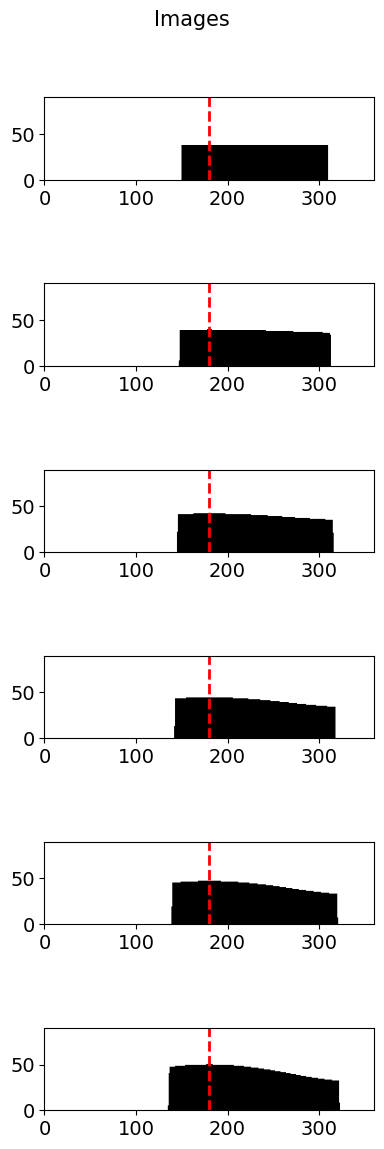

In [48]:
plot_images(train_path[::5])

In [49]:
# train all colonies on the train image
for name, colony in colony_dict.items():
    print (name)
    # transform to get down model features
    train_path_down = [overlap_downsample_transform(arr, overlap=name[1]) for arr in train_path]
    # train all models in colony
    for model in colony:
        model.LeftMB.initialize_output_weights()
        model.RightMB.initialize_output_weights()
        model.train_network(train_path_down)

('DS_q=1', 0)
('DS_q=1', 8)
('DS_q=1', 16)
('DS_q=1', 24)
('DS_q=1', 32)
('DS_q=1', 40)
('DS_q=0.9', 0)
('DS_q=0.9', 8)
('DS_q=0.9', 16)
('DS_q=0.9', 24)
('DS_q=0.9', 32)
('DS_q=0.9', 40)
('DS_q=0.8', 0)
('DS_q=0.8', 8)
('DS_q=0.8', 16)
('DS_q=0.8', 24)
('DS_q=0.8', 32)
('DS_q=0.8', 40)
('DS_q=0.7', 0)
('DS_q=0.7', 8)
('DS_q=0.7', 16)
('DS_q=0.7', 24)
('DS_q=0.7', 32)
('DS_q=0.7', 40)
('DS_q=0.6', 0)
('DS_q=0.6', 8)
('DS_q=0.6', 16)
('DS_q=0.6', 24)
('DS_q=0.6', 32)
('DS_q=0.6', 40)


# Test Training Image

In [50]:
# load test image
test_rotations = get_shifted_rotations(train_image)
test_image = test_rotations[180]
x_fpm = x_from_fpm(image=test_image, fpm=FPM)
theoretical_angle =  x_fpm - 180

<Axes: title={'center': 'Test Image'}, xlabel='X-axis', ylabel='Y-axis'>

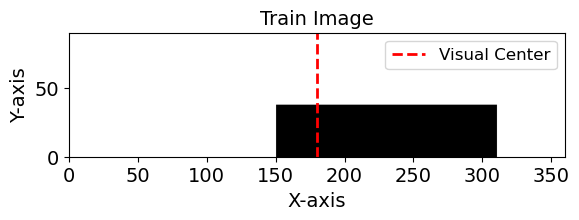

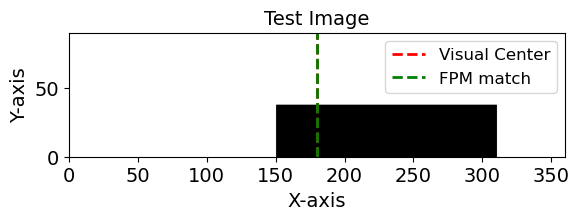

In [51]:
# Plot train and test with FPM match
plot_image(train_image, title='Train Image')
plot_image(test_image, fpm=x_fpm, title='Test Image')

In [52]:
# initialize results dictionnaries
left_dict = {}
right_dict = {}
sum_dict = {}
diff_dict = {}

In [53]:
# loop over colonies ()params
for name, colony in colony_dict.items():
    # print colony name
    print (name)

    # vectorized forward pass
    test_rotations_down = [overlap_downsample_transform(arr, overlap=name[1]) for arr in test_rotations]
    rotation_tensor = [torch.tensor(a, dtype=torch.float) for a in test_rotations_down]
    rotation_tensor = torch.stack(rotation_tensor)

    # initialise arrays
    left_arr = np.zeros((colony_size, 360))
    right_arr = np.zeros((colony_size, 360))
    sum_arr = np.zeros((colony_size, 360))
    diff_arr = np.zeros((colony_size, 360))

    # run all models and get matrices
    for i in range(colony_size):
        model = colony_dict[name][i]
        l, r, s, d = model.forward(rotation_tensor)
        left_arr[i,:] = l.detach().numpy().flatten()
        right_arr[i,:] = r.detach().numpy().flatten()
        sum_arr[i,:] = s.detach().numpy().flatten()
        diff_arr[i,:] = d.detach().numpy().flatten()

    # set the dictionnary to the appropriate matrix
    left_dict[name] = left_arr
    right_dict[name] = right_arr
    sum_dict[name] = sum_arr
    diff_dict[name] = diff_arr

('DS_q=1', 0)
('DS_q=1', 8)
('DS_q=1', 16)
('DS_q=1', 24)
('DS_q=1', 32)
('DS_q=1', 40)
('DS_q=0.9', 0)
('DS_q=0.9', 8)
('DS_q=0.9', 16)
('DS_q=0.9', 24)
('DS_q=0.9', 32)
('DS_q=0.9', 40)
('DS_q=0.8', 0)
('DS_q=0.8', 8)
('DS_q=0.8', 16)
('DS_q=0.8', 24)
('DS_q=0.8', 32)
('DS_q=0.8', 40)
('DS_q=0.7', 0)
('DS_q=0.7', 8)
('DS_q=0.7', 16)
('DS_q=0.7', 24)
('DS_q=0.7', 32)
('DS_q=0.7', 40)
('DS_q=0.6', 0)
('DS_q=0.6', 8)
('DS_q=0.6', 16)
('DS_q=0.6', 24)
('DS_q=0.6', 32)
('DS_q=0.6', 40)


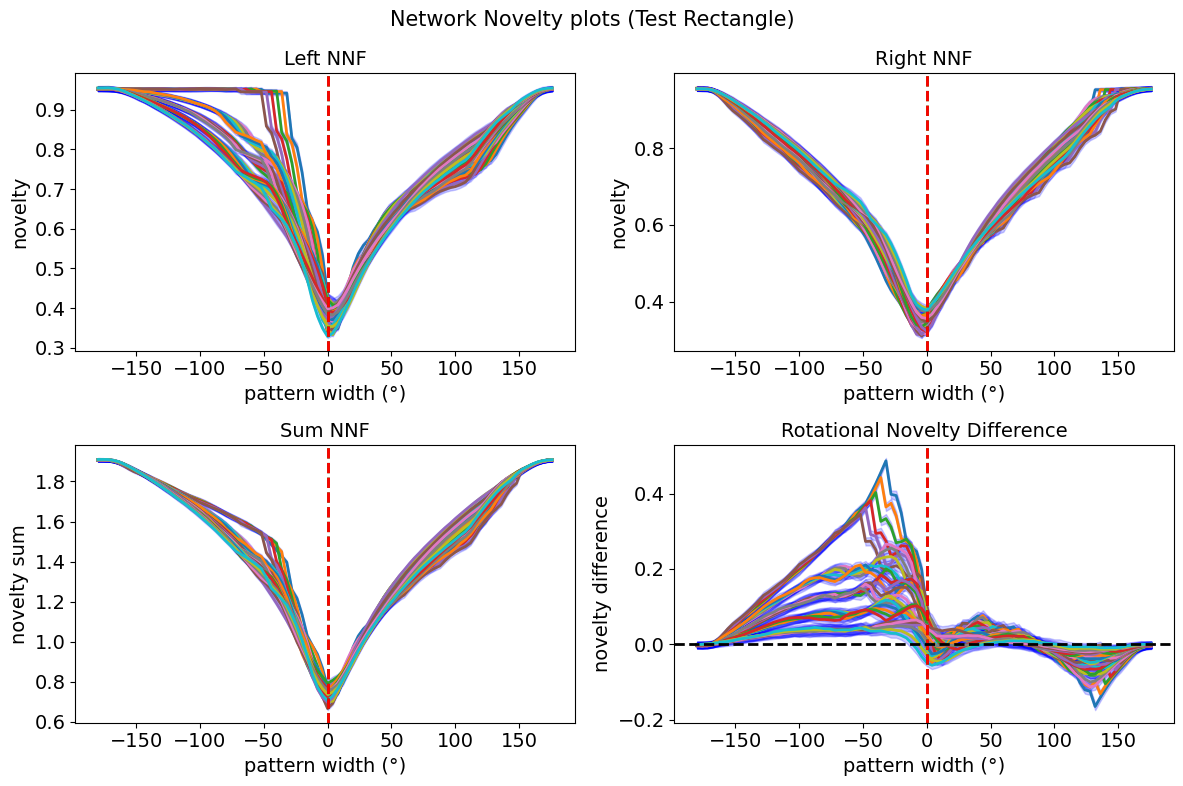

In [54]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Title
plt.suptitle('Network Novelty plots (Test Rectangle)')

# Plot on each subplot
for i, ax in enumerate(axs.flat):
    # angles
    angles = range(-180, 180, 1)

    # Plot the mean curves
    for name in colony_dict:
        mean_curve = np.mean(signals[i][name], axis=0)
        std_curve = np.std(signals[i][name], axis=0)
        # Plot the mean curve
        ax.plot(angles[::4], (mean_curve)[::4], label=name)
        # Plot the standard deviation as a shaded region
        ax.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
    # labelling
    ax.set_ylabel(ylabels[i])
    ax.set_xlabel('pattern width (°)')
    ax.set_title(titles[i])
    ax.axvline(x=theoretical_angle, color='green', linestyle='--', label='FPM match')
    ax.axvline(x=0, color='red', linestyle='--', label='Visual Center')
    if i == 3:
        ax.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
        ## no legend

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

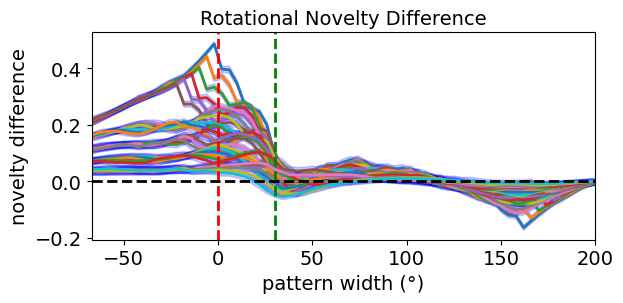

In [55]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig= plt.figure(figsize=(6.4, 6.4/2))

# Roll value
ROLL = 30
i = 3

# angles
angles = np.array(range(-180, 180, 1))+ROLL

# Plot the mean curves
for name in colony_dict:
    mean_curve = np.mean(signals[i][name], axis=0)
    std_curve = np.std(signals[i][name], axis=0)
    # Plot the mean curve
    plt.plot(angles[::4], (mean_curve)[::4], label=name)
    # Plot the standard deviation as a shaded region
    plt.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
# Labelling
plt.ylabel(ylabels[i])
plt.xlabel('pattern width (°)')
plt.title(titles[i])
plt.axvline(x=theoretical_angle+ROLL, color='green', linestyle='--', label='FPM match')
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.xlim(-67, 200)  # Restrict x-axis to -90 to 90
plt.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
# # plt.legend(loc='upper right')  # Add legend to each subplot
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [56]:
# initialize pooling
roll = ROLL
n_saccades = 100
TEST_NUM = 0
TEST_NAME = "MODE_1A"

for it in range(n_iter):
    dist_pooled = []
    # parameters
    for name in colony_dict:
        print (name) # loop over colony
        dist_name = []
        for i in range(colony_size):
            # parameters
            novelty_diff = diff_dict[name][i]
            novelty_sum = sum_dict[name][i]
            
            # get weighed distribution
            dist_sum = get_weighed_distribution(novelty_diff, novelty_sum, n_saccades, roll)
            dist_name += list(dist_sum)
            dist_pooled += list(dist_sum)

        # performance
        predicted_modes = kde_predictions(dist_name)
        true_mode = mode_location_dict[TEST_NAME]
        perf = get_performance(predicted_modes, true_mode)
        performance_tensor[it, TEST_NUM, crossover_index[name[0]], overlap_index[name[1]]] = perf
        print (perf)

    # pool performance
    predicted_modes = kde_predictions(dist_pooled)
    true_mode = mode_location_dict[TEST_NAME]
    perf = get_performance(predicted_modes, true_mode)
    performance_vector[it, TEST_NUM] = perf
    print (perf)

('DS_q=1', 0)
3.299999999999997
('DS_q=1', 8)
1.2999999999999972
('DS_q=1', 16)
0.7000000000000028
('DS_q=1', 24)
2.299999999999997
('DS_q=1', 32)
4.299999999999997
('DS_q=1', 40)
5.299999999999997
('DS_q=0.9', 0)
3.299999999999997
('DS_q=0.9', 8)
8.299999999999997
('DS_q=0.9', 16)
7.299999999999997
('DS_q=0.9', 24)
5.299999999999997
('DS_q=0.9', 32)
1.2999999999999972
('DS_q=0.9', 40)
5.299999999999997
('DS_q=0.8', 0)
4.299999999999997
('DS_q=0.8', 8)
1.2999999999999972
('DS_q=0.8', 16)
0.29999999999999716
('DS_q=0.8', 24)
0.29999999999999716
('DS_q=0.8', 32)
1.2999999999999972
('DS_q=0.8', 40)
2.299999999999997
('DS_q=0.7', 0)
2.700000000000003
('DS_q=0.7', 8)
7.700000000000003
('DS_q=0.7', 16)
4.700000000000003
('DS_q=0.7', 24)
3.299999999999997
('DS_q=0.7', 32)
8.299999999999997
('DS_q=0.7', 40)
9.299999999999997
('DS_q=0.6', 0)
10.299999999999997
('DS_q=0.6', 8)
5.299999999999997
('DS_q=0.6', 16)
7.299999999999997
('DS_q=0.6', 24)
2.299999999999997
('DS_q=0.6', 32)
10.700000000000

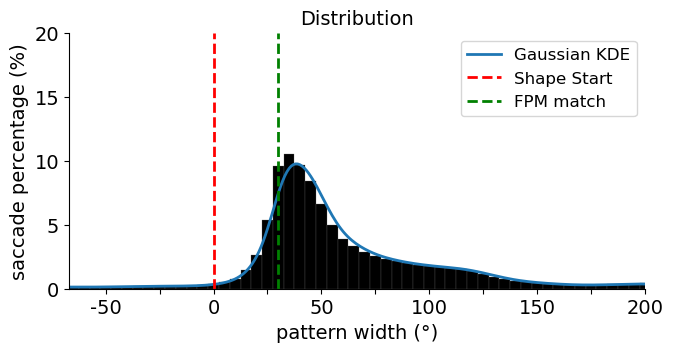

In [57]:
# Plotting
plot_distribution_image(dist_pooled, y_lim=0.2)
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.axvline(x=theoretical_angle+ROLL, color='green', linestyle='--', label='FPM match')
plt.legend()

# Save the plot as an SVG file
#plt.savefig("../writeup_exports/pool/pool_1A.svg", format="svg", bbox_inches='tight')

# show
plt.show()

# Test Image 1B

In [58]:
# load test image
test_rotations = np.load('../paths/test/image_1b_rotations.npy')
test_image = test_rotations[180]
x_fpm = x_from_fpm(image=test_image, fpm=FPM)
theoretical_angle =  x_fpm - 180

<Axes: title={'center': 'Test Image'}, xlabel='X-axis', ylabel='Y-axis'>

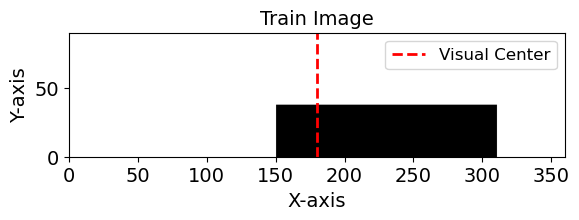

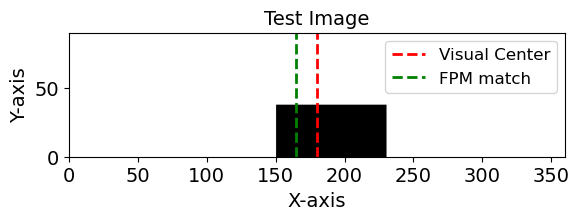

In [59]:
# Plot train and test with FPM match
plot_image(train_image, title='Train Image')
plot_image(test_image, fpm=x_fpm, title='Test Image')

In [60]:
# initialize results dictionnaries
left_dict = {}
right_dict = {}
sum_dict = {}
diff_dict = {}

In [61]:
# loop over colonies ()params
for name, colony in colony_dict.items():
    # print colony name
    print (name)

    # vectorized forward pass
    test_rotations_down = [overlap_downsample_transform(arr, overlap=name[1]) for arr in test_rotations]
    rotation_tensor = [torch.tensor(a, dtype=torch.float) for a in test_rotations_down]
    rotation_tensor = torch.stack(rotation_tensor)

    # initialise arrays
    left_arr = np.zeros((colony_size, 360))
    right_arr = np.zeros((colony_size, 360))
    sum_arr = np.zeros((colony_size, 360))
    diff_arr = np.zeros((colony_size, 360))

    # run all models and get matrices
    for i in range(colony_size):
        model = colony_dict[name][i]
        l, r, s, d = model.forward(rotation_tensor)
        left_arr[i,:] = l.detach().numpy().flatten()
        right_arr[i,:] = r.detach().numpy().flatten()
        sum_arr[i,:] = s.detach().numpy().flatten()
        diff_arr[i,:] = d.detach().numpy().flatten()

    # set the dictionnary to the appropriate matrix
    left_dict[name] = left_arr
    right_dict[name] = right_arr
    sum_dict[name] = sum_arr
    diff_dict[name] = diff_arr

('DS_q=1', 0)
('DS_q=1', 8)
('DS_q=1', 16)
('DS_q=1', 24)
('DS_q=1', 32)
('DS_q=1', 40)
('DS_q=0.9', 0)
('DS_q=0.9', 8)
('DS_q=0.9', 16)
('DS_q=0.9', 24)
('DS_q=0.9', 32)
('DS_q=0.9', 40)
('DS_q=0.8', 0)
('DS_q=0.8', 8)
('DS_q=0.8', 16)
('DS_q=0.8', 24)
('DS_q=0.8', 32)
('DS_q=0.8', 40)
('DS_q=0.7', 0)
('DS_q=0.7', 8)
('DS_q=0.7', 16)
('DS_q=0.7', 24)
('DS_q=0.7', 32)
('DS_q=0.7', 40)
('DS_q=0.6', 0)
('DS_q=0.6', 8)
('DS_q=0.6', 16)
('DS_q=0.6', 24)
('DS_q=0.6', 32)
('DS_q=0.6', 40)


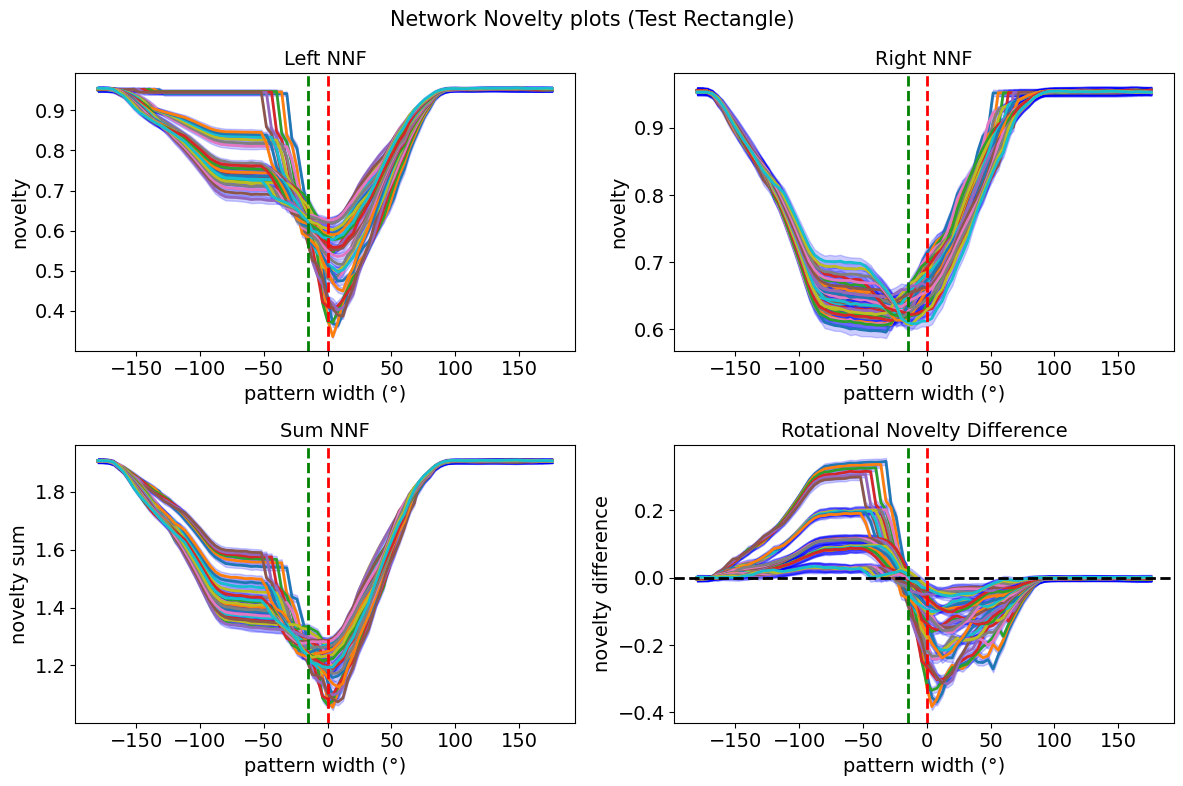

In [62]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Title
plt.suptitle('Network Novelty plots (Test Rectangle)')

# Plot on each subplot
for i, ax in enumerate(axs.flat):
    # angles
    angles = range(-180, 180, 1)

    # Plot the mean curves
    for name in colony_dict:
        mean_curve = np.mean(signals[i][name], axis=0)
        std_curve = np.std(signals[i][name], axis=0)
        # Plot the mean curve
        ax.plot(angles[::4], (mean_curve)[::4], label=name)
        # Plot the standard deviation as a shaded region
        ax.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
    # labelling
    ax.set_ylabel(ylabels[i])
    ax.set_xlabel('pattern width (°)')
    ax.set_title(titles[i])
    ax.axvline(x=theoretical_angle, color='green', linestyle='--', label='FPM match')
    ax.axvline(x=0, color='red', linestyle='--', label='Visual Center')
    if i == 3:
        ax.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
        # no legend

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

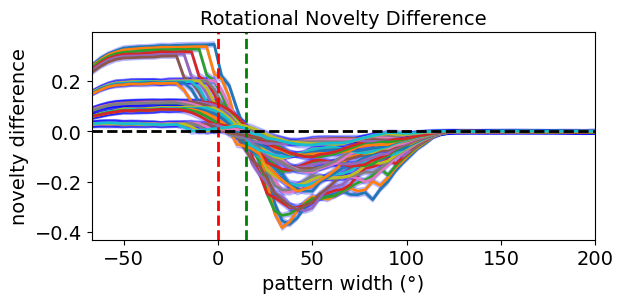

In [63]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig= plt.figure(figsize=(6.4, 6.4/2))

# Roll value
ROLL = 30
i = 3

# angles
angles = np.array(range(-180, 180, 1))+ROLL

# Plot the mean curves
for name in colony_dict:
    mean_curve = np.mean(signals[i][name], axis=0)
    std_curve = np.std(signals[i][name], axis=0)
    # Plot the mean curve
    plt.plot(angles[::4], (mean_curve)[::4], label=name)
    # Plot the standard deviation as a shaded region
    plt.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
# Labelling
plt.ylabel(ylabels[i])
plt.xlabel('pattern width (°)')
plt.title(titles[i])
plt.axvline(x=theoretical_angle+ROLL, color='green', linestyle='--', label='FPM match')
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.xlim(-67, 200)  # Restrict x-axis to -90 to 90
plt.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
# # plt.legend(loc='upper right')  # Add legend to each subplot
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [64]:
# initialize pooling
roll = ROLL
n_saccades = 100
TEST_NUM = 1
TEST_NAME = "MODE_1B"

for it in range(n_iter):
    dist_pooled = []
    # parameters
    for name in colony_dict:
        print (name) # loop over colony
        dist_name = []
        for i in range(colony_size):
            # parameters
            novelty_diff = diff_dict[name][i]
            novelty_sum = sum_dict[name][i]
            
            # get weighed distribution
            dist_sum = get_weighed_distribution(novelty_diff, novelty_sum, n_saccades, roll)
            dist_name += list(dist_sum)
            dist_pooled += list(dist_sum)

        # performance
        predicted_modes = kde_predictions(dist_name)
        true_mode = mode_location_dict[TEST_NAME]
        perf = get_performance(predicted_modes, true_mode)
        performance_tensor[it, TEST_NUM, crossover_index[name[0]], overlap_index[name[1]]] = perf
        print (perf)

    # pool performance
    predicted_modes = kde_predictions(dist_pooled)
    true_mode = mode_location_dict[TEST_NAME]
    perf = get_performance(predicted_modes, true_mode)
    performance_vector[it, TEST_NUM] = perf
    print (perf)

('DS_q=1', 0)
0.3000000000000007
('DS_q=1', 8)
1.3000000000000007
('DS_q=1', 16)
3.3000000000000007
('DS_q=1', 24)
3.3000000000000007
('DS_q=1', 32)
4.300000000000001
('DS_q=1', 40)
6.300000000000001
('DS_q=0.9', 0)
1.3000000000000007
('DS_q=0.9', 8)
0.3000000000000007
('DS_q=0.9', 16)
1.3000000000000007
('DS_q=0.9', 24)
3.3000000000000007
('DS_q=0.9', 32)
5.300000000000001
('DS_q=0.9', 40)
7.300000000000001
('DS_q=0.8', 0)
0.3000000000000007
('DS_q=0.8', 8)
0.3000000000000007
('DS_q=0.8', 16)
2.3000000000000007
('DS_q=0.8', 24)
4.300000000000001
('DS_q=0.8', 32)
5.300000000000001
('DS_q=0.8', 40)
8.3
('DS_q=0.7', 0)
2.3000000000000007
('DS_q=0.7', 8)
5.300000000000001
('DS_q=0.7', 16)
5.300000000000001
('DS_q=0.7', 24)
3.3000000000000007
('DS_q=0.7', 32)
1.3000000000000007
('DS_q=0.7', 40)
2.3000000000000007
('DS_q=0.6', 0)
8.3
('DS_q=0.6', 8)
10.3
('DS_q=0.6', 16)
3.3000000000000007
('DS_q=0.6', 24)
3.6999999999999993
('DS_q=0.6', 32)
5.699999999999999
('DS_q=0.6', 40)
1.699999999999

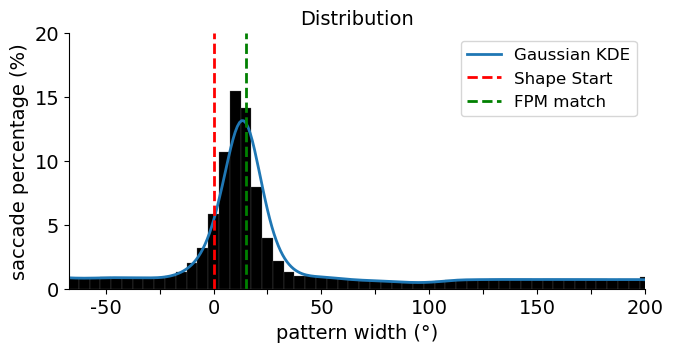

In [65]:
# Plotting
plot_distribution_image(dist_pooled, y_lim=0.2)
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.axvline(x=theoretical_angle+roll, color='green', linestyle='--', label='FPM match')
plt.legend()

# Save the plot as an SVG file
#plt.savefig("../writeup_exports/pool/pool_1B.svg", format="svg", bbox_inches='tight')

# show
plt.show()

# Test Image 1C

In [66]:
# load test image
test_rotations = np.load('../paths/test/image_1c_rotations.npy')
test_image = test_rotations[180]
x_fpm = x_from_fpm(image=test_image, fpm=FPM)
theoretical_angle =  x_fpm - 180

<Axes: title={'center': 'Test Image'}, xlabel='X-axis', ylabel='Y-axis'>

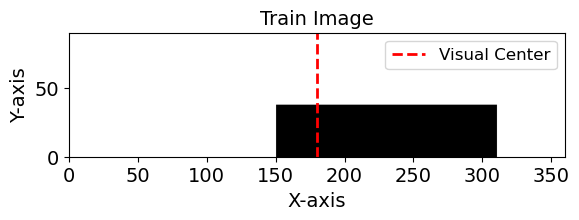

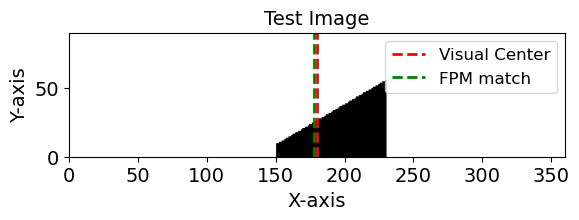

In [67]:
# Plot train and test with FPM match
plot_image(train_image, title='Train Image')
plot_image(test_image, fpm=x_fpm, title='Test Image')

In [68]:
# initialize results dictionnaries
left_dict = {}
right_dict = {}
sum_dict = {}
diff_dict = {}

In [69]:
# loop over colonies ()params
for name, colony in colony_dict.items():
    # print colony name
    print (name)

    # get test rotations
    test_rotations_transformed = [overlap_downsample_transform(arr, overlap=name[1]) for arr in test_rotations]
    rotation_tensor = [torch.tensor(a, dtype=torch.float) for a in test_rotations_transformed]
    rotation_tensor = torch.stack(rotation_tensor)

    # initialise arrays
    left_arr = np.zeros((colony_size, 360))
    right_arr = np.zeros((colony_size, 360))
    sum_arr = np.zeros((colony_size, 360))
    diff_arr = np.zeros((colony_size, 360))

    # run all models and get matrices
    for i in range(colony_size):
        model = colony_dict[name][i]
        l, r, s, d = model.forward(rotation_tensor)
        left_arr[i,:] = l.detach().numpy().flatten()
        right_arr[i,:] = r.detach().numpy().flatten()
        sum_arr[i,:] = s.detach().numpy().flatten()
        diff_arr[i,:] = d.detach().numpy().flatten()

    # set the dictionnary to the appropriate matrix
    left_dict[name] = left_arr
    right_dict[name] = right_arr
    sum_dict[name] = sum_arr
    diff_dict[name] = diff_arr

('DS_q=1', 0)
('DS_q=1', 8)
('DS_q=1', 16)
('DS_q=1', 24)
('DS_q=1', 32)
('DS_q=1', 40)
('DS_q=0.9', 0)
('DS_q=0.9', 8)
('DS_q=0.9', 16)
('DS_q=0.9', 24)
('DS_q=0.9', 32)
('DS_q=0.9', 40)
('DS_q=0.8', 0)
('DS_q=0.8', 8)
('DS_q=0.8', 16)
('DS_q=0.8', 24)
('DS_q=0.8', 32)
('DS_q=0.8', 40)
('DS_q=0.7', 0)
('DS_q=0.7', 8)
('DS_q=0.7', 16)
('DS_q=0.7', 24)
('DS_q=0.7', 32)
('DS_q=0.7', 40)
('DS_q=0.6', 0)
('DS_q=0.6', 8)
('DS_q=0.6', 16)
('DS_q=0.6', 24)
('DS_q=0.6', 32)
('DS_q=0.6', 40)


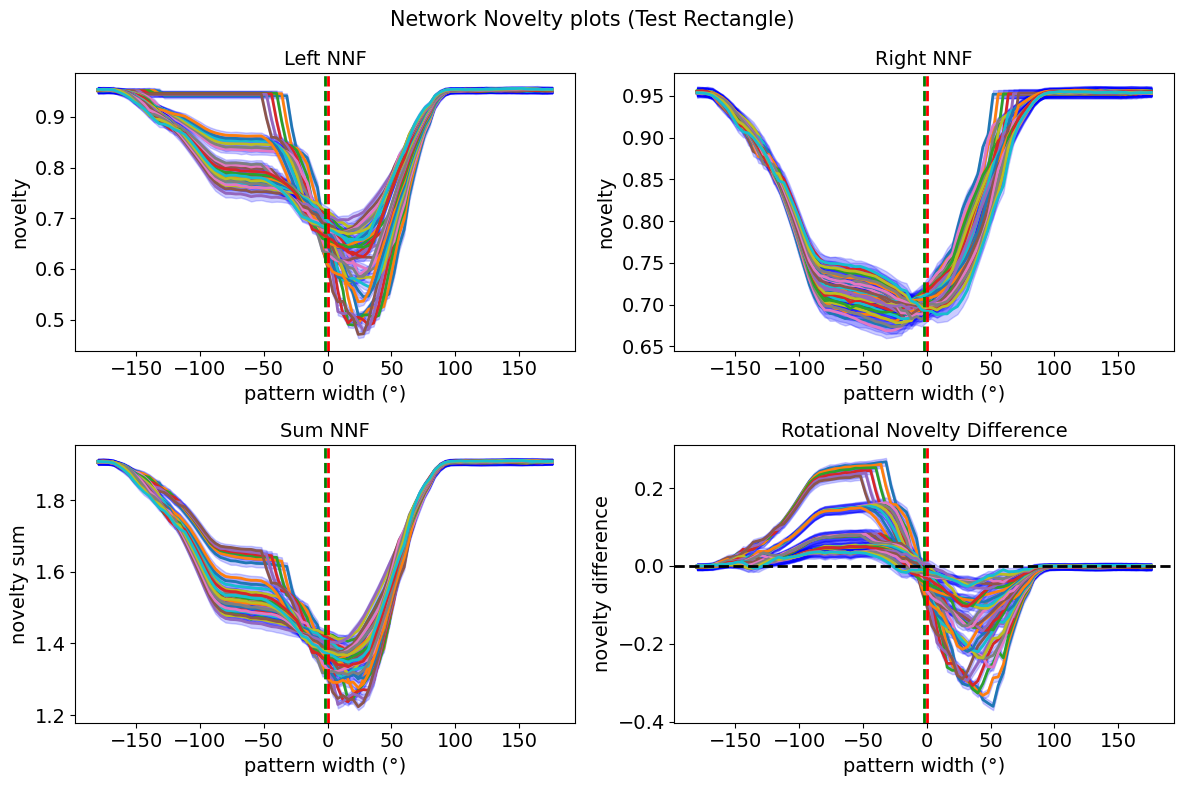

In [70]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Title
plt.suptitle('Network Novelty plots (Test Rectangle)')

# Plot on each subplot
for i, ax in enumerate(axs.flat):
    # angles
    angles = range(-180, 180, 1)

    # Plot the mean curves
    for name in colony_dict:
        mean_curve = np.mean(signals[i][name], axis=0)
        std_curve = np.std(signals[i][name], axis=0)
        # Plot the mean curve
        ax.plot(angles[::4], (mean_curve)[::4], label=name)
        # Plot the standard deviation as a shaded region
        ax.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
    # labelling
    ax.set_ylabel(ylabels[i])
    ax.set_xlabel('pattern width (°)')
    ax.set_title(titles[i])
    ax.axvline(x=theoretical_angle, color='green', linestyle='--', label='FPM match')
    ax.axvline(x=0, color='red', linestyle='--', label='Visual Center')
    if i == 3:
        ax.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
        # no legend

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

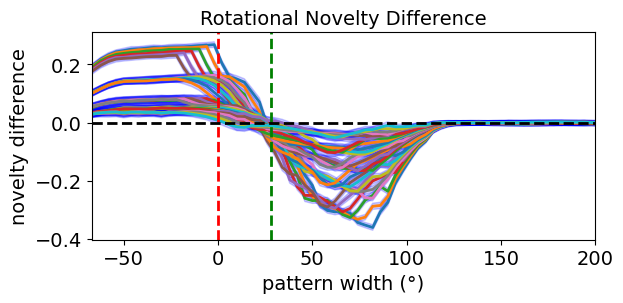

In [71]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig= plt.figure(figsize=(6.4, 6.4/2))

# Roll value
ROLL = 30
i = 3

# angles
angles = np.array(range(-180, 180, 1))+ROLL

# Plot the mean curves
for name in colony_dict:
    mean_curve = np.mean(signals[i][name], axis=0)
    std_curve = np.std(signals[i][name], axis=0)
    # Plot the mean curve
    plt.plot(angles[::4], (mean_curve)[::4], label=name)
    # Plot the standard deviation as a shaded region
    plt.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
# Labelling
plt.ylabel(ylabels[i])
plt.xlabel('pattern width (°)')
plt.title(titles[i])
plt.axvline(x=theoretical_angle+ROLL, color='green', linestyle='--', label='FPM match')
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.xlim(-67, 200)  # Restrict x-axis to -90 to 90
plt.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
# plt.legend(loc='upper right')  # Add legend to each subplot
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [72]:
# initialize pooling
roll = ROLL
n_saccades = 100
TEST_NUM = 2
TEST_NAME = "MODE_1C"

for it in range(n_iter):
    dist_pooled = []
    # parameters
    for name in colony_dict:
        print (name) # loop over colony
        dist_name = []
        for i in range(colony_size):
            # parameters
            novelty_diff = diff_dict[name][i]
            novelty_sum = sum_dict[name][i]
            
            # get weighed distribution
            dist_sum = get_weighed_distribution(novelty_diff, novelty_sum, n_saccades, roll)
            dist_name += list(dist_sum)
            dist_pooled += list(dist_sum)

        # performance
        predicted_modes = kde_predictions(dist_name)
        true_mode = mode_location_dict[TEST_NAME]
        perf = get_performance(predicted_modes, true_mode)
        performance_tensor[it, TEST_NUM, crossover_index[name[0]], overlap_index[name[1]]] = perf
        print (perf)

    # pool performance
    predicted_modes = kde_predictions(dist_pooled)
    true_mode = mode_location_dict[TEST_NAME]
    perf = get_performance(predicted_modes, true_mode)
    performance_vector[it, TEST_NUM] = perf
    print (perf)

('DS_q=1', 0)
2.1000000000000014
('DS_q=1', 8)
3.1000000000000014
('DS_q=1', 16)
5.100000000000001
('DS_q=1', 24)
8.100000000000001
('DS_q=1', 32)
10.100000000000001
('DS_q=1', 40)
12.100000000000001
('DS_q=0.9', 0)
6.100000000000001
('DS_q=0.9', 8)
6.100000000000001
('DS_q=0.9', 16)
5.100000000000001
('DS_q=0.9', 24)
4.100000000000001
('DS_q=0.9', 32)
6.100000000000001
('DS_q=0.9', 40)
9.100000000000001
('DS_q=0.8', 0)
4.100000000000001
('DS_q=0.8', 8)
3.1000000000000014
('DS_q=0.8', 16)
5.100000000000001
('DS_q=0.8', 24)
6.100000000000001
('DS_q=0.8', 32)
7.100000000000001
('DS_q=0.8', 40)
9.100000000000001
('DS_q=0.7', 0)
0.8999999999999986
('DS_q=0.7', 8)
4.100000000000001
('DS_q=0.7', 16)
8.100000000000001
('DS_q=0.7', 24)
11.100000000000001
('DS_q=0.7', 32)
13.100000000000001
('DS_q=0.7', 40)
14.100000000000001
('DS_q=0.6', 0)
2.8999999999999986
('DS_q=0.6', 8)
4.100000000000001
('DS_q=0.6', 16)
11.100000000000001
('DS_q=0.6', 24)
15.100000000000001
('DS_q=0.6', 32)
1.10000000000

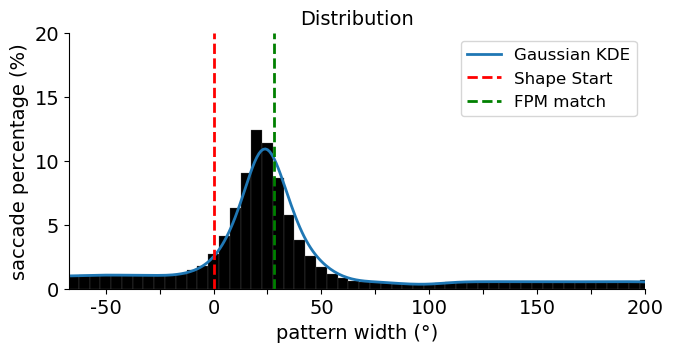

In [73]:
# Plotting
plot_distribution_image(dist_pooled, y_lim=0.2)
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.axvline(x=theoretical_angle+roll, color='green', linestyle='--', label='FPM match')
plt.legend()

# Save the plot as an SVG file
#plt.savefig("../writeup_exports/pool/pool_1C.svg", format="svg", bbox_inches='tight')

# show
plt.show()

# Train Path 2A

In [74]:
train_path = np.load('../paths/train/path_2a.npy')
train_image = train_path[0]
FPM = compute_fpm(train_image)
FPM

0.30619019722710406

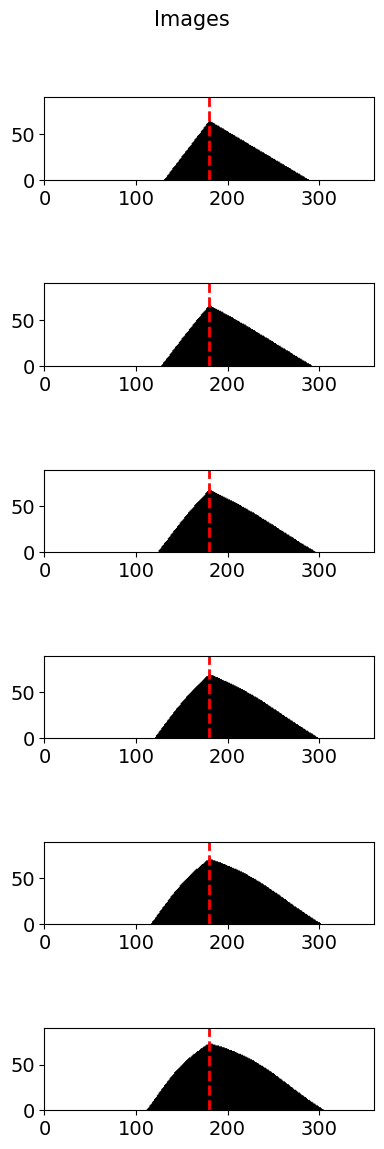

In [75]:
plot_images(train_path[::5])

In [76]:
# train all colonies on the train image
for name, colony in colony_dict.items():
    print (name)
    # transform to get down model features
    train_path_down = [overlap_downsample_transform(arr, overlap=name[1]) for arr in train_path]
    # train
    for model in colony:
        model.LeftMB.initialize_output_weights()
        model.RightMB.initialize_output_weights()
        model.train_network(train_path_down)

('DS_q=1', 0)
('DS_q=1', 8)
('DS_q=1', 16)
('DS_q=1', 24)
('DS_q=1', 32)
('DS_q=1', 40)
('DS_q=0.9', 0)
('DS_q=0.9', 8)
('DS_q=0.9', 16)
('DS_q=0.9', 24)
('DS_q=0.9', 32)
('DS_q=0.9', 40)
('DS_q=0.8', 0)
('DS_q=0.8', 8)
('DS_q=0.8', 16)
('DS_q=0.8', 24)
('DS_q=0.8', 32)
('DS_q=0.8', 40)
('DS_q=0.7', 0)
('DS_q=0.7', 8)
('DS_q=0.7', 16)
('DS_q=0.7', 24)
('DS_q=0.7', 32)
('DS_q=0.7', 40)
('DS_q=0.6', 0)
('DS_q=0.6', 8)
('DS_q=0.6', 16)
('DS_q=0.6', 24)
('DS_q=0.6', 32)
('DS_q=0.6', 40)


# Test Training Image

In [77]:
# load test image
test_rotations = get_shifted_rotations(train_image)
test_image = test_rotations[180]
x_fpm = x_from_fpm(image=test_image, fpm=FPM)
theoretical_angle =  x_fpm - 180

<Axes: title={'center': 'Test Image'}, xlabel='X-axis', ylabel='Y-axis'>

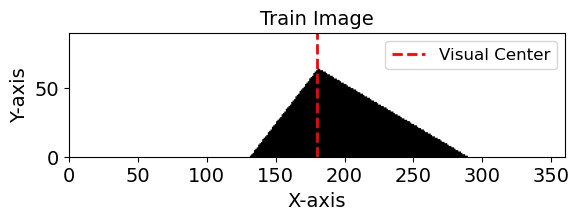

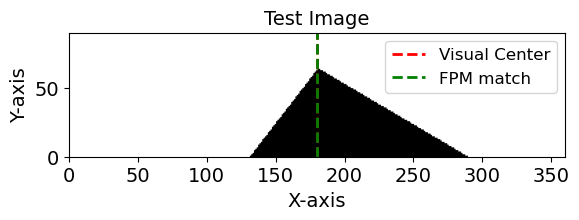

In [78]:
# Plot train and test with FPM match
plot_image(train_image, title='Train Image')
plot_image(test_image, fpm=x_fpm, title='Test Image')

In [79]:
# initialize results dictionnaries
left_dict = {}
right_dict = {}
sum_dict = {}
diff_dict = {}

In [80]:
# loop over colonies ()params
for name, colony in colony_dict.items():
    # print colony name
    print (name)

    # get test rotations
    test_rotations_transformed = [overlap_downsample_transform(arr, overlap=name[1]) for arr in test_rotations]
    rotation_tensor = [torch.tensor(a, dtype=torch.float) for a in test_rotations_transformed]
    rotation_tensor = torch.stack(rotation_tensor)

    # initialise arrays
    left_arr = np.zeros((colony_size, 360))
    right_arr = np.zeros((colony_size, 360))
    sum_arr = np.zeros((colony_size, 360))
    diff_arr = np.zeros((colony_size, 360))

    # run all models and get matrices
    for i in range(colony_size):
        model = colony_dict[name][i]
        l, r, s, d = model.forward(rotation_tensor)
        left_arr[i,:] = l.detach().numpy().flatten()
        right_arr[i,:] = r.detach().numpy().flatten()
        sum_arr[i,:] = s.detach().numpy().flatten()
        diff_arr[i,:] = d.detach().numpy().flatten()

    # set the dictionnary to the appropriate matrix
    left_dict[name] = left_arr
    right_dict[name] = right_arr
    sum_dict[name] = sum_arr
    diff_dict[name] = diff_arr

('DS_q=1', 0)
('DS_q=1', 8)
('DS_q=1', 16)
('DS_q=1', 24)
('DS_q=1', 32)
('DS_q=1', 40)
('DS_q=0.9', 0)
('DS_q=0.9', 8)
('DS_q=0.9', 16)
('DS_q=0.9', 24)
('DS_q=0.9', 32)
('DS_q=0.9', 40)
('DS_q=0.8', 0)
('DS_q=0.8', 8)
('DS_q=0.8', 16)
('DS_q=0.8', 24)
('DS_q=0.8', 32)
('DS_q=0.8', 40)
('DS_q=0.7', 0)
('DS_q=0.7', 8)
('DS_q=0.7', 16)
('DS_q=0.7', 24)
('DS_q=0.7', 32)
('DS_q=0.7', 40)
('DS_q=0.6', 0)
('DS_q=0.6', 8)
('DS_q=0.6', 16)
('DS_q=0.6', 24)
('DS_q=0.6', 32)
('DS_q=0.6', 40)


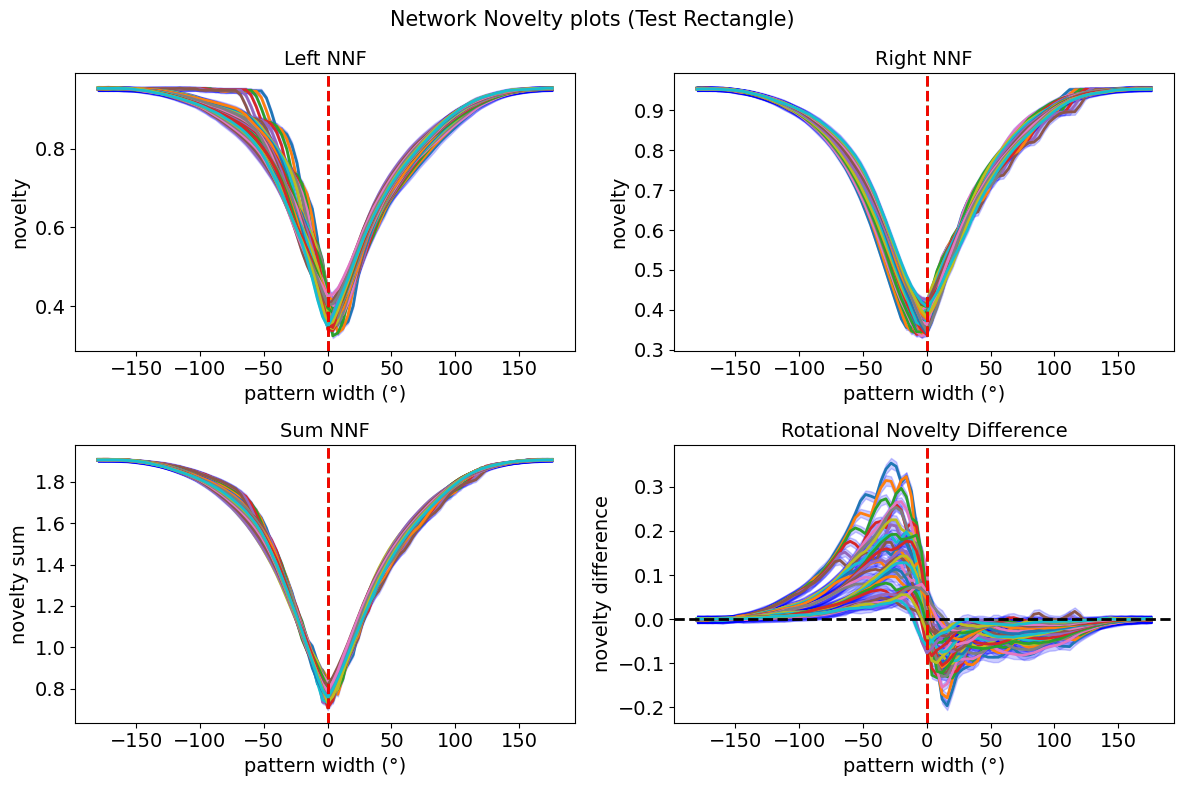

In [81]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Title
plt.suptitle('Network Novelty plots (Test Rectangle)')

# Plot on each subplot
for i, ax in enumerate(axs.flat):
    # angles
    angles = range(-180, 180, 1)

    # Plot the mean curves
    for name in colony_dict:
        mean_curve = np.mean(signals[i][name], axis=0)
        std_curve = np.std(signals[i][name], axis=0)
        # Plot the mean curve
        ax.plot(angles[::4], (mean_curve)[::4], label=name)
        # Plot the standard deviation as a shaded region
        ax.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
    # labelling
    ax.set_ylabel(ylabels[i])
    ax.set_xlabel('pattern width (°)')
    ax.set_title(titles[i])
    ax.axvline(x=theoretical_angle, color='green', linestyle='--', label='FPM match')
    ax.axvline(x=0, color='red', linestyle='--', label='Visual Center')
    if i == 3:
        ax.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
        # no legend

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

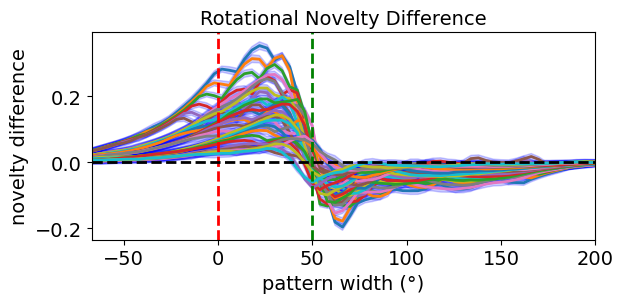

In [82]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig= plt.figure(figsize=(6.4, 6.4/2))

# Roll value
ROLL = 50
i = 3

# angles
angles = np.array(range(-180, 180, 1))+ROLL

# Plot the mean curves
for name in colony_dict:
    mean_curve = np.mean(signals[i][name], axis=0)
    std_curve = np.std(signals[i][name], axis=0)
    # Plot the mean curve
    plt.plot(angles[::4], (mean_curve)[::4], label=name)
    # Plot the standard deviation as a shaded region
    plt.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
# Labelling
plt.ylabel(ylabels[i])
plt.xlabel('pattern width (°)')
plt.title(titles[i])
plt.axvline(x=theoretical_angle+ROLL, color='green', linestyle='--', label='FPM match')
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.xlim(-67, 200)  # Restrict x-axis to -90 to 90
plt.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
# plt.legend(loc='upper right')  # Add legend to each subplot
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [83]:
# initialize pooling
roll = ROLL
n_saccades = 100
TEST_NUM = 3
TEST_NAME = "MODE_2A"

for it in range(n_iter):
    dist_pooled = []
    # parameters
    for name in colony_dict:
        print (name) # loop over colony
        dist_name = []
        for i in range(colony_size):
            # parameters
            novelty_diff = diff_dict[name][i]
            novelty_sum = sum_dict[name][i]
            
            # get weighed distribution
            dist_sum = get_weighed_distribution(novelty_diff, novelty_sum, n_saccades, roll)
            dist_name += list(dist_sum)
            dist_pooled += list(dist_sum)

        # performance
        predicted_modes = kde_predictions(dist_name)
        true_mode = mode_location_dict[TEST_NAME]
        perf = get_performance(predicted_modes, true_mode)
        performance_tensor[it, TEST_NUM, crossover_index[name[0]], overlap_index[name[1]]] = perf
        print (perf)

    # pool performance
    predicted_modes = kde_predictions(dist_pooled)
    true_mode = mode_location_dict[TEST_NAME]
    perf = get_performance(predicted_modes, true_mode)
    performance_vector[it, TEST_NUM] = perf
    print (perf)

('DS_q=1', 0)
1.5
('DS_q=1', 8)
2.5
('DS_q=1', 16)
1.5
('DS_q=1', 24)
0.5
('DS_q=1', 32)
0.5
('DS_q=1', 40)
3.5
('DS_q=0.9', 0)
2.5
('DS_q=0.9', 8)
2.5
('DS_q=0.9', 16)
0.5
('DS_q=0.9', 24)
1.5
('DS_q=0.9', 32)
0.5
('DS_q=0.9', 40)
2.5
('DS_q=0.8', 0)
1.5
('DS_q=0.8', 8)
1.5
('DS_q=0.8', 16)
1.5
('DS_q=0.8', 24)
1.5
('DS_q=0.8', 32)
1.5
('DS_q=0.8', 40)
0.5
('DS_q=0.7', 0)
2.5
('DS_q=0.7', 8)
1.5
('DS_q=0.7', 16)
6.5
('DS_q=0.7', 24)
7.5
('DS_q=0.7', 32)
0.5
('DS_q=0.7', 40)
5.5
('DS_q=0.6', 0)
9.5
('DS_q=0.6', 8)
3.5
('DS_q=0.6', 16)
8.5
('DS_q=0.6', 24)
10.5
('DS_q=0.6', 32)
3.5
('DS_q=0.6', 40)
10.5
1.5
('DS_q=1', 0)
1.5
('DS_q=1', 8)
2.5
('DS_q=1', 16)
0.5
('DS_q=1', 24)
0.5
('DS_q=1', 32)
0.5
('DS_q=1', 40)
3.5
('DS_q=0.9', 0)
2.5
('DS_q=0.9', 8)
2.5
('DS_q=0.9', 16)
0.5
('DS_q=0.9', 24)
2.5
('DS_q=0.9', 32)
0.5
('DS_q=0.9', 40)
2.5
('DS_q=0.8', 0)
1.5
('DS_q=0.8', 8)
1.5
('DS_q=0.8', 16)
1.5
('DS_q=0.8', 24)
1.5
('DS_q=0.8', 32)
0.5
('DS_q=0.8', 40)
0.5
('DS_q=0.7', 0)
1.5
('DS_q

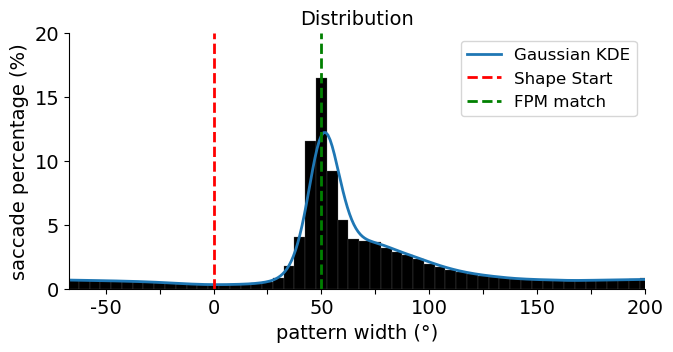

In [84]:
# Plotting
plot_distribution_image(dist_pooled, y_lim=0.2)
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.axvline(x=theoretical_angle+roll, color='green', linestyle='--', label='FPM match')
plt.legend()

# Save the plot as an SVG file
#plt.savefig("../writeup_exports/pool/pool_2A.svg", format="svg", bbox_inches='tight')

# show
plt.show()

# Test Image 2B

In [85]:
# load test image
test_rotations = np.load('../paths/test/image_2b_rotations.npy')
test_image = test_rotations[180]
x_fpm = x_from_fpm(image=test_image, fpm=FPM)
theoretical_angle =  x_fpm - 180
theoretical_angle

24

In [86]:
x_plf = np.argmax(np.sum(test_image,axis=0))
x_plf
plf_angle = x_plf - 180

<Axes: title={'center': 'Test Image'}, xlabel='X-axis', ylabel='Y-axis'>

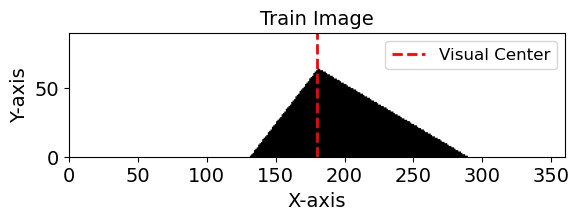

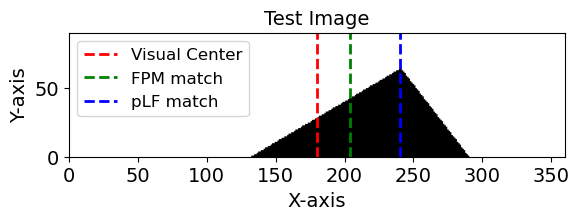

In [87]:
# Plot train and test with FPM match
plot_image(train_image, title='Train Image')
plot_image(test_image, fpm=x_fpm, plf=x_plf, title='Test Image')

In [88]:
# initialize results dictionnaries
left_dict = {}
right_dict = {}
sum_dict = {}
diff_dict = {}

In [89]:
# loop over colonies ()params
for name, colony in colony_dict.items():
    # print colony name
    print (name)

    # get test rotations
    test_rotations_transformed = [overlap_downsample_transform(arr, overlap=name[1]) for arr in test_rotations]
    rotation_tensor = [torch.tensor(a, dtype=torch.float) for a in test_rotations_transformed]
    rotation_tensor = torch.stack(rotation_tensor)

    # initialise arrays
    left_arr = np.zeros((colony_size, 360))
    right_arr = np.zeros((colony_size, 360))
    sum_arr = np.zeros((colony_size, 360))
    diff_arr = np.zeros((colony_size, 360))

    # run all models and get matrices
    for i in range(colony_size):
        model = colony_dict[name][i]
        l, r, s, d = model.forward(rotation_tensor)
        left_arr[i,:] = l.detach().numpy().flatten()
        right_arr[i,:] = r.detach().numpy().flatten()
        sum_arr[i,:] = s.detach().numpy().flatten()
        diff_arr[i,:] = d.detach().numpy().flatten()

    # set the dictionnary to the appropriate matrix
    left_dict[name] = left_arr
    right_dict[name] = right_arr
    sum_dict[name] = sum_arr
    diff_dict[name] = diff_arr

('DS_q=1', 0)
('DS_q=1', 8)
('DS_q=1', 16)
('DS_q=1', 24)
('DS_q=1', 32)
('DS_q=1', 40)
('DS_q=0.9', 0)
('DS_q=0.9', 8)
('DS_q=0.9', 16)
('DS_q=0.9', 24)
('DS_q=0.9', 32)
('DS_q=0.9', 40)
('DS_q=0.8', 0)
('DS_q=0.8', 8)
('DS_q=0.8', 16)
('DS_q=0.8', 24)
('DS_q=0.8', 32)
('DS_q=0.8', 40)
('DS_q=0.7', 0)
('DS_q=0.7', 8)
('DS_q=0.7', 16)
('DS_q=0.7', 24)
('DS_q=0.7', 32)
('DS_q=0.7', 40)
('DS_q=0.6', 0)
('DS_q=0.6', 8)
('DS_q=0.6', 16)
('DS_q=0.6', 24)
('DS_q=0.6', 32)
('DS_q=0.6', 40)


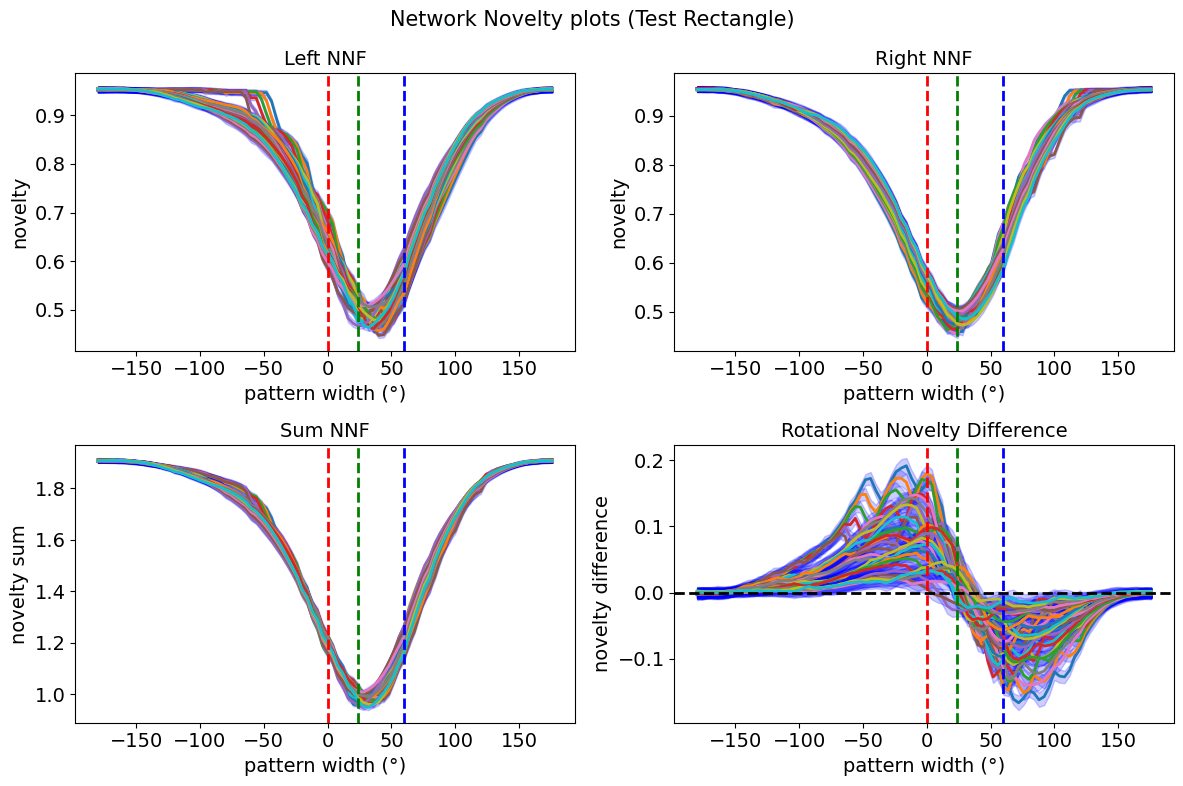

In [90]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Title
plt.suptitle('Network Novelty plots (Test Rectangle)')

# Plot on each subplot
for i, ax in enumerate(axs.flat):
    # angles
    angles = range(-180, 180, 1)

    # Plot the mean curves
    for name in colony_dict:
        mean_curve = np.mean(signals[i][name], axis=0)
        std_curve = np.std(signals[i][name], axis=0)
        # Plot the mean curve
        ax.plot(angles[::4], (mean_curve)[::4], label=name)
        # Plot the standard deviation as a shaded region
        ax.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
    # labelling
    ax.set_ylabel(ylabels[i])
    ax.set_xlabel('pattern width (°)')
    ax.set_title(titles[i])
    ax.axvline(x=theoretical_angle, color='green', linestyle='--', label='FPM match')
    ax.axvline(x=0, color='red', linestyle='--', label='Visual Center')
    ax.axvline(x=plf_angle, color='blue', linestyle='--', label='pLF')
    if i == 3:
        ax.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
        # no legend

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

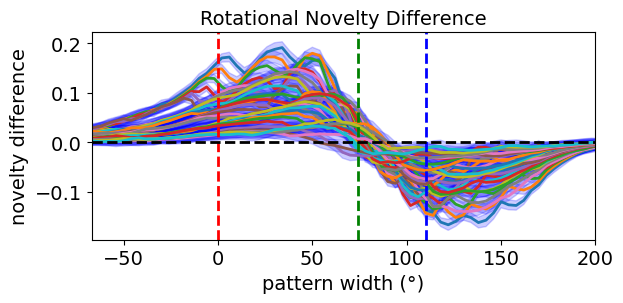

In [91]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig= plt.figure(figsize=(6.4, 6.4/2))

# Roll value
ROLL = 50
i = 3

# angles
angles = np.array(range(-180, 180, 1))+ROLL

# Plot the mean curves
for name in colony_dict:
    mean_curve = np.mean(signals[i][name], axis=0)
    std_curve = np.std(signals[i][name], axis=0)
    # Plot the mean curve
    plt.plot(angles[::4], (mean_curve)[::4], label=name)
    # Plot the standard deviation as a shaded region
    plt.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
# Labelling
plt.ylabel(ylabels[i])
plt.xlabel('pattern width (°)')
plt.title(titles[i])
plt.axvline(x=theoretical_angle+ROLL, color='green', linestyle='--', label='FPM match')
plt.axvline(x=plf_angle+ROLL, color='blue', linestyle='--', label='pLF')
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.xlim(-67, 200)  # Restrict x-axis to -90 to 90
plt.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
# plt.legend(loc='upper right')  # Add legend to each subplot
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [92]:
# initialize pooling
roll = ROLL
n_saccades = 100
TEST_NUM = 4
TEST_NAME = "MODE_2B"

for it in range(n_iter):
    dist_pooled = []
    # parameters
    for name in colony_dict:
        print (name) # loop over colony
        dist_name = []
        for i in range(colony_size):
            # parameters
            novelty_diff = diff_dict[name][i]
            novelty_sum = sum_dict[name][i]
            
            # get weighed distribution
            dist_sum = get_weighed_distribution(novelty_diff, novelty_sum, n_saccades, roll)
            dist_name += list(dist_sum)
            dist_pooled += list(dist_sum)

        # performance
        predicted_modes = kde_predictions(dist_name)
        true_mode = mode_location_dict[TEST_NAME]
        perf = get_performance(predicted_modes, true_mode)
        performance_tensor[it, TEST_NUM, crossover_index[name[0]], overlap_index[name[1]]] = perf
        print (perf)

    # pool performance
    predicted_modes = kde_predictions(dist_pooled)
    true_mode = mode_location_dict[TEST_NAME]
    perf = get_performance(predicted_modes, true_mode)
    performance_vector[it, TEST_NUM] = perf
    print (perf)

('DS_q=1', 0)
9.700000000000003
('DS_q=1', 8)
12.700000000000003
('DS_q=1', 16)
11.700000000000003
('DS_q=1', 24)
8.700000000000003
('DS_q=1', 32)
6.700000000000003
('DS_q=1', 40)
5.700000000000003
('DS_q=0.9', 0)
11.700000000000003
('DS_q=0.9', 8)
11.700000000000003
('DS_q=0.9', 16)
10.700000000000003
('DS_q=0.9', 24)
8.700000000000003
('DS_q=0.9', 32)
5.700000000000003
('DS_q=0.9', 40)
5.700000000000003
('DS_q=0.8', 0)
8.700000000000003
('DS_q=0.8', 8)
9.700000000000003
('DS_q=0.8', 16)
9.700000000000003
('DS_q=0.8', 24)
9.700000000000003
('DS_q=0.8', 32)
9.700000000000003
('DS_q=0.8', 40)
6.700000000000003
('DS_q=0.7', 0)
3.700000000000003
('DS_q=0.7', 8)
2.700000000000003
('DS_q=0.7', 16)
10.700000000000003
('DS_q=0.7', 24)
17.700000000000003
('DS_q=0.7', 32)
13.700000000000003
('DS_q=0.7', 40)
5.700000000000003
('DS_q=0.6', 0)
10.299999999999997
('DS_q=0.6', 8)
9.299999999999997
('DS_q=0.6', 16)
11.700000000000003
('DS_q=0.6', 24)
19.700000000000003
('DS_q=0.6', 32)
16.70000000000

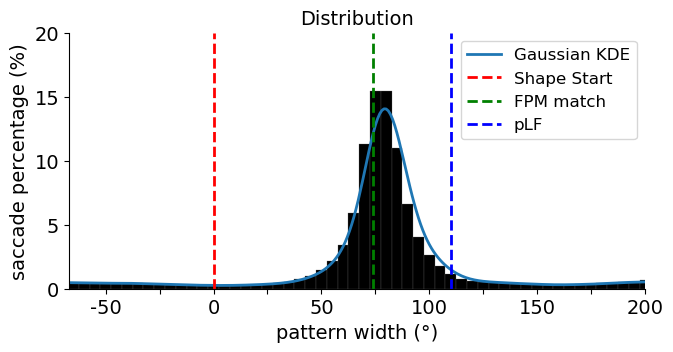

In [93]:
# Plotting
plot_distribution_image(dist_pooled, y_lim=0.2)
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.axvline(x=theoretical_angle+ROLL, color='green', linestyle='--', label='FPM match')
plt.axvline(x=plf_angle+ROLL, color='blue', linestyle='--', label='pLF')
plt.legend()

# Save the plot as an SVG file
#plt.savefig("../writeup_exports/pool/pool_2B.svg", format="svg", bbox_inches='tight')

# show
plt.show()

# Test Image 2C

In [94]:
# load test image
test_rotations = np.load('../paths/test/image_2c_rotations.npy')
test_image = test_rotations[180]
x_fpm = x_from_fpm(image=test_image, fpm=FPM)
theoretical_angle =  x_fpm - 180
theoretical_angle

28

<Axes: title={'center': 'Test Image'}, xlabel='X-axis', ylabel='Y-axis'>

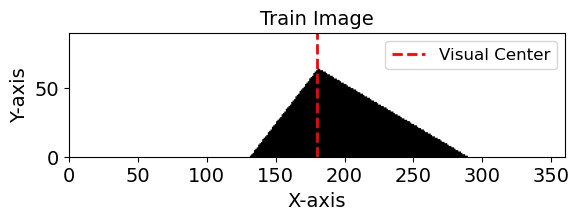

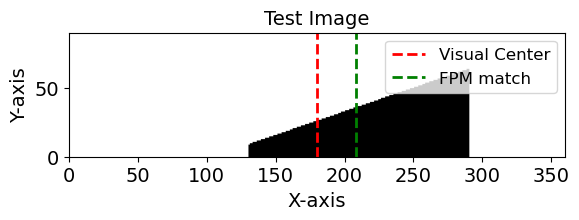

In [95]:
# Plot train and test with FPM match
plot_image(train_image, title='Train Image')
plot_image(test_image, fpm=x_fpm, title='Test Image')

In [96]:
# initialize results dictionnaries
left_dict = {}
right_dict = {}
sum_dict = {}
diff_dict = {}

In [97]:
# loop over colonies ()params
for name, colony in colony_dict.items():
    # print colony name
    print (name)

    # get test rotations
    test_rotations_transformed = [overlap_downsample_transform(arr, overlap=name[1]) for arr in test_rotations]
    rotation_tensor = [torch.tensor(a, dtype=torch.float) for a in test_rotations_transformed]
    rotation_tensor = torch.stack(rotation_tensor)

    # initialise arrays
    left_arr = np.zeros((colony_size, 360))
    right_arr = np.zeros((colony_size, 360))
    sum_arr = np.zeros((colony_size, 360))
    diff_arr = np.zeros((colony_size, 360))

    # run all models and get matrices
    for i in range(colony_size):
        model = colony_dict[name][i]
        l, r, s, d = model.forward(rotation_tensor)
        left_arr[i,:] = l.detach().numpy().flatten()
        right_arr[i,:] = r.detach().numpy().flatten()
        sum_arr[i,:] = s.detach().numpy().flatten()
        diff_arr[i,:] = d.detach().numpy().flatten()

    # set the dictionnary to the appropriate matrix
    left_dict[name] = left_arr
    right_dict[name] = right_arr
    sum_dict[name] = sum_arr
    diff_dict[name] = diff_arr

('DS_q=1', 0)
('DS_q=1', 8)
('DS_q=1', 16)
('DS_q=1', 24)
('DS_q=1', 32)
('DS_q=1', 40)
('DS_q=0.9', 0)
('DS_q=0.9', 8)
('DS_q=0.9', 16)
('DS_q=0.9', 24)
('DS_q=0.9', 32)
('DS_q=0.9', 40)
('DS_q=0.8', 0)
('DS_q=0.8', 8)
('DS_q=0.8', 16)
('DS_q=0.8', 24)
('DS_q=0.8', 32)
('DS_q=0.8', 40)
('DS_q=0.7', 0)
('DS_q=0.7', 8)
('DS_q=0.7', 16)
('DS_q=0.7', 24)
('DS_q=0.7', 32)
('DS_q=0.7', 40)
('DS_q=0.6', 0)
('DS_q=0.6', 8)
('DS_q=0.6', 16)
('DS_q=0.6', 24)
('DS_q=0.6', 32)
('DS_q=0.6', 40)


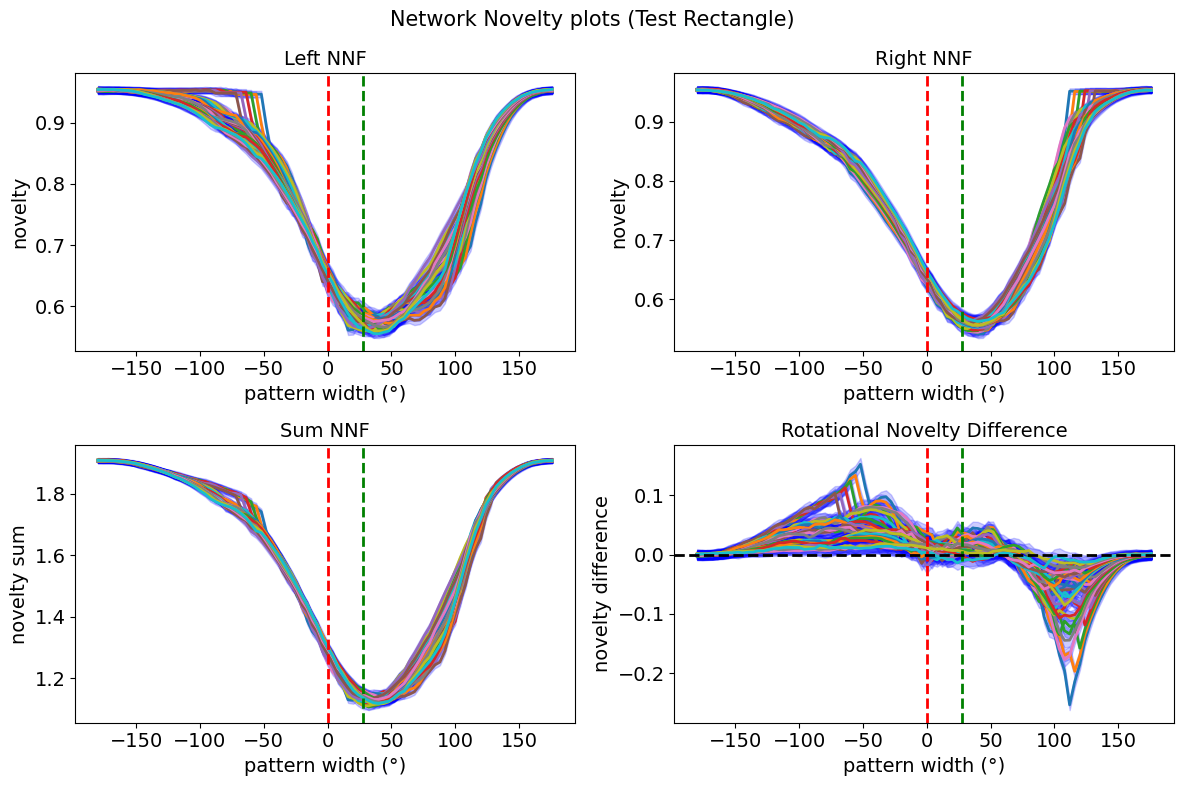

In [98]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Title
plt.suptitle('Network Novelty plots (Test Rectangle)')

# Plot on each subplot
for i, ax in enumerate(axs.flat):
    # angles
    angles = range(-180, 180, 1)

    # Plot the mean curves
    for name in colony_dict:
        mean_curve = np.mean(signals[i][name], axis=0)
        std_curve = np.std(signals[i][name], axis=0)
        # Plot the mean curve
        ax.plot(angles[::4], (mean_curve)[::4], label=name)
        # Plot the standard deviation as a shaded region
        ax.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
    # labelling
    ax.set_ylabel(ylabels[i])
    ax.set_xlabel('pattern width (°)')
    ax.set_title(titles[i])
    ax.axvline(x=theoretical_angle, color='green', linestyle='--', label='FPM match')
    ax.axvline(x=0, color='red', linestyle='--', label='Visual Center')
    if i == 3:
        ax.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
        # no legend

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

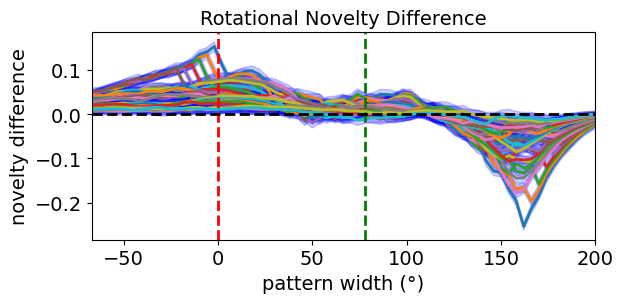

In [99]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig= plt.figure(figsize=(6.4, 6.4/2))

# Roll value
ROLL = 50
i = 3

# angles
angles = np.array(range(-180, 180, 1))+ROLL

# Plot the mean curves
for name in colony_dict:
    mean_curve = np.mean(signals[i][name], axis=0)
    std_curve = np.std(signals[i][name], axis=0)
    # Plot the mean curve
    plt.plot(angles[::4], (mean_curve)[::4], label=name)
    # Plot the standard deviation as a shaded region
    plt.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
# Labelling
plt.ylabel(ylabels[i])
plt.xlabel('pattern width (°)')
plt.title(titles[i])
plt.axvline(x=theoretical_angle+ROLL, color='green', linestyle='--', label='FPM match')
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.xlim(-67, 200)  # Restrict x-axis to -90 to 90
plt.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
# plt.legend(loc='upper right')  # Add legend to each subplot
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [100]:
# initialize pooling
roll = ROLL
n_saccades = 100
TEST_NUM = 5
TEST_NAME = "MODE_2C"

for it in range(n_iter):
    dist_pooled = []
    # parameters
    for name in colony_dict:
        print (name) # loop over colony
        dist_name = []
        for i in range(colony_size):
            # parameters
            novelty_diff = diff_dict[name][i]
            novelty_sum = sum_dict[name][i]
            
            # get weighed distribution
            dist_sum = get_weighed_distribution(novelty_diff, novelty_sum, n_saccades, roll)
            dist_name += list(dist_sum)
            dist_pooled += list(dist_sum)

        # performance
        predicted_modes = kde_predictions(dist_name)
        true_mode = mode_location_dict[TEST_NAME]
        perf = get_performance(predicted_modes, true_mode)
        performance_tensor[it, TEST_NUM, crossover_index[name[0]], overlap_index[name[1]]] = perf
        print (perf)

    # pool performance
    predicted_modes = kde_predictions(dist_pooled)
    true_mode = mode_location_dict[TEST_NAME]
    perf = get_performance(predicted_modes, true_mode)
    performance_vector[it, TEST_NUM] = perf
    print (perf)

('DS_q=1', 0)
5.299999999999997
('DS_q=1', 8)
9.299999999999997
('DS_q=1', 16)
13.299999999999997
('DS_q=1', 24)
10.700000000000003
('DS_q=1', 32)
3.700000000000003
('DS_q=1', 40)
1.2999999999999972
('DS_q=0.9', 0)
12.700000000000003
('DS_q=0.9', 8)
6.700000000000003
('DS_q=0.9', 16)
6.700000000000003
('DS_q=0.9', 24)
2.700000000000003
('DS_q=0.9', 32)
4.299999999999997
('DS_q=0.9', 40)
7.299999999999997
('DS_q=0.8', 0)
8.700000000000003
('DS_q=0.8', 8)
1.7000000000000028
('DS_q=0.8', 16)
0.29999999999999716
('DS_q=0.8', 24)
0.7000000000000028
('DS_q=0.8', 32)
5.299999999999997
('DS_q=0.8', 40)
12.299999999999997
('DS_q=0.7', 0)
6.700000000000003
('DS_q=0.7', 8)
0.29999999999999716
('DS_q=0.7', 16)
3.299999999999997
('DS_q=0.7', 24)
10.299999999999997
('DS_q=0.7', 32)
19.700000000000003
('DS_q=0.7', 40)
24.700000000000003
('DS_q=0.6', 0)
4.299999999999997
('DS_q=0.6', 8)
27.700000000000003
('DS_q=0.6', 16)
32.7
('DS_q=0.6', 24)
22.700000000000003
('DS_q=0.6', 32)
9.700000000000003
('DS

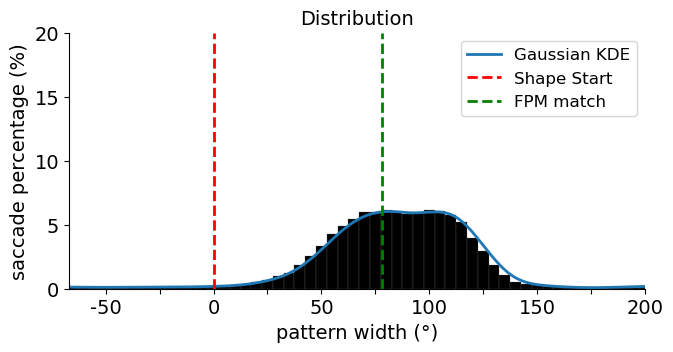

In [101]:
# Plotting
plot_distribution_image(dist_pooled, y_lim=0.2)
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.axvline(x=theoretical_angle+roll, color='green', linestyle='--', label='FPM match')
plt.legend()

# Save the plot as an SVG file
#plt.savefig("../writeup_exports/pool/pool_2C.svg", format="svg", bbox_inches='tight')

# show
plt.show()

# Train Path 3A1

In [102]:
train_path = np.load('../paths/train/path_3a1.npy')
train_image = train_path[0]
FPM = compute_fpm(train_image)
FPM

0.12121212121212122

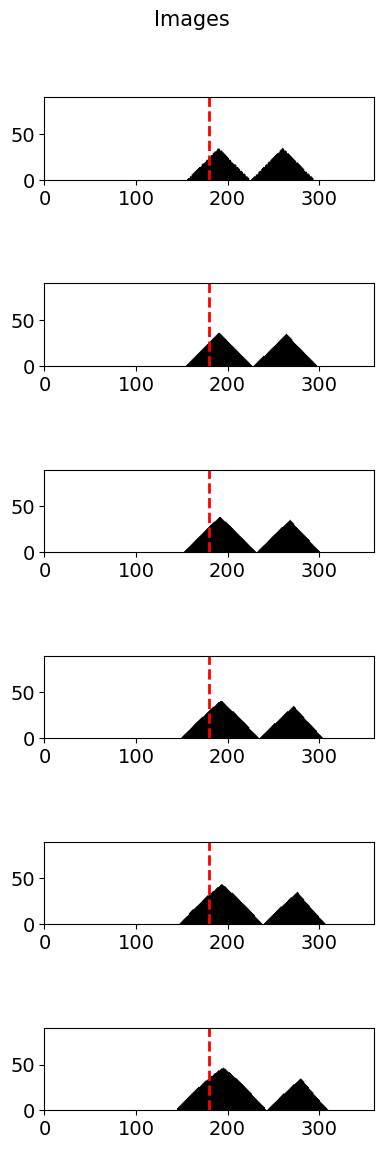

In [103]:
plot_images(train_path[::5])

In [104]:
# train all colonies on the train image
for name, colony in colony_dict.items():
    print (name)
    # transform to get down model features
    train_path_down = [overlap_downsample_transform(arr, overlap=name[1]) for arr in train_path]
    train_path_down[0].shape
    # train
    for model in colony:
        model.LeftMB.initialize_output_weights()
        model.RightMB.initialize_output_weights()
        model.train_network(train_path_down)

('DS_q=1', 0)
('DS_q=1', 8)
('DS_q=1', 16)
('DS_q=1', 24)
('DS_q=1', 32)
('DS_q=1', 40)
('DS_q=0.9', 0)
('DS_q=0.9', 8)
('DS_q=0.9', 16)
('DS_q=0.9', 24)
('DS_q=0.9', 32)
('DS_q=0.9', 40)
('DS_q=0.8', 0)
('DS_q=0.8', 8)
('DS_q=0.8', 16)
('DS_q=0.8', 24)
('DS_q=0.8', 32)
('DS_q=0.8', 40)
('DS_q=0.7', 0)
('DS_q=0.7', 8)
('DS_q=0.7', 16)
('DS_q=0.7', 24)
('DS_q=0.7', 32)
('DS_q=0.7', 40)
('DS_q=0.6', 0)
('DS_q=0.6', 8)
('DS_q=0.6', 16)
('DS_q=0.6', 24)
('DS_q=0.6', 32)
('DS_q=0.6', 40)


# Test Training Image

In [105]:
# load test image
test_rotations = get_shifted_rotations(train_image)
test_image = test_rotations[180]
x_fpm = x_from_fpm(image=test_image, fpm=FPM)
theoretical_angle =  x_fpm - 180

<Axes: title={'center': 'Test Image'}, xlabel='X-axis', ylabel='Y-axis'>

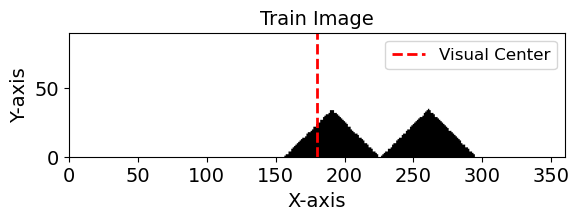

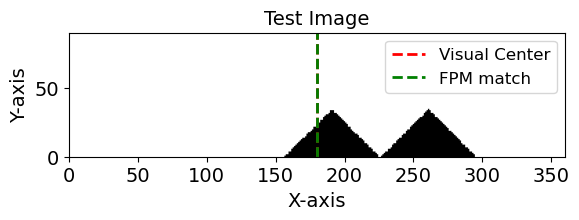

In [106]:
# Plot train and test with FPM match
plot_image(train_image, title='Train Image')
plot_image(test_image, fpm=x_fpm, title='Test Image')

In [107]:
# initialize results dictionnaries
left_dict = {}
right_dict = {}
sum_dict = {}
diff_dict = {}

In [108]:
# loop over colonies ()params
for name, colony in colony_dict.items():
    # print colony name
    print (name)

    # get test rotations
    test_rotations_transformed = [overlap_downsample_transform(arr, overlap=name[1]) for arr in test_rotations]
    rotation_tensor = [torch.tensor(a, dtype=torch.float) for a in test_rotations_transformed]
    rotation_tensor = torch.stack(rotation_tensor)

    # initialise arrays
    left_arr = np.zeros((colony_size, 360))
    right_arr = np.zeros((colony_size, 360))
    sum_arr = np.zeros((colony_size, 360))
    diff_arr = np.zeros((colony_size, 360))

    # run all models and get matrices
    for i in range(colony_size):
        model = colony_dict[name][i]
        l, r, s, d = model.forward(rotation_tensor)
        left_arr[i,:] = l.detach().numpy().flatten()
        right_arr[i,:] = r.detach().numpy().flatten()
        sum_arr[i,:] = s.detach().numpy().flatten()
        diff_arr[i,:] = d.detach().numpy().flatten()

    # set the dictionnary to the appropriate matrix
    left_dict[name] = left_arr
    right_dict[name] = right_arr
    sum_dict[name] = sum_arr
    diff_dict[name] = diff_arr

('DS_q=1', 0)
('DS_q=1', 8)
('DS_q=1', 16)
('DS_q=1', 24)
('DS_q=1', 32)
('DS_q=1', 40)
('DS_q=0.9', 0)
('DS_q=0.9', 8)
('DS_q=0.9', 16)
('DS_q=0.9', 24)
('DS_q=0.9', 32)
('DS_q=0.9', 40)
('DS_q=0.8', 0)
('DS_q=0.8', 8)
('DS_q=0.8', 16)
('DS_q=0.8', 24)
('DS_q=0.8', 32)
('DS_q=0.8', 40)
('DS_q=0.7', 0)
('DS_q=0.7', 8)
('DS_q=0.7', 16)
('DS_q=0.7', 24)
('DS_q=0.7', 32)
('DS_q=0.7', 40)
('DS_q=0.6', 0)
('DS_q=0.6', 8)
('DS_q=0.6', 16)
('DS_q=0.6', 24)
('DS_q=0.6', 32)
('DS_q=0.6', 40)


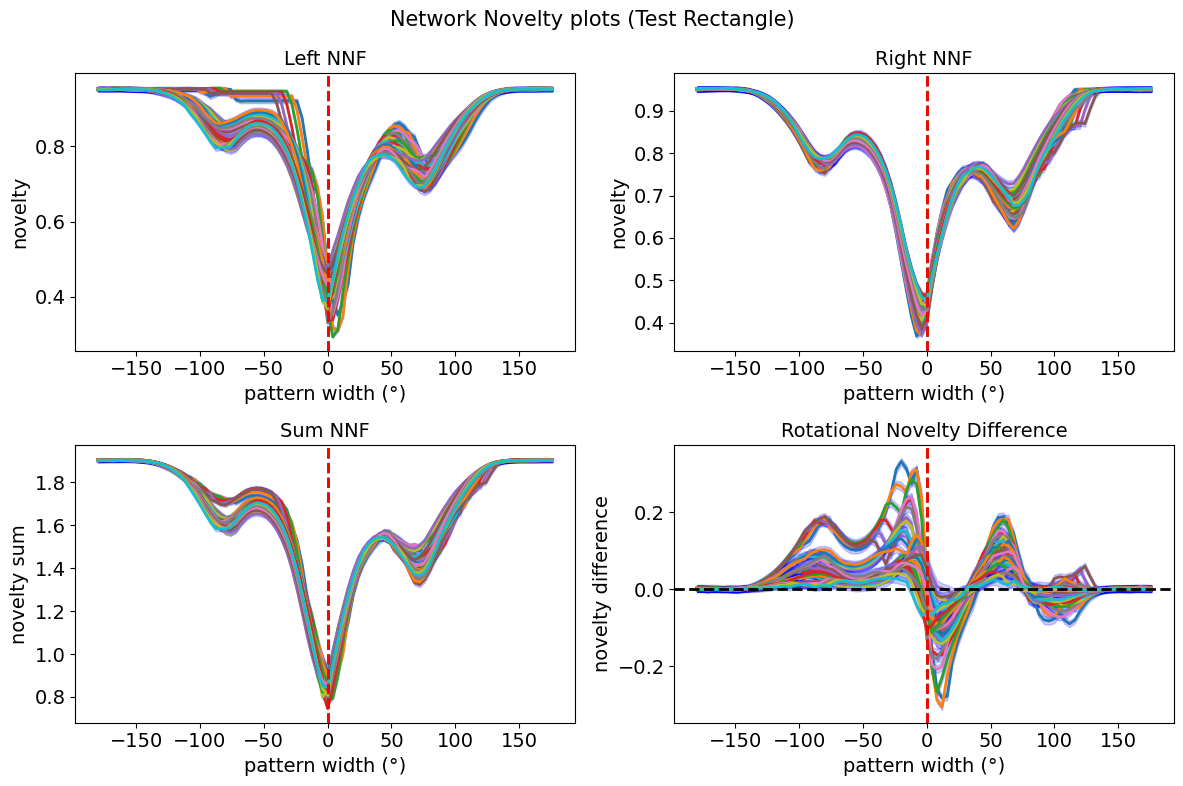

In [109]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Title
plt.suptitle('Network Novelty plots (Test Rectangle)')

# Plot on each subplot
for i, ax in enumerate(axs.flat):
    # angles
    angles = range(-180, 180, 1)

    # Plot the mean curves
    for name in colony_dict:
        mean_curve = np.mean(signals[i][name], axis=0)
        std_curve = np.std(signals[i][name], axis=0)
        # Plot the mean curve
        ax.plot(angles[::4], (mean_curve)[::4], label=name)
        # Plot the standard deviation as a shaded region
        ax.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
    # labelling
    ax.set_ylabel(ylabels[i])
    ax.set_xlabel('pattern width (°)')
    ax.set_title(titles[i])
    ax.axvline(x=theoretical_angle, color='green', linestyle='--', label='FPM match')
    ax.axvline(x=0, color='red', linestyle='--', label='Visual Center')
    if i == 3:
        ax.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
        # no legend

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

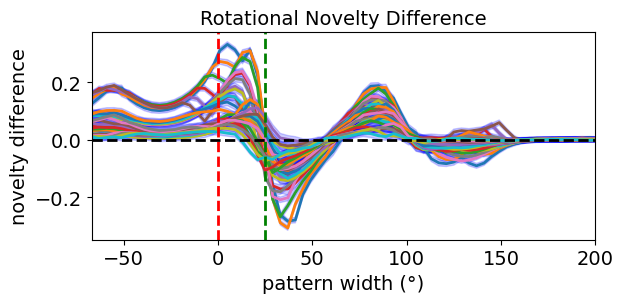

In [110]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig= plt.figure(figsize=(6.4, 6.4/2))

# Roll value
ROLL = 25
i = 3

# angles
angles = np.array(range(-180, 180, 1))+ROLL

# Plot the mean curves
for name in colony_dict:
    mean_curve = np.mean(signals[i][name], axis=0)
    std_curve = np.std(signals[i][name], axis=0)
    # Plot the mean curve
    plt.plot(angles[::4], (mean_curve)[::4], label=name)
    # Plot the standard deviation as a shaded region
    plt.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
# Labelling
plt.ylabel(ylabels[i])
plt.xlabel('pattern width (°)')
plt.title(titles[i])
plt.axvline(x=theoretical_angle+ROLL, color='green', linestyle='--', label='FPM match')
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.xlim(-67, 200)  # Restrict x-axis to -90 to 90
plt.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
# plt.legend(loc='upper right')  # Add legend to each subplot
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [111]:
# initialize pooling
roll = ROLL
n_saccades = 100
TEST_NUM = 6
TEST_NAME = "MODE_3A1"

for it in range(n_iter):
    dist_pooled = []
    # parameters
    for name in colony_dict:
        print (name) # loop over colony
        dist_name = []
        for i in range(colony_size):
            # parameters
            novelty_diff = diff_dict[name][i]
            novelty_sum = sum_dict[name][i]
            
            # get weighed distribution
            dist_sum = get_weighed_distribution(novelty_diff, novelty_sum, n_saccades, roll)
            dist_name += list(dist_sum)
            dist_pooled += list(dist_sum)

        # performance
        predicted_modes = kde_predictions(dist_name)
        true_mode = mode_location_dict[TEST_NAME]
        perf = get_performance(predicted_modes, true_mode)
        performance_tensor[it, TEST_NUM, crossover_index[name[0]], overlap_index[name[1]]] = perf
        print (perf)

    # pool performance
    predicted_modes = kde_predictions(dist_pooled)
    true_mode = mode_location_dict[TEST_NAME]
    perf = get_performance(predicted_modes, true_mode)
    performance_vector[it, TEST_NUM] = perf
    print (perf)

('DS_q=1', 0)
1.0
('DS_q=1', 8)
0.0
('DS_q=1', 16)
1.0
('DS_q=1', 24)
2.0
('DS_q=1', 32)
3.0
('DS_q=1', 40)
0.0
('DS_q=0.9', 0)
2.0
('DS_q=0.9', 8)
4.0
('DS_q=0.9', 16)
4.0
('DS_q=0.9', 24)
1.0
('DS_q=0.9', 32)
1.0
('DS_q=0.9', 40)
2.0
('DS_q=0.8', 0)
7.0
('DS_q=0.8', 8)
6.0
('DS_q=0.8', 16)
2.0
('DS_q=0.8', 24)
0.0
('DS_q=0.8', 32)
0.0
('DS_q=0.8', 40)
2.0
('DS_q=0.7', 0)
3.0
('DS_q=0.7', 8)
3.0
('DS_q=0.7', 16)
1.0
('DS_q=0.7', 24)
2.0
('DS_q=0.7', 32)
5.0
('DS_q=0.7', 40)
8.0
('DS_q=0.6', 0)
9.0
('DS_q=0.6', 8)
6.0
('DS_q=0.6', 16)
1.0
('DS_q=0.6', 24)
7.0
('DS_q=0.6', 32)
10.0
('DS_q=0.6', 40)
13.0
1.0
('DS_q=1', 0)
1.0
('DS_q=1', 8)
0.0
('DS_q=1', 16)
1.0
('DS_q=1', 24)
2.0
('DS_q=1', 32)
3.0
('DS_q=1', 40)
0.0
('DS_q=0.9', 0)
2.0
('DS_q=0.9', 8)
4.0
('DS_q=0.9', 16)
4.0
('DS_q=0.9', 24)
1.0
('DS_q=0.9', 32)
1.0
('DS_q=0.9', 40)
2.0
('DS_q=0.8', 0)
7.0
('DS_q=0.8', 8)
6.0
('DS_q=0.8', 16)
1.0
('DS_q=0.8', 24)
0.0
('DS_q=0.8', 32)
1.0
('DS_q=0.8', 40)
2.0
('DS_q=0.7', 0)
3.0
('DS_q

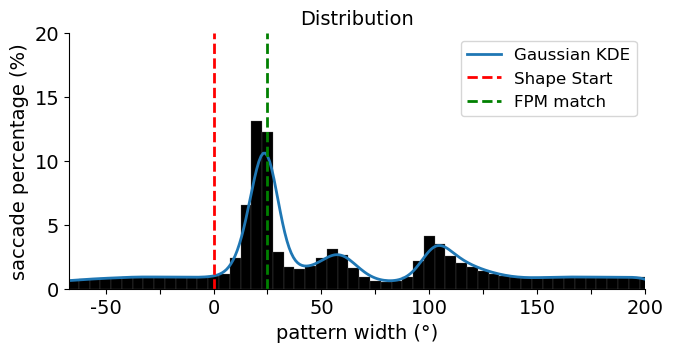

In [112]:
# Plotting
plot_distribution_image(dist_pooled, y_lim=0.2)
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.axvline(x=theoretical_angle+roll, color='green', linestyle='--', label='FPM match')
plt.legend()

# Save the plot as an SVG file
#plt.savefig("../writeup_exports/pool/pool_3A1.svg", format="svg", bbox_inches='tight')

# show
plt.show()

# Test Image 3A2

In [113]:
# load test image
test_rotations = np.load('../paths/test/image_3a2_rotations.npy')
test_image = test_rotations[180]
x_fpm = x_from_fpm(image=test_image, fpm=FPM)
theoretical_angle =  x_fpm - 180

In [114]:
sfpm = x_from_fpm(test_image,2*FPM)
wfpm = x_from_fpm(test_image,FPM)
angle_sfpm = sfpm - 180
angle_wfpm = wfpm - 180

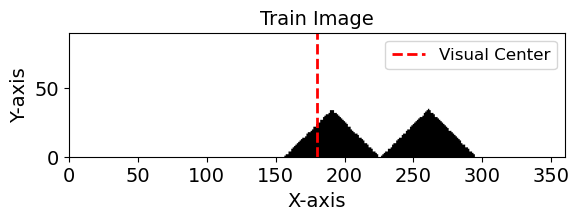

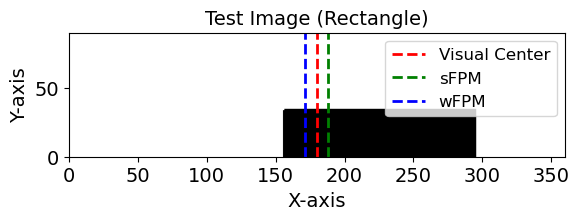

In [115]:
# Plot train and test with FPM match
plot_image(train_image, title='Train Image')
plot_image_s(test_image, sfpm=sfpm, wfpm=wfpm, title='Test Image (Rectangle)')

In [116]:
# initialize results dictionnaries
left_dict = {}
right_dict = {}
sum_dict = {}
diff_dict = {}

In [117]:
# loop over colonies ()params
for name, colony in colony_dict.items():
    # print colony name
    print (name)

    # get test rotations
    test_rotations_transformed = [overlap_downsample_transform(arr, overlap=name[1]) for arr in test_rotations]
    rotation_tensor = [torch.tensor(a, dtype=torch.float) for a in test_rotations_transformed]
    rotation_tensor = torch.stack(rotation_tensor)

    # initialise arrays
    left_arr = np.zeros((colony_size, 360))
    right_arr = np.zeros((colony_size, 360))
    sum_arr = np.zeros((colony_size, 360))
    diff_arr = np.zeros((colony_size, 360))

    # run all models and get matrices
    for i in range(colony_size):
        model = colony_dict[name][i]
        l, r, s, d = model.forward(rotation_tensor)
        left_arr[i,:] = l.detach().numpy().flatten()
        right_arr[i,:] = r.detach().numpy().flatten()
        sum_arr[i,:] = s.detach().numpy().flatten()
        diff_arr[i,:] = d.detach().numpy().flatten()

    # set the dictionnary to the appropriate matrix
    left_dict[name] = left_arr
    right_dict[name] = right_arr
    sum_dict[name] = sum_arr
    diff_dict[name] = diff_arr

('DS_q=1', 0)
('DS_q=1', 8)
('DS_q=1', 16)
('DS_q=1', 24)
('DS_q=1', 32)
('DS_q=1', 40)
('DS_q=0.9', 0)
('DS_q=0.9', 8)
('DS_q=0.9', 16)
('DS_q=0.9', 24)
('DS_q=0.9', 32)
('DS_q=0.9', 40)
('DS_q=0.8', 0)
('DS_q=0.8', 8)
('DS_q=0.8', 16)
('DS_q=0.8', 24)
('DS_q=0.8', 32)
('DS_q=0.8', 40)
('DS_q=0.7', 0)
('DS_q=0.7', 8)
('DS_q=0.7', 16)
('DS_q=0.7', 24)
('DS_q=0.7', 32)
('DS_q=0.7', 40)
('DS_q=0.6', 0)
('DS_q=0.6', 8)
('DS_q=0.6', 16)
('DS_q=0.6', 24)
('DS_q=0.6', 32)
('DS_q=0.6', 40)


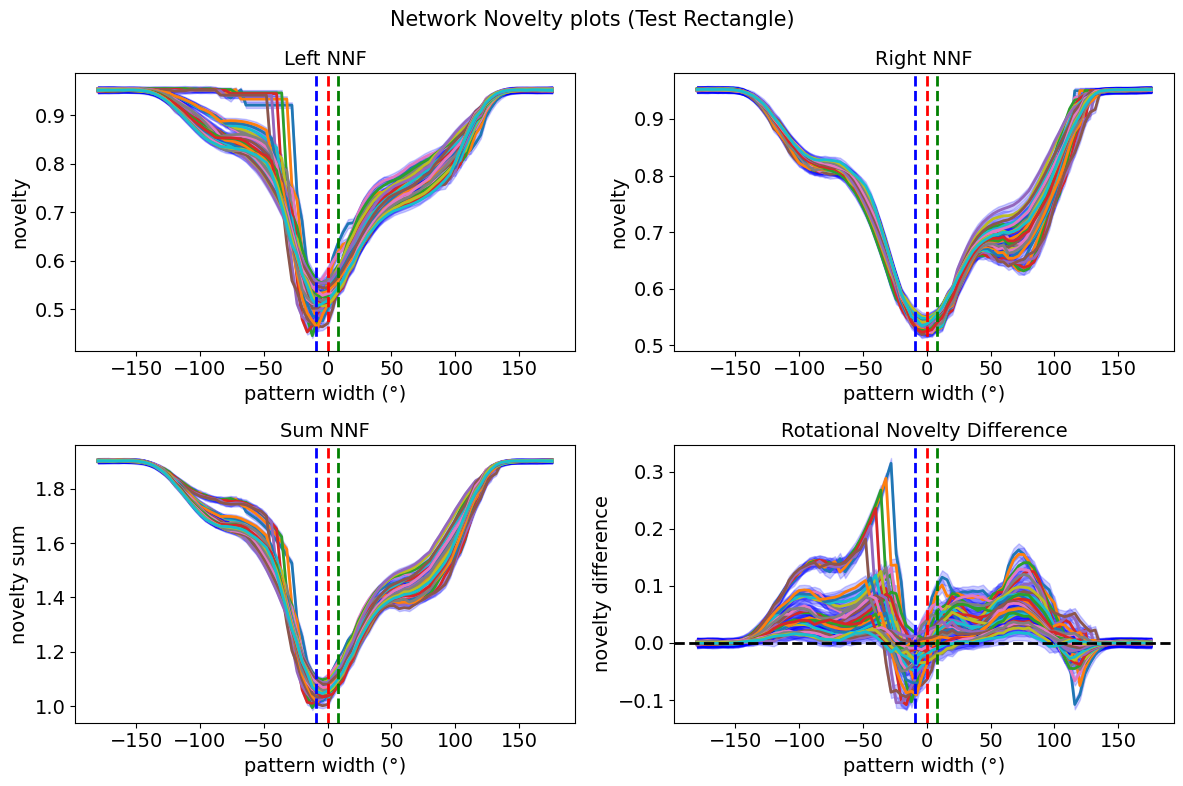

In [118]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Title
plt.suptitle('Network Novelty plots (Test Rectangle)')

# Plot on each subplot
for i, ax in enumerate(axs.flat):
    # angles
    angles = range(-180, 180, 1)

    # Plot the mean curves
    for name in colony_dict:
        mean_curve = np.mean(signals[i][name], axis=0)
        std_curve = np.std(signals[i][name], axis=0)
        # Plot the mean curve
        ax.plot(angles[::4], (mean_curve)[::4], label=name)
        # Plot the standard deviation as a shaded region
        ax.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
    # labelling
    ax.set_ylabel(ylabels[i])
    ax.set_xlabel('pattern width (°)')
    ax.set_title(titles[i])
    ax.axvline(x=angle_sfpm, color='green', linestyle='--', label='sFPM match')
    ax.axvline(x=angle_wfpm, color='blue', linestyle='--', label='wFPM match')
    ax.axvline(x=0, color='red', linestyle='--', label='Visual Center')
    if i == 3:
        ax.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
        # no legend

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

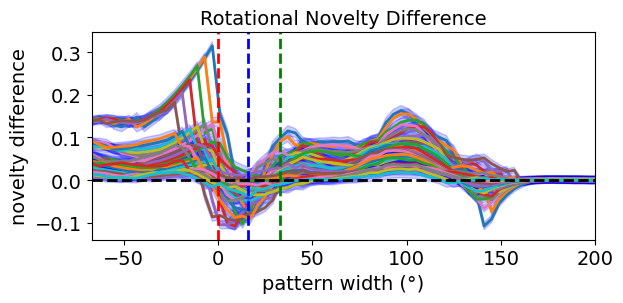

In [119]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig= plt.figure(figsize=(6.4, 6.4/2))

# Roll value
ROLL = 25
i = 3

# angles
angles = np.array(range(-180, 180, 1))+ROLL

# Plot the mean curves
for name in colony_dict:
    mean_curve = np.mean(signals[i][name], axis=0)
    std_curve = np.std(signals[i][name], axis=0)
    # Plot the mean curve
    plt.plot(angles[::4], (mean_curve)[::4], label=name)
    # Plot the standard deviation as a shaded region
    plt.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
# Labelling
plt.ylabel(ylabels[i])
plt.xlabel('pattern width (°)')
plt.title(titles[i])
plt.axvline(x=angle_wfpm+ROLL, color='blue', linestyle='--', label='wFPM match')
plt.axvline(x=angle_sfpm+ROLL, color='green', linestyle='--', label='sFPM match')
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.xlim(-67, 200)  # Restrict x-axis to -90 to 90
plt.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
# plt.legend(loc='upper right')  # Add legend to each subplot
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [120]:
# initialize pooling
roll = ROLL
n_saccades = 100
TEST_NUM = 7
TEST_NAME = "MODE_3A2"

for it in range(n_iter):
    dist_pooled = []
    # parameters
    for name in colony_dict:
        print (name) # loop over colony
        dist_name = []
        for i in range(colony_size):
            # parameters
            novelty_diff = diff_dict[name][i]
            novelty_sum = sum_dict[name][i]
            
            # get weighed distribution
            dist_sum = get_weighed_distribution(novelty_diff, novelty_sum, n_saccades, roll)
            dist_name += list(dist_sum)
            dist_pooled += list(dist_sum)

        # performance
        predicted_modes = kde_predictions(dist_name)
        true_mode = mode_location_dict[TEST_NAME]
        perf = get_performance(predicted_modes, true_mode)
        performance_tensor[it, TEST_NUM, crossover_index[name[0]], overlap_index[name[1]]] = perf
        print (perf)

    # pool performance
    predicted_modes = kde_predictions(dist_pooled)
    true_mode = mode_location_dict[TEST_NAME]
    perf = get_performance(predicted_modes, true_mode)
    performance_vector[it, TEST_NUM] = perf
    print (perf)

('DS_q=1', 0)
15.299999999999997
('DS_q=1', 8)
12.299999999999997
('DS_q=1', 16)
9.299999999999997
('DS_q=1', 24)
5.299999999999997
('DS_q=1', 32)
1.2999999999999972
('DS_q=1', 40)
0.29999999999999716
('DS_q=0.9', 0)
19.299999999999997
('DS_q=0.9', 8)
19.299999999999997
('DS_q=0.9', 16)
10.299999999999997
('DS_q=0.9', 24)
4.299999999999997
('DS_q=0.9', 32)
3.299999999999997
('DS_q=0.9', 40)
2.299999999999997
('DS_q=0.8', 0)
8.299999999999997
('DS_q=0.8', 8)
12.299999999999997
('DS_q=0.8', 16)
9.299999999999997
('DS_q=0.8', 24)
10.299999999999997
('DS_q=0.8', 32)
10.299999999999997
('DS_q=0.8', 40)
5.299999999999997
('DS_q=0.7', 0)
8.299999999999997
('DS_q=0.7', 8)
8.299999999999997
('DS_q=0.7', 16)
16.299999999999997
('DS_q=0.7', 24)
13.299999999999997
('DS_q=0.7', 32)
10.299999999999997
('DS_q=0.7', 40)
3.299999999999997
('DS_q=0.6', 0)
19.299999999999997
('DS_q=0.6', 8)
14.299999999999997
('DS_q=0.6', 16)
9.299999999999997
('DS_q=0.6', 24)
6.700000000000003
('DS_q=0.6', 32)
11.700000

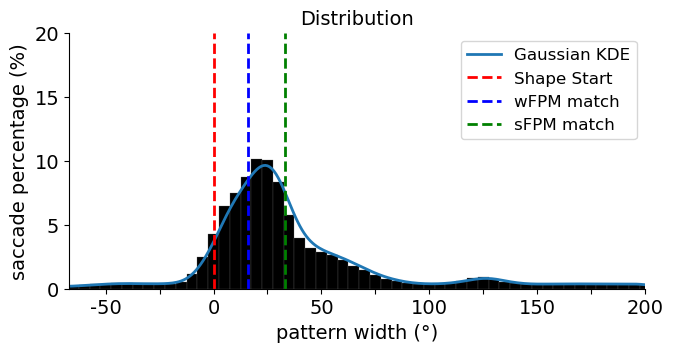

In [121]:
# Plotting
plot_distribution_image(dist_pooled, y_lim=0.2)
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.axvline(x=angle_wfpm+ROLL, color='blue', linestyle='--', label='wFPM match')
plt.axvline(x=angle_sfpm+ROLL, color='green', linestyle='--', label='sFPM match')
plt.legend()

# Save the plot as an SVG file
#plt.savefig("../writeup_exports/pool/pool_3A2.svg", format="svg", bbox_inches='tight')

# show
plt.show()

# Test Image 3A3

In [122]:
# load test image
test_rotations = np.load('../paths/test/image_3a3_rotations.npy')
test_image = test_rotations[180]
x_fpm = x_from_fpm(image=test_image, fpm=FPM)
theoretical_angle =  x_fpm - 180

In [123]:
sfpm = x_from_fpm(test_image,2*FPM)
angle_sfpm = sfpm - 180
elf = 180
angle_elf = 0

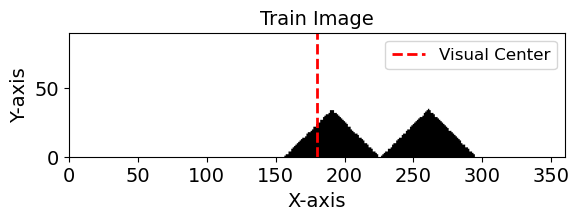

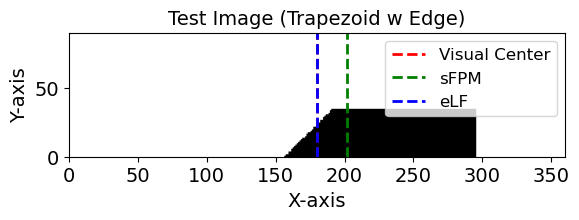

In [124]:
# Plot train and test with FPM match
plot_image(train_image, title='Train Image')
plot_image_s(test_image, sfpm=sfpm, elf=elf, title='Test Image (Trapezoid w Edge)')

In [125]:
# initialize results dictionnaries
left_dict = {}
right_dict = {}
sum_dict = {}
diff_dict = {}

In [126]:
# loop over colonies ()params
for name, colony in colony_dict.items():
    # print colony name
    print (name)

    # get test rotations
    test_rotations_transformed = [overlap_downsample_transform(arr, overlap=name[1]) for arr in test_rotations]
    rotation_tensor = [torch.tensor(a, dtype=torch.float) for a in test_rotations_transformed]
    rotation_tensor = torch.stack(rotation_tensor)

    # initialise arrays
    left_arr = np.zeros((colony_size, 360))
    right_arr = np.zeros((colony_size, 360))
    sum_arr = np.zeros((colony_size, 360))
    diff_arr = np.zeros((colony_size, 360))

    # run all models and get matrices
    for i in range(colony_size):
        model = colony_dict[name][i]
        l, r, s, d = model.forward(rotation_tensor)
        left_arr[i,:] = l.detach().numpy().flatten()
        right_arr[i,:] = r.detach().numpy().flatten()
        sum_arr[i,:] = s.detach().numpy().flatten()
        diff_arr[i,:] = d.detach().numpy().flatten()

    # set the dictionnary to the appropriate matrix
    left_dict[name] = left_arr
    right_dict[name] = right_arr
    sum_dict[name] = sum_arr
    diff_dict[name] = diff_arr

('DS_q=1', 0)
('DS_q=1', 8)
('DS_q=1', 16)
('DS_q=1', 24)
('DS_q=1', 32)
('DS_q=1', 40)
('DS_q=0.9', 0)
('DS_q=0.9', 8)
('DS_q=0.9', 16)
('DS_q=0.9', 24)
('DS_q=0.9', 32)
('DS_q=0.9', 40)
('DS_q=0.8', 0)
('DS_q=0.8', 8)
('DS_q=0.8', 16)
('DS_q=0.8', 24)
('DS_q=0.8', 32)
('DS_q=0.8', 40)
('DS_q=0.7', 0)
('DS_q=0.7', 8)
('DS_q=0.7', 16)
('DS_q=0.7', 24)
('DS_q=0.7', 32)
('DS_q=0.7', 40)
('DS_q=0.6', 0)
('DS_q=0.6', 8)
('DS_q=0.6', 16)
('DS_q=0.6', 24)
('DS_q=0.6', 32)
('DS_q=0.6', 40)


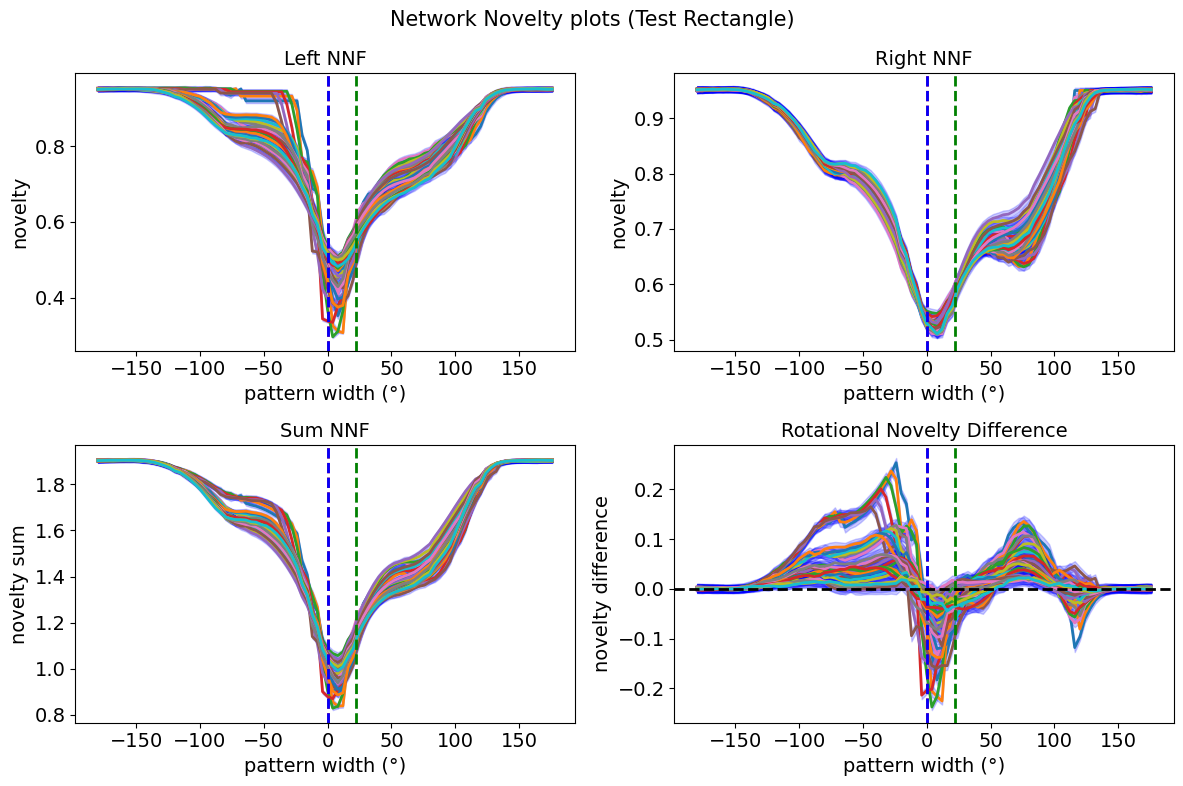

In [127]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Title
plt.suptitle('Network Novelty plots (Test Rectangle)')

# Plot on each subplot
for i, ax in enumerate(axs.flat):
    # angles
    angles = range(-180, 180, 1)

    # Plot the mean curves
    for name in colony_dict:
        mean_curve = np.mean(signals[i][name], axis=0)
        std_curve = np.std(signals[i][name], axis=0)
        # Plot the mean curve
        ax.plot(angles[::4], (mean_curve)[::4], label=name)
        # Plot the standard deviation as a shaded region
        ax.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
    # labelling
    ax.set_ylabel(ylabels[i])
    ax.set_xlabel('pattern width (°)')
    ax.set_title(titles[i])
    ax.axvline(x=angle_sfpm, color='green', linestyle='--', label='sFPM match')
    ax.axvline(x=0, color='red', linestyle='--', label='Visual Center')
    ax.axvline(x=angle_elf, color='blue', linestyle='--', label='eLF match')
    if i == 3:
        ax.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
        # no legend

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

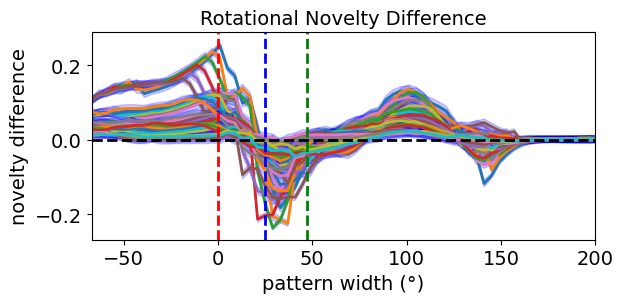

In [128]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig= plt.figure(figsize=(6.4, 6.4/2))

# Roll value
ROLL = 25
i = 3

# angles
angles = np.array(range(-180, 180, 1))+ROLL

# Plot the mean curves
for name in colony_dict:
    mean_curve = np.mean(signals[i][name], axis=0)
    std_curve = np.std(signals[i][name], axis=0)
    # Plot the mean curve
    plt.plot(angles[::4], (mean_curve)[::4], label=name)
    # Plot the standard deviation as a shaded region
    plt.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
# Labelling
plt.ylabel(ylabels[i])
plt.xlabel('pattern width (°)')
plt.title(titles[i])
plt.axvline(x=angle_elf+ROLL, color='blue', linestyle='--', label='eLF match')
plt.axvline(x=angle_sfpm+ROLL, color='green', linestyle='--', label='sFPM match')
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.xlim(-67, 200)  # Restrict x-axis to -90 to 90
plt.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
# plt.legend(loc='upper right')  # Add legend to each subplot
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [129]:
# initialize pooling
roll = ROLL
n_saccades = 100
TEST_NUM = 8
TEST_NAME = "MODE_3A3"

for it in range(n_iter):
    dist_pooled = []
    # parameters
    for name in colony_dict:
        print (name) # loop over colony
        dist_name = []
        for i in range(colony_size):
            # parameters
            novelty_diff = diff_dict[name][i]
            novelty_sum = sum_dict[name][i]
            
            # get weighed distribution
            dist_sum = get_weighed_distribution(novelty_diff, novelty_sum, n_saccades, roll)
            dist_name += list(dist_sum)
            dist_pooled += list(dist_sum)

        # performance
        predicted_modes = kde_predictions(dist_name)
        true_mode = mode_location_dict[TEST_NAME]
        perf = get_performance(predicted_modes, true_mode)
        performance_tensor[it, TEST_NUM, crossover_index[name[0]], overlap_index[name[1]]] = perf
        print (perf)

    # pool performance
    predicted_modes = kde_predictions(dist_pooled)
    true_mode = mode_location_dict[TEST_NAME]
    perf = get_performance(predicted_modes, true_mode)
    performance_vector[it, TEST_NUM] = perf
    print (perf)

('DS_q=1', 0)
0.6999999999999993
('DS_q=1', 8)
2.6999999999999993
('DS_q=1', 16)
4.699999999999999
('DS_q=1', 24)
8.7
('DS_q=1', 32)
10.7
('DS_q=1', 40)
10.7
('DS_q=0.9', 0)
3.6999999999999993
('DS_q=0.9', 8)
6.699999999999999
('DS_q=0.9', 16)
4.699999999999999
('DS_q=0.9', 24)
3.6999999999999993
('DS_q=0.9', 32)
3.6999999999999993
('DS_q=0.9', 40)
6.699999999999999
('DS_q=0.8', 0)
0.3000000000000007
('DS_q=0.8', 8)
1.6999999999999993
('DS_q=0.8', 16)
3.6999999999999993
('DS_q=0.8', 24)
6.699999999999999
('DS_q=0.8', 32)
8.7
('DS_q=0.8', 40)
10.7
('DS_q=0.7', 0)
0.6999999999999993
('DS_q=0.7', 8)
3.6999999999999993
('DS_q=0.7', 16)
5.699999999999999
('DS_q=0.7', 24)
6.699999999999999
('DS_q=0.7', 32)
6.699999999999999
('DS_q=0.7', 40)
7.699999999999999
('DS_q=0.6', 0)
0.6999999999999993
('DS_q=0.6', 8)
3.3000000000000007
('DS_q=0.6', 16)
8.3
('DS_q=0.6', 24)
6.300000000000001
('DS_q=0.6', 32)
3.3000000000000007
('DS_q=0.6', 40)
6.699999999999999
3.6999999999999993
('DS_q=1', 0)
0.69999

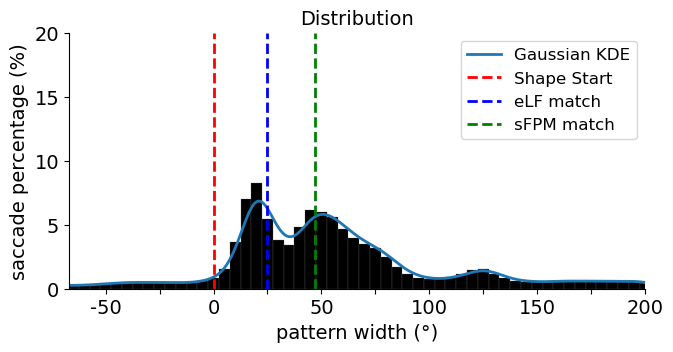

In [130]:
# Plotting
plot_distribution_image(dist_pooled, y_lim=0.2)
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.axvline(x=angle_elf+ROLL, color='blue', linestyle='--', label='eLF match')
plt.axvline(x=angle_sfpm+ROLL, color='green', linestyle='--', label='sFPM match')
plt.legend()

# Save the plot as an SVG file
#plt.savefig("../writeup_exports/pool/pool_3A3.svg", format="svg", bbox_inches='tight')

# show
plt.show()

# Train Path 3B1

In [131]:
train_path = np.load('../paths/train/path_3b1.npy')
train_image = train_path[0]
FPM = compute_fpm(train_image)
FPM

0.24198250728862974

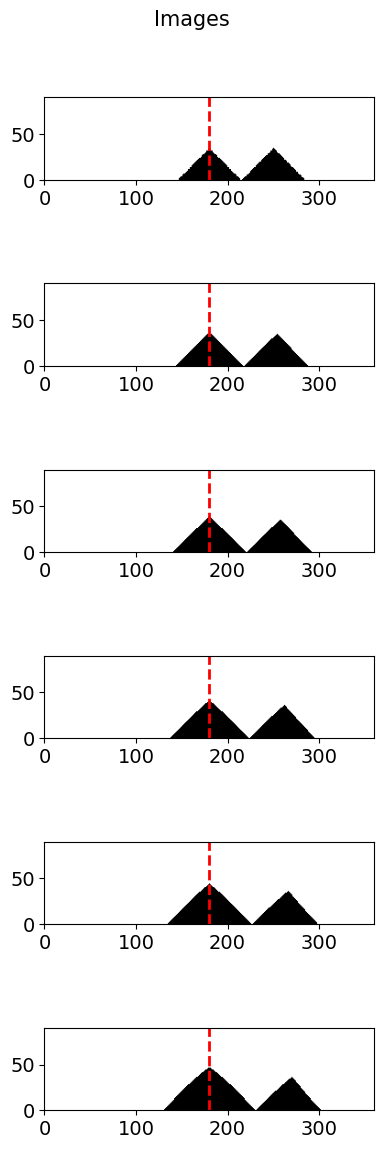

In [132]:
plot_images(train_path[::5])

In [133]:
# train all colonies on the train image
for name, colony in colony_dict.items():
    print (name)
    # transform to get down model features
    train_path_down = [overlap_downsample_transform(arr, overlap=name[1]) for arr in train_path]
    train_path_down[0].shape
    # train
    for model in colony:
        model.LeftMB.initialize_output_weights()
        model.RightMB.initialize_output_weights()
        model.train_network(train_path_down)

('DS_q=1', 0)
('DS_q=1', 8)
('DS_q=1', 16)
('DS_q=1', 24)
('DS_q=1', 32)
('DS_q=1', 40)
('DS_q=0.9', 0)
('DS_q=0.9', 8)
('DS_q=0.9', 16)
('DS_q=0.9', 24)
('DS_q=0.9', 32)
('DS_q=0.9', 40)
('DS_q=0.8', 0)
('DS_q=0.8', 8)
('DS_q=0.8', 16)
('DS_q=0.8', 24)
('DS_q=0.8', 32)
('DS_q=0.8', 40)
('DS_q=0.7', 0)
('DS_q=0.7', 8)
('DS_q=0.7', 16)
('DS_q=0.7', 24)
('DS_q=0.7', 32)
('DS_q=0.7', 40)
('DS_q=0.6', 0)
('DS_q=0.6', 8)
('DS_q=0.6', 16)
('DS_q=0.6', 24)
('DS_q=0.6', 32)
('DS_q=0.6', 40)


# Test Training Image

In [134]:
# load test image
test_rotations = get_shifted_rotations(train_image)
test_image = test_rotations[180]
x_fpm = x_from_fpm(image=test_image, fpm=FPM)
theoretical_angle =  x_fpm - 180

<Axes: title={'center': 'Test Image'}, xlabel='X-axis', ylabel='Y-axis'>

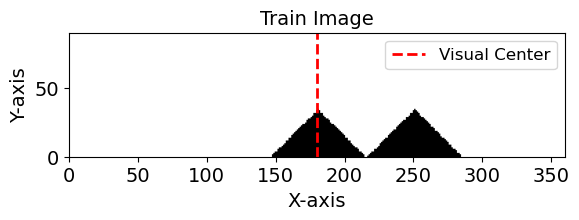

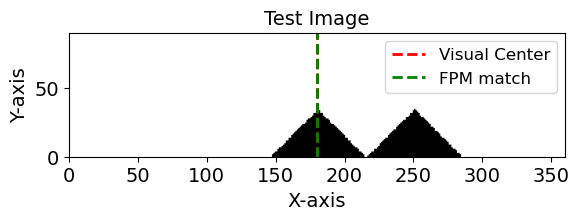

In [135]:
# Plot train and test with FPM match
plot_image(train_image, title='Train Image')
plot_image(test_image, fpm=x_fpm, title='Test Image')

In [136]:
# initialize results dictionnaries
left_dict = {}
right_dict = {}
sum_dict = {}
diff_dict = {}

In [137]:
# loop over colonies ()params
for name, colony in colony_dict.items():
    # print colony name
    print (name)

    # get test rotations
    test_rotations_transformed = [overlap_downsample_transform(arr, overlap=name[1]) for arr in test_rotations]
    rotation_tensor = [torch.tensor(a, dtype=torch.float) for a in test_rotations_transformed]
    rotation_tensor = torch.stack(rotation_tensor)

    # initialise arrays
    left_arr = np.zeros((colony_size, 360))
    right_arr = np.zeros((colony_size, 360))
    sum_arr = np.zeros((colony_size, 360))
    diff_arr = np.zeros((colony_size, 360))

    # run all models and get matrices
    for i in range(colony_size):
        model = colony_dict[name][i]
        l, r, s, d = model.forward(rotation_tensor)
        left_arr[i,:] = l.detach().numpy().flatten()
        right_arr[i,:] = r.detach().numpy().flatten()
        sum_arr[i,:] = s.detach().numpy().flatten()
        diff_arr[i,:] = d.detach().numpy().flatten()

    # set the dictionnary to the appropriate matrix
    left_dict[name] = left_arr
    right_dict[name] = right_arr
    sum_dict[name] = sum_arr
    diff_dict[name] = diff_arr

('DS_q=1', 0)
('DS_q=1', 8)
('DS_q=1', 16)
('DS_q=1', 24)
('DS_q=1', 32)
('DS_q=1', 40)
('DS_q=0.9', 0)
('DS_q=0.9', 8)
('DS_q=0.9', 16)
('DS_q=0.9', 24)
('DS_q=0.9', 32)
('DS_q=0.9', 40)
('DS_q=0.8', 0)
('DS_q=0.8', 8)
('DS_q=0.8', 16)
('DS_q=0.8', 24)
('DS_q=0.8', 32)
('DS_q=0.8', 40)
('DS_q=0.7', 0)
('DS_q=0.7', 8)
('DS_q=0.7', 16)
('DS_q=0.7', 24)
('DS_q=0.7', 32)
('DS_q=0.7', 40)
('DS_q=0.6', 0)
('DS_q=0.6', 8)
('DS_q=0.6', 16)
('DS_q=0.6', 24)
('DS_q=0.6', 32)
('DS_q=0.6', 40)


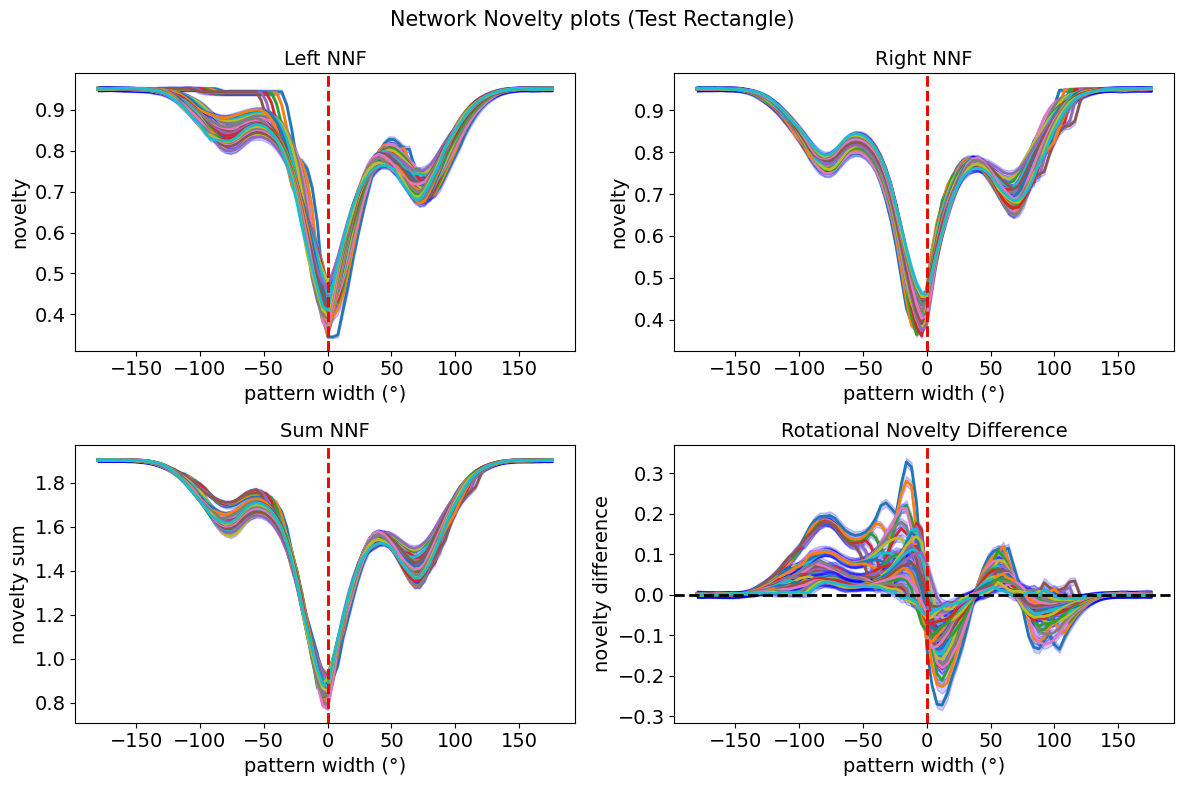

In [138]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Title
plt.suptitle('Network Novelty plots (Test Rectangle)')

# Plot on each subplot
for i, ax in enumerate(axs.flat):
    # angles
    angles = range(-180, 180, 1)

    # Plot the mean curves
    for name in colony_dict:
        mean_curve = np.mean(signals[i][name], axis=0)
        std_curve = np.std(signals[i][name], axis=0)
        # Plot the mean curve
        ax.plot(angles[::4], (mean_curve)[::4], label=name)
        # Plot the standard deviation as a shaded region
        ax.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
    # labelling
    ax.set_ylabel(ylabels[i])
    ax.set_xlabel('pattern width (°)')
    ax.set_title(titles[i])
    ax.axvline(x=theoretical_angle, color='green', linestyle='--', label='FPM match')
    ax.axvline(x=0, color='red', linestyle='--', label='Visual Center')
    if i == 3:
        ax.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
        # no legend

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

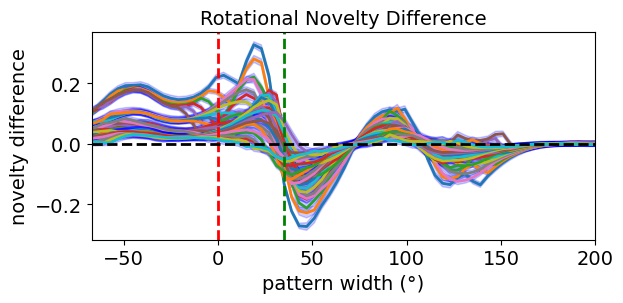

In [139]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig= plt.figure(figsize=(6.4, 6.4/2))

# Roll value
ROLL = 35
i = 3

# angles
angles = np.array(range(-180, 180, 1))+ROLL

# Plot the mean curves
for name in colony_dict:
    mean_curve = np.mean(signals[i][name], axis=0)
    std_curve = np.std(signals[i][name], axis=0)
    # Plot the mean curve
    plt.plot(angles[::4], (mean_curve)[::4], label=name)
    # Plot the standard deviation as a shaded region
    plt.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
# Labelling
plt.ylabel(ylabels[i])
plt.xlabel('pattern width (°)')
plt.title(titles[i])
plt.axvline(x=theoretical_angle+ROLL, color='green', linestyle='--', label='FPM match')
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.xlim(-67, 200)  # Restrict x-axis to -90 to 90
plt.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
# plt.legend(loc='upper right')  # Add legend to each subplot
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [140]:
# initialize pooling
roll = ROLL
n_saccades = 100
TEST_NUM = 9
TEST_NAME = "MODE_3B1"

for it in range(n_iter):
    dist_pooled = []
    # parameters
    for name in colony_dict:
        print (name) # loop over colony
        dist_name = []
        for i in range(colony_size):
            # parameters
            novelty_diff = diff_dict[name][i]
            novelty_sum = sum_dict[name][i]
            
            # get weighed distribution
            dist_sum = get_weighed_distribution(novelty_diff, novelty_sum, n_saccades, roll)
            dist_name += list(dist_sum)
            dist_pooled += list(dist_sum)

        # performance
        predicted_modes = kde_predictions(dist_name)
        true_mode = mode_location_dict[TEST_NAME]
        perf = get_performance(predicted_modes, true_mode)
        performance_tensor[it, TEST_NUM, crossover_index[name[0]], overlap_index[name[1]]] = perf
        print (perf)

    # pool performance
    predicted_modes = kde_predictions(dist_pooled)
    true_mode = mode_location_dict[TEST_NAME]
    perf = get_performance(predicted_modes, true_mode)
    performance_vector[it, TEST_NUM] = perf
    print (perf)

('DS_q=1', 0)
2.299999999999997
('DS_q=1', 8)
3.299999999999997
('DS_q=1', 16)
1.2999999999999972
('DS_q=1', 24)
0.7000000000000028
('DS_q=1', 32)
0.7000000000000028
('DS_q=1', 40)
0.7000000000000028
('DS_q=0.9', 0)
3.299999999999997
('DS_q=0.9', 8)
1.2999999999999972
('DS_q=0.9', 16)
0.29999999999999716
('DS_q=0.9', 24)
0.29999999999999716
('DS_q=0.9', 32)
0.29999999999999716
('DS_q=0.9', 40)
1.2999999999999972
('DS_q=0.8', 0)
0.7000000000000028
('DS_q=0.8', 8)
0.7000000000000028
('DS_q=0.8', 16)
1.2999999999999972
('DS_q=0.8', 24)
2.299999999999997
('DS_q=0.8', 32)
4.299999999999997
('DS_q=0.8', 40)
5.299999999999997
('DS_q=0.7', 0)
4.700000000000003
('DS_q=0.7', 8)
1.7000000000000028
('DS_q=0.7', 16)
2.299999999999997
('DS_q=0.7', 24)
6.299999999999997
('DS_q=0.7', 32)
9.299999999999997
('DS_q=0.7', 40)
11.299999999999997
('DS_q=0.6', 0)
6.700000000000003
('DS_q=0.6', 8)
2.700000000000003
('DS_q=0.6', 16)
5.299999999999997
('DS_q=0.6', 24)
11.299999999999997
('DS_q=0.6', 32)
12.2999

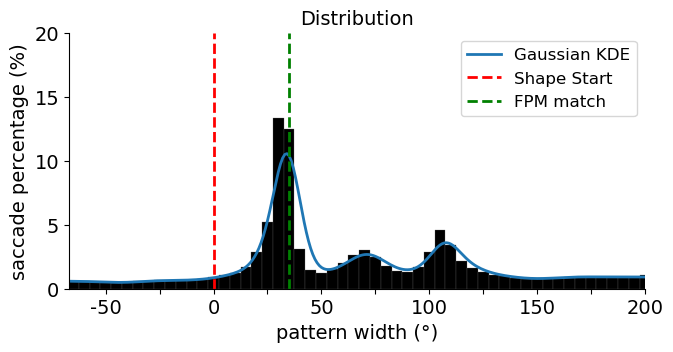

In [141]:
# Plotting
plot_distribution_image(dist_pooled, y_lim=0.2)
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.axvline(x=theoretical_angle+roll, color='green', linestyle='--', label='FPM match')
plt.legend()

# Save the plot as an SVG file
#plt.savefig("../writeup_exports/pool/pool_3B1.svg", format="svg", bbox_inches='tight')

# show
plt.show()

# Test Image 3B2

In [142]:
# load test image
test_rotations = np.load('../paths/test/image_3b2_rotations.npy')
test_image = test_rotations[180]
x_fpm = x_from_fpm(image=test_image, fpm=FPM)
theoretical_angle =  x_fpm - 180

In [143]:
sfpm = x_from_fpm(test_image,2*FPM)
wfpm = x_from_fpm(test_image,FPM)
angle_sfpm = sfpm - 180
angle_wfpm = wfpm - 180

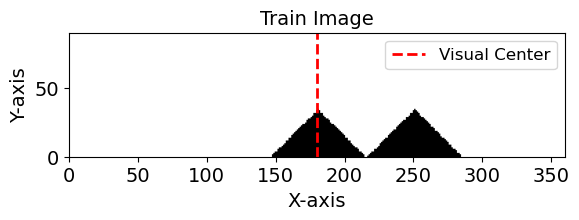

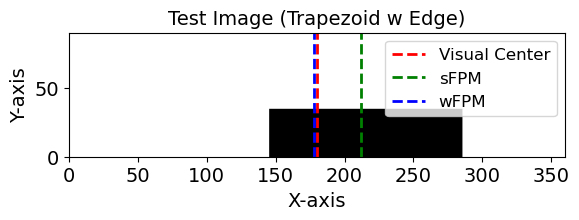

In [144]:
# Plot train and test with FPM match
plot_image(train_image, title='Train Image')
plot_image_s(test_image, sfpm=sfpm, wfpm=wfpm, title='Test Image (Trapezoid w Edge)')

In [145]:
# initialize results dictionnaries
left_dict = {}
right_dict = {}
sum_dict = {}
diff_dict = {}

In [146]:
# loop over colonies ()params
for name, colony in colony_dict.items():
    # print colony name
    print (name)

    # get test rotations
    test_rotations_transformed = [overlap_downsample_transform(arr, overlap=name[1]) for arr in test_rotations]
    rotation_tensor = [torch.tensor(a, dtype=torch.float) for a in test_rotations_transformed]
    rotation_tensor = torch.stack(rotation_tensor)

    # initialise arrays
    left_arr = np.zeros((colony_size, 360))
    right_arr = np.zeros((colony_size, 360))
    sum_arr = np.zeros((colony_size, 360))
    diff_arr = np.zeros((colony_size, 360))

    # run all models and get matrices
    for i in range(colony_size):
        model = colony_dict[name][i]
        l, r, s, d = model.forward(rotation_tensor)
        left_arr[i,:] = l.detach().numpy().flatten()
        right_arr[i,:] = r.detach().numpy().flatten()
        sum_arr[i,:] = s.detach().numpy().flatten()
        diff_arr[i,:] = d.detach().numpy().flatten()

    # set the dictionnary to the appropriate matrix
    left_dict[name] = left_arr
    right_dict[name] = right_arr
    sum_dict[name] = sum_arr
    diff_dict[name] = diff_arr

('DS_q=1', 0)
('DS_q=1', 8)
('DS_q=1', 16)
('DS_q=1', 24)
('DS_q=1', 32)
('DS_q=1', 40)
('DS_q=0.9', 0)
('DS_q=0.9', 8)
('DS_q=0.9', 16)
('DS_q=0.9', 24)
('DS_q=0.9', 32)
('DS_q=0.9', 40)
('DS_q=0.8', 0)
('DS_q=0.8', 8)
('DS_q=0.8', 16)
('DS_q=0.8', 24)
('DS_q=0.8', 32)
('DS_q=0.8', 40)
('DS_q=0.7', 0)
('DS_q=0.7', 8)
('DS_q=0.7', 16)
('DS_q=0.7', 24)
('DS_q=0.7', 32)
('DS_q=0.7', 40)
('DS_q=0.6', 0)
('DS_q=0.6', 8)
('DS_q=0.6', 16)
('DS_q=0.6', 24)
('DS_q=0.6', 32)
('DS_q=0.6', 40)


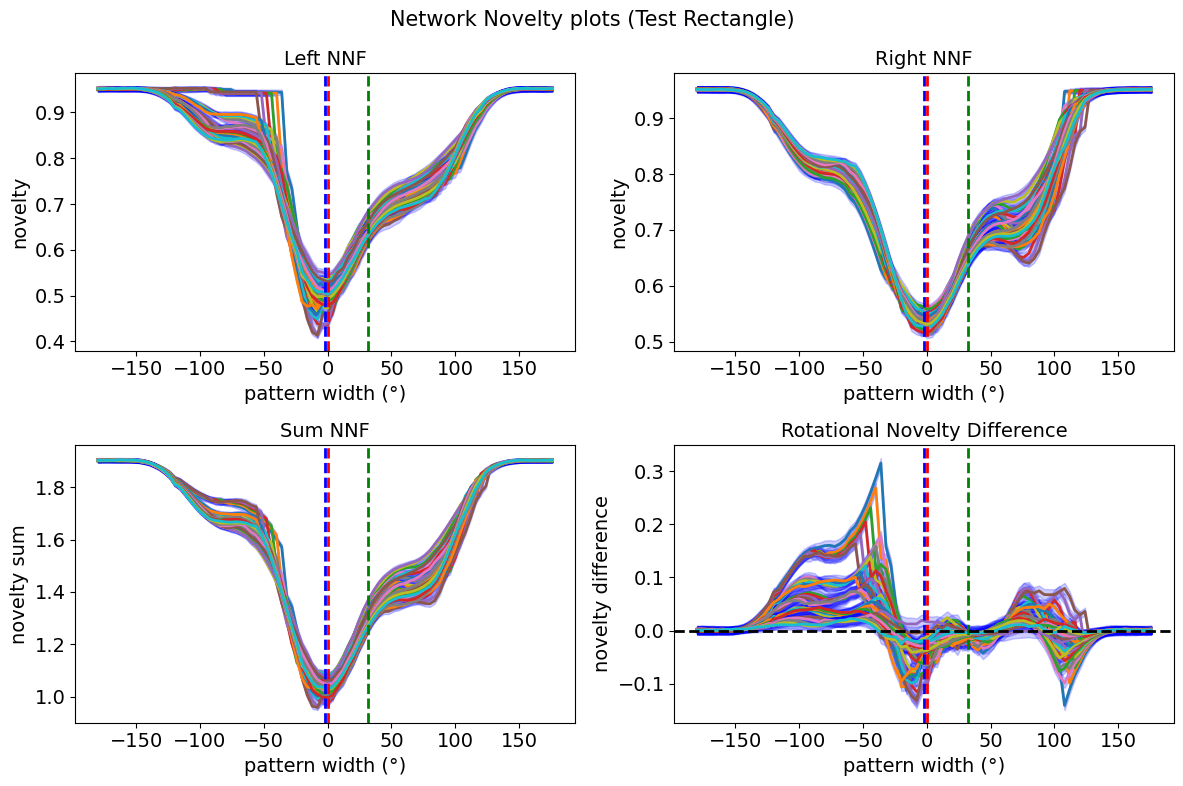

In [147]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Title
plt.suptitle('Network Novelty plots (Test Rectangle)')

# Plot on each subplot
for i, ax in enumerate(axs.flat):
    # angles
    angles = range(-180, 180, 1)

    # Plot the mean curves
    for name in colony_dict:
        mean_curve = np.mean(signals[i][name], axis=0)
        std_curve = np.std(signals[i][name], axis=0)
        # Plot the mean curve
        ax.plot(angles[::4], (mean_curve)[::4], label=name)
        # Plot the standard deviation as a shaded region
        ax.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
    # labelling
    ax.set_ylabel(ylabels[i])
    ax.set_xlabel('pattern width (°)')
    ax.set_title(titles[i])
    ax.axvline(x=angle_sfpm, color='green', linestyle='--', label='sFPM match')
    ax.axvline(x=angle_wfpm, color='blue', linestyle='--', label='wFPM match')
    ax.axvline(x=0, color='red', linestyle='--', label='Visual Center')
    if i == 3:
        ax.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
        # no legend

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

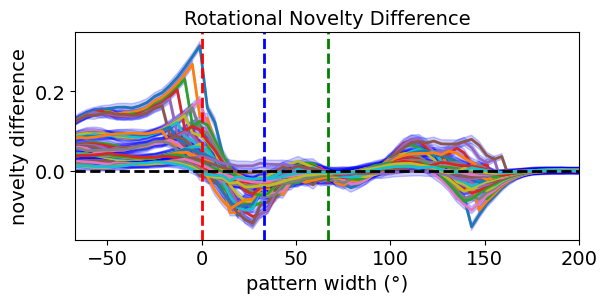

In [148]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig= plt.figure(figsize=(6.4, 6.4/2))

# Roll value
ROLL = 35
i = 3

# angles
angles = np.array(range(-180, 180, 1))+ROLL

# Plot the mean curves
for name in colony_dict:
    mean_curve = np.mean(signals[i][name], axis=0)
    std_curve = np.std(signals[i][name], axis=0)
    # Plot the mean curve
    plt.plot(angles[::4], (mean_curve)[::4], label=name)
    # Plot the standard deviation as a shaded region
    plt.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
# Labelling
plt.ylabel(ylabels[i])
plt.xlabel('pattern width (°)')
plt.title(titles[i])
plt.axvline(x=angle_wfpm+ROLL, color='blue', linestyle='--', label='wFPM match')
plt.axvline(x=angle_sfpm+ROLL, color='green', linestyle='--', label='sFPM match')
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.xlim(-67, 200)  # Restrict x-axis to -90 to 90
plt.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
# plt.legend(loc='upper right')  # Add legend to each subplot
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [149]:
# initialize pooling
roll = ROLL
n_saccades = 100
TEST_NUM = 10
TEST_NAME = "MODE_3B2"

for it in range(n_iter):
    dist_pooled = []
    # parameters
    for name in colony_dict:
        print (name) # loop over colony
        dist_name = []
        for i in range(colony_size):
            # parameters
            novelty_diff = diff_dict[name][i]
            novelty_sum = sum_dict[name][i]
            
            # get weighed distribution
            dist_sum = get_weighed_distribution(novelty_diff, novelty_sum, n_saccades, roll)
            dist_name += list(dist_sum)
            dist_pooled += list(dist_sum)

        # performance
        predicted_modes = kde_predictions(dist_name)
        true_mode = mode_location_dict[TEST_NAME]
        perf = get_performance(predicted_modes, true_mode)
        performance_tensor[it, TEST_NUM, crossover_index[name[0]], overlap_index[name[1]]] = perf
        print (perf)

    # pool performance
    predicted_modes = kde_predictions(dist_pooled)
    true_mode = mode_location_dict[TEST_NAME]
    perf = get_performance(predicted_modes, true_mode)
    performance_vector[it, TEST_NUM] = perf
    print (perf)

('DS_q=1', 0)
15.5
('DS_q=1', 8)
16.5
('DS_q=1', 16)
10.5
('DS_q=1', 24)
29.5
('DS_q=1', 32)
27.5
('DS_q=1', 40)
12.5
('DS_q=0.9', 0)
15.5
('DS_q=0.9', 8)
26.5
('DS_q=0.9', 16)
13.5
('DS_q=0.9', 24)
1.5
('DS_q=0.9', 32)
5.5
('DS_q=0.9', 40)
12.5
('DS_q=0.8', 0)
18.5
('DS_q=0.8', 8)
30.5
('DS_q=0.8', 16)
31.5
('DS_q=0.8', 24)
2.5
('DS_q=0.8', 32)
42.5
('DS_q=0.8', 40)
20.5
('DS_q=0.7', 0)
19.5
('DS_q=0.7', 8)
33.5
('DS_q=0.7', 16)
32.5
('DS_q=0.7', 24)
3.5
('DS_q=0.7', 32)
15.5
('DS_q=0.7', 40)
24.5
('DS_q=0.6', 0)
47.5
('DS_q=0.6', 8)
41.5
('DS_q=0.6', 16)
27.5
('DS_q=0.6', 24)
15.5
('DS_q=0.6', 32)
20.5
('DS_q=0.6', 40)
28.5
29.5
('DS_q=1', 0)
17.5
('DS_q=1', 8)
15.5
('DS_q=1', 16)
18.5
('DS_q=1', 24)
28.5
('DS_q=1', 32)
28.5
('DS_q=1', 40)
12.5
('DS_q=0.9', 0)
14.5
('DS_q=0.9', 8)
26.5
('DS_q=0.9', 16)
27.5
('DS_q=0.9', 24)
30.5
('DS_q=0.9', 32)
32.5
('DS_q=0.9', 40)
12.5
('DS_q=0.8', 0)
17.5
('DS_q=0.8', 8)
30.5
('DS_q=0.8', 16)
31.5
('DS_q=0.8', 24)
1.5
('DS_q=0.8', 32)
40.5
('DS_q

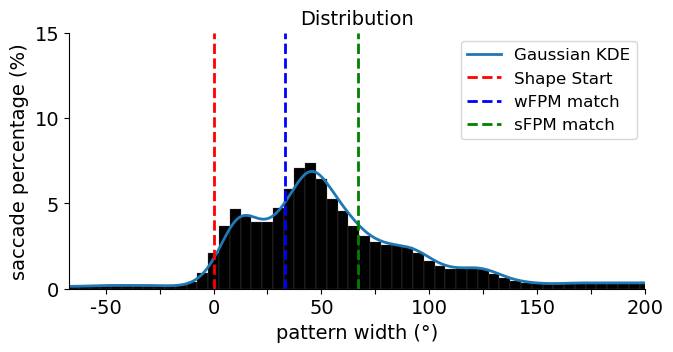

In [150]:
# Plotting
plot_distribution_image(dist_pooled, y_lim=0.15)
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.axvline(x=angle_wfpm+ROLL, color='blue', linestyle='--', label='wFPM match')
plt.axvline(x=angle_sfpm+ROLL, color='green', linestyle='--', label='sFPM match')
plt.legend()

# Save the plot as an SVG file
#plt.savefig("../writeup_exports/pool/pool_3B2.svg", format="svg", bbox_inches='tight')

# show
plt.show()

# Test Image 3B3

In [151]:
# load test image
test_rotations = np.load('../paths/test/image_3b3_rotations.npy')
test_image = test_rotations[180]
x_fpm = x_from_fpm(image=test_image, fpm=FPM)
theoretical_angle =  x_fpm - 180

In [152]:
sfpm = x_from_fpm(test_image,2*FPM)
wfpm = x_from_fpm(test_image,FPM)
angle_sfpm = sfpm - 180
elf = 180
angle_elf = 0

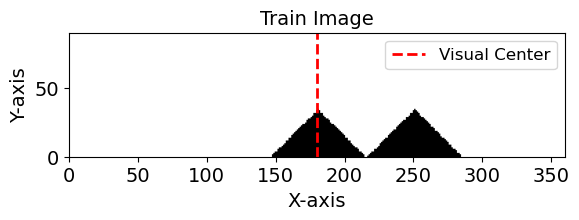

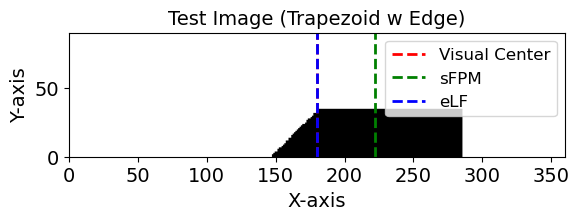

In [153]:
# Plot train and test with FPM match
plot_image(train_image, title='Train Image')
plot_image_s(test_image, sfpm=sfpm, elf=elf, title='Test Image (Trapezoid w Edge)')

In [154]:
# initialize results dictionnaries
left_dict = {}
right_dict = {}
sum_dict = {}
diff_dict = {}

In [155]:
# loop over colonies ()params
for name, colony in colony_dict.items():
    # print colony name
    print (name)

    # get test rotations
    test_rotations_transformed = [overlap_downsample_transform(arr, overlap=name[1]) for arr in test_rotations]
    rotation_tensor = [torch.tensor(a, dtype=torch.float) for a in test_rotations_transformed]
    rotation_tensor = torch.stack(rotation_tensor)

    # initialise arrays
    left_arr = np.zeros((colony_size, 360))
    right_arr = np.zeros((colony_size, 360))
    sum_arr = np.zeros((colony_size, 360))
    diff_arr = np.zeros((colony_size, 360))

    # run all models and get matrices
    for i in range(colony_size):
        model = colony_dict[name][i]
        l, r, s, d = model.forward(rotation_tensor)
        left_arr[i,:] = l.detach().numpy().flatten()
        right_arr[i,:] = r.detach().numpy().flatten()
        sum_arr[i,:] = s.detach().numpy().flatten()
        diff_arr[i,:] = d.detach().numpy().flatten()

    # set the dictionnary to the appropriate matrix
    left_dict[name] = left_arr
    right_dict[name] = right_arr
    sum_dict[name] = sum_arr
    diff_dict[name] = diff_arr

('DS_q=1', 0)
('DS_q=1', 8)
('DS_q=1', 16)
('DS_q=1', 24)
('DS_q=1', 32)
('DS_q=1', 40)
('DS_q=0.9', 0)
('DS_q=0.9', 8)
('DS_q=0.9', 16)
('DS_q=0.9', 24)
('DS_q=0.9', 32)
('DS_q=0.9', 40)
('DS_q=0.8', 0)
('DS_q=0.8', 8)
('DS_q=0.8', 16)
('DS_q=0.8', 24)
('DS_q=0.8', 32)
('DS_q=0.8', 40)
('DS_q=0.7', 0)
('DS_q=0.7', 8)
('DS_q=0.7', 16)
('DS_q=0.7', 24)
('DS_q=0.7', 32)
('DS_q=0.7', 40)
('DS_q=0.6', 0)
('DS_q=0.6', 8)
('DS_q=0.6', 16)
('DS_q=0.6', 24)
('DS_q=0.6', 32)
('DS_q=0.6', 40)


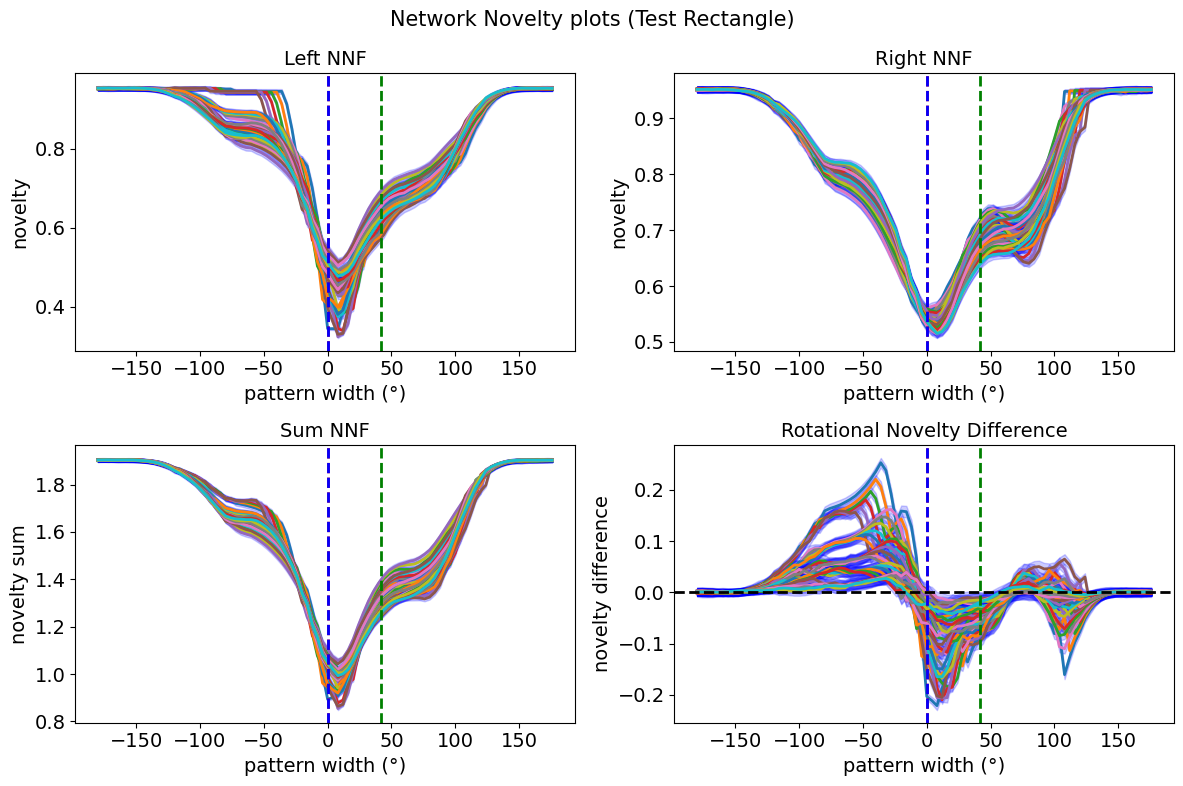

In [156]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Title
plt.suptitle('Network Novelty plots (Test Rectangle)')

# Plot on each subplot
for i, ax in enumerate(axs.flat):
    # angles
    angles = range(-180, 180, 1)

    # Plot the mean curves
    for name in colony_dict:
        mean_curve = np.mean(signals[i][name], axis=0)
        std_curve = np.std(signals[i][name], axis=0)
        # Plot the mean curve
        ax.plot(angles[::4], (mean_curve)[::4], label=name)
        # Plot the standard deviation as a shaded region
        ax.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
    # labelling
    ax.set_ylabel(ylabels[i])
    ax.set_xlabel('pattern width (°)')
    ax.set_title(titles[i])
    ax.axvline(x=angle_sfpm, color='green', linestyle='--', label='sFPM match')
    ax.axvline(x=0, color='red', linestyle='--', label='Visual Center')
    ax.axvline(x=angle_elf, color='blue', linestyle='--', label='eLF match')
    if i == 3:
        ax.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
        # no legend

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

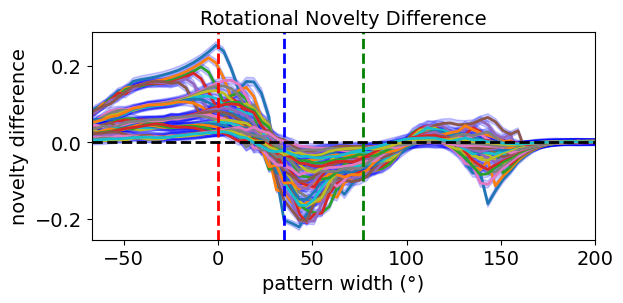

In [157]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig= plt.figure(figsize=(6.4, 6.4/2))

# Roll value
ROLL = 35
i = 3

# angles
angles = np.array(range(-180, 180, 1))+ROLL

# Plot the mean curves
for name in colony_dict:
    mean_curve = np.mean(signals[i][name], axis=0)
    std_curve = np.std(signals[i][name], axis=0)
    # Plot the mean curve
    plt.plot(angles[::4], (mean_curve)[::4], label=name)
    # Plot the standard deviation as a shaded region
    plt.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
# Labelling
plt.ylabel(ylabels[i])
plt.xlabel('pattern width (°)')
plt.title(titles[i])
plt.axvline(x=angle_elf+ROLL, color='blue', linestyle='--', label='eLF match')
plt.axvline(x=angle_sfpm+ROLL, color='green', linestyle='--', label='sFPM match')
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.xlim(-67, 200)  # Restrict x-axis to -90 to 90
plt.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
# plt.legend(loc='upper right')  # Add legend to each subplot
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [158]:
# initialize pooling
roll = ROLL
n_saccades = 100
TEST_NUM = 11
TEST_NAME = "MODE_3B3"

for it in range(n_iter):
    dist_pooled = []
    # parameters
    for name in colony_dict:
        print (name) # loop over colony
        dist_name = []
        for i in range(colony_size):
            # parameters
            novelty_diff = diff_dict[name][i]
            novelty_sum = sum_dict[name][i]
            
            # get weighed distribution
            dist_sum = get_weighed_distribution(novelty_diff, novelty_sum, n_saccades, roll)
            dist_name += list(dist_sum)
            dist_pooled += list(dist_sum)

        # performance
        predicted_modes = kde_predictions(dist_name)
        true_mode = mode_location_dict[TEST_NAME]
        perf = get_performance(predicted_modes, true_mode)
        performance_tensor[it, TEST_NUM, crossover_index[name[0]], overlap_index[name[1]]] = perf
        print (perf)

    # pool performance
    predicted_modes = kde_predictions(dist_pooled)
    true_mode = mode_location_dict[TEST_NAME]
    perf = get_performance(predicted_modes, true_mode)
    performance_vector[it, TEST_NUM] = perf
    print (perf)

('DS_q=1', 0)
4.799999999999997
('DS_q=1', 8)
6.799999999999997
('DS_q=1', 16)
6.799999999999997
('DS_q=1', 24)
8.799999999999997
('DS_q=1', 32)
9.799999999999997
('DS_q=1', 40)
11.799999999999997
('DS_q=0.9', 0)
4.799999999999997
('DS_q=0.9', 8)
2.799999999999997
('DS_q=0.9', 16)
3.799999999999997
('DS_q=0.9', 24)
6.799999999999997
('DS_q=0.9', 32)
7.799999999999997
('DS_q=0.9', 40)
10.799999999999997
('DS_q=0.8', 0)
2.799999999999997
('DS_q=0.8', 8)
4.799999999999997
('DS_q=0.8', 16)
7.799999999999997
('DS_q=0.8', 24)
9.799999999999997
('DS_q=0.8', 32)
12.799999999999997
('DS_q=0.8', 40)
10.799999999999997
('DS_q=0.7', 0)
1.7999999999999972
('DS_q=0.7', 8)
5.799999999999997
('DS_q=0.7', 16)
6.799999999999997
('DS_q=0.7', 24)
8.799999999999997
('DS_q=0.7', 32)
7.799999999999997
('DS_q=0.7', 40)
7.799999999999997
('DS_q=0.6', 0)
0.20000000000000284
('DS_q=0.6', 8)
3.200000000000003
('DS_q=0.6', 16)
6.200000000000003
('DS_q=0.6', 24)
1.7999999999999972
('DS_q=0.6', 32)
7.799999999999997

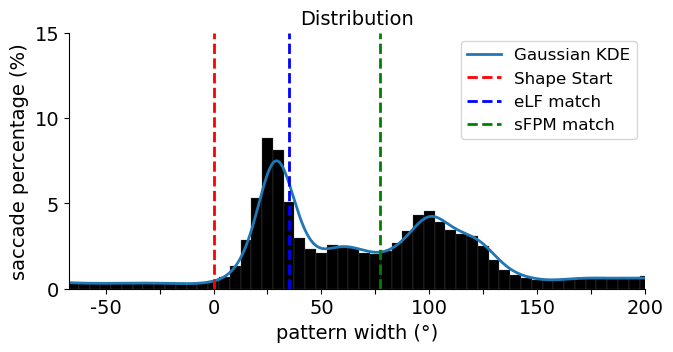

In [159]:
# Plotting
plot_distribution_image(dist_pooled, y_lim=0.15)
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.axvline(x=angle_elf+ROLL, color='blue', linestyle='--', label='eLF match')
plt.axvline(x=angle_sfpm+ROLL, color='green', linestyle='--', label='sFPM match')
plt.legend()

# Save the plot as an SVG file
#plt.savefig("../writeup_exports/pool/pool_3B3.svg", format="svg", bbox_inches='tight')

# show
plt.show()

# Train Path 3C1

In [160]:
train_path = np.load('../paths/train/path_3c1.npy')
train_image = train_path[0]
FPM = compute_fpm(train_image)
FPM

0.4523115368596418

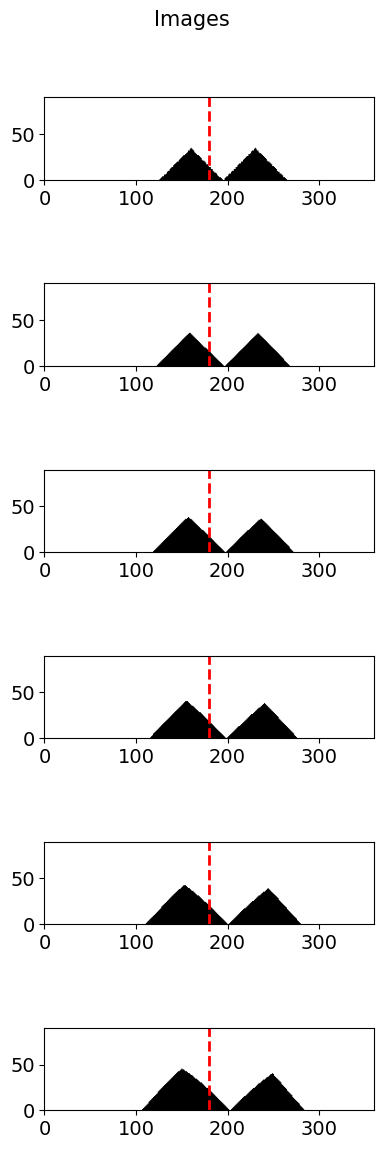

In [161]:
plot_images(train_path[::5])

In [162]:
# train all colonies on the train image
for name, colony in colony_dict.items():
    print (name)
    # transform to get down model features
    train_path_down = [overlap_downsample_transform(arr, overlap=name[1]) for arr in train_path]
    # train
    for model in colony:
        model.LeftMB.initialize_output_weights()
        model.RightMB.initialize_output_weights()
        model.train_network(train_path_down)

('DS_q=1', 0)
('DS_q=1', 8)
('DS_q=1', 16)
('DS_q=1', 24)
('DS_q=1', 32)
('DS_q=1', 40)
('DS_q=0.9', 0)
('DS_q=0.9', 8)
('DS_q=0.9', 16)
('DS_q=0.9', 24)
('DS_q=0.9', 32)
('DS_q=0.9', 40)
('DS_q=0.8', 0)
('DS_q=0.8', 8)
('DS_q=0.8', 16)
('DS_q=0.8', 24)
('DS_q=0.8', 32)
('DS_q=0.8', 40)
('DS_q=0.7', 0)
('DS_q=0.7', 8)
('DS_q=0.7', 16)
('DS_q=0.7', 24)
('DS_q=0.7', 32)
('DS_q=0.7', 40)
('DS_q=0.6', 0)
('DS_q=0.6', 8)
('DS_q=0.6', 16)
('DS_q=0.6', 24)
('DS_q=0.6', 32)
('DS_q=0.6', 40)


# Test Training Image

In [163]:
# load test image
test_rotations = get_shifted_rotations(train_image)
test_image = test_rotations[180]
x_fpm = x_from_fpm(image=test_image, fpm=FPM)
theoretical_angle =  x_fpm - 180

<Axes: title={'center': 'Test Image'}, xlabel='X-axis', ylabel='Y-axis'>

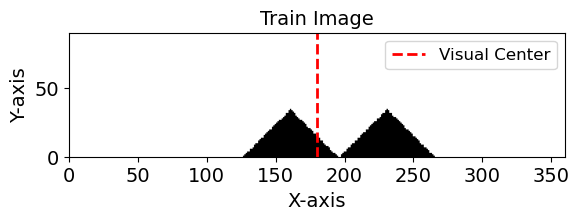

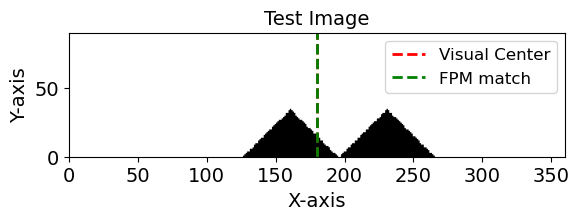

In [164]:
# Plot train and test with FPM match
plot_image(train_image, title='Train Image')
plot_image(test_image, fpm=x_fpm, title='Test Image')

In [165]:
# initialize results dictionnaries
left_dict = {}
right_dict = {}
sum_dict = {}
diff_dict = {}

In [166]:
# loop over colonies ()params
for name, colony in colony_dict.items():
    # print colony name
    print (name)

    # get test rotations
    test_rotations_transformed = [overlap_downsample_transform(arr, overlap=name[1]) for arr in test_rotations]
    rotation_tensor = [torch.tensor(a, dtype=torch.float) for a in test_rotations_transformed]
    rotation_tensor = torch.stack(rotation_tensor)

    # initialise arrays
    left_arr = np.zeros((colony_size, 360))
    right_arr = np.zeros((colony_size, 360))
    sum_arr = np.zeros((colony_size, 360))
    diff_arr = np.zeros((colony_size, 360))

    # run all models and get matrices
    for i in range(colony_size):
        model = colony_dict[name][i]
        l, r, s, d = model.forward(rotation_tensor)
        left_arr[i,:] = l.detach().numpy().flatten()
        right_arr[i,:] = r.detach().numpy().flatten()
        sum_arr[i,:] = s.detach().numpy().flatten()
        diff_arr[i,:] = d.detach().numpy().flatten()

    # set the dictionnary to the appropriate matrix
    left_dict[name] = left_arr
    right_dict[name] = right_arr
    sum_dict[name] = sum_arr
    diff_dict[name] = diff_arr

('DS_q=1', 0)
('DS_q=1', 8)
('DS_q=1', 16)
('DS_q=1', 24)
('DS_q=1', 32)
('DS_q=1', 40)
('DS_q=0.9', 0)
('DS_q=0.9', 8)
('DS_q=0.9', 16)
('DS_q=0.9', 24)
('DS_q=0.9', 32)
('DS_q=0.9', 40)
('DS_q=0.8', 0)
('DS_q=0.8', 8)
('DS_q=0.8', 16)
('DS_q=0.8', 24)
('DS_q=0.8', 32)
('DS_q=0.8', 40)
('DS_q=0.7', 0)
('DS_q=0.7', 8)
('DS_q=0.7', 16)
('DS_q=0.7', 24)
('DS_q=0.7', 32)
('DS_q=0.7', 40)
('DS_q=0.6', 0)
('DS_q=0.6', 8)
('DS_q=0.6', 16)
('DS_q=0.6', 24)
('DS_q=0.6', 32)
('DS_q=0.6', 40)


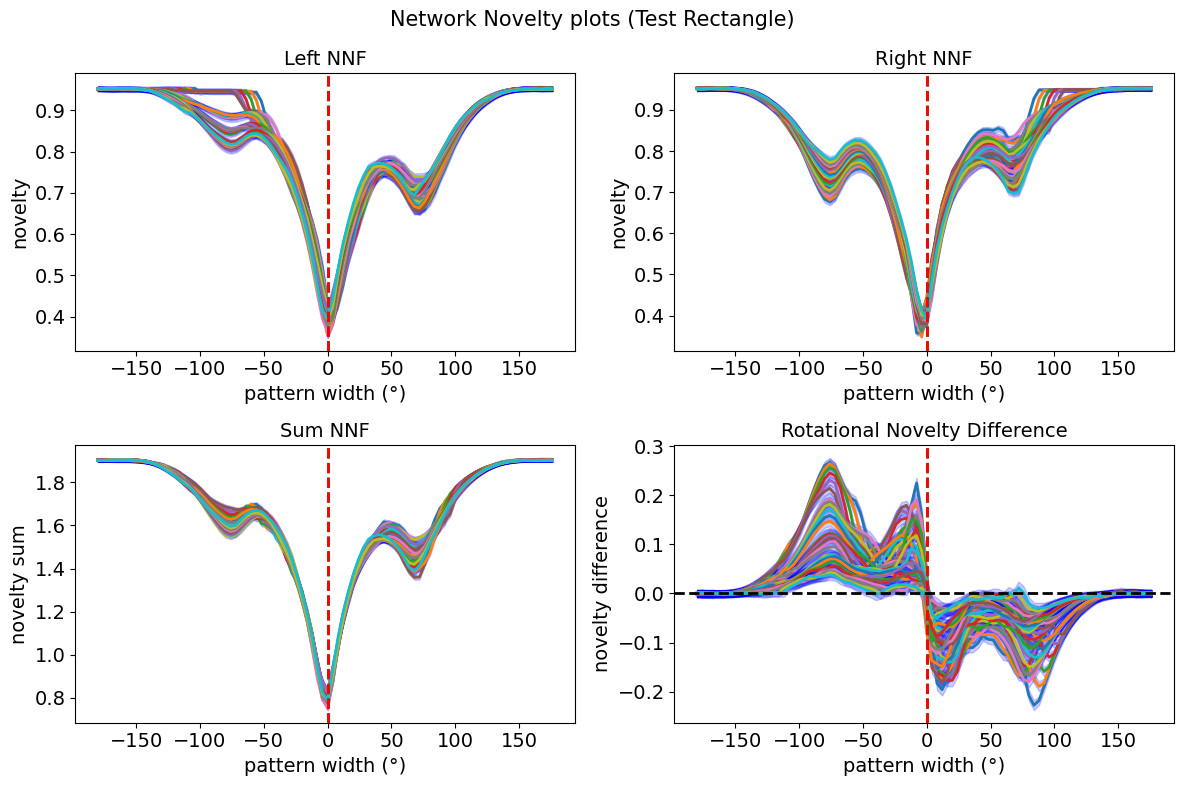

In [167]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Title
plt.suptitle('Network Novelty plots (Test Rectangle)')

# Plot on each subplot
for i, ax in enumerate(axs.flat):
    # angles
    angles = range(-180, 180, 1)

    # Plot the mean curves
    for name in colony_dict:
        mean_curve = np.mean(signals[i][name], axis=0)
        std_curve = np.std(signals[i][name], axis=0)
        # Plot the mean curve
        ax.plot(angles[::4], (mean_curve)[::4], label=name)
        # Plot the standard deviation as a shaded region
        ax.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
    # labelling
    ax.set_ylabel(ylabels[i])
    ax.set_xlabel('pattern width (°)')
    ax.set_title(titles[i])
    ax.axvline(x=theoretical_angle, color='green', linestyle='--', label='FPM match')
    ax.axvline(x=0, color='red', linestyle='--', label='Visual Center')
    if i == 3:
        ax.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
        # no legend

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

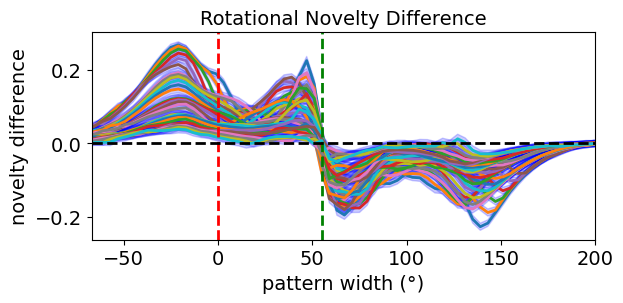

In [168]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig= plt.figure(figsize=(6.4, 6.4/2))

# Roll value
ROLL = 55
i = 3

# angles
angles = np.array(range(-180, 180, 1))+ROLL

# Plot the mean curves
for name in colony_dict:
    mean_curve = np.mean(signals[i][name], axis=0)
    std_curve = np.std(signals[i][name], axis=0)
    # Plot the mean curve
    plt.plot(angles[::4], (mean_curve)[::4], label=name)
    # Plot the standard deviation as a shaded region
    plt.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
# Labelling
plt.ylabel(ylabels[i])
plt.xlabel('pattern width (°)')
plt.title(titles[i])
plt.axvline(x=theoretical_angle+ROLL, color='green', linestyle='--', label='FPM match')
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.xlim(-67, 200)  # Restrict x-axis to -90 to 90
plt.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
# plt.legend(loc='upper right')  # Add legend to each subplot
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [169]:
# initialize pooling
roll = ROLL
n_saccades = 100
TEST_NUM = 12
TEST_NAME = "MODE_3C1"

for it in range(n_iter):
    dist_pooled = []
    # parameters
    for name in colony_dict:
        print (name) # loop over colony
        dist_name = []
        for i in range(colony_size):
            # parameters
            novelty_diff = diff_dict[name][i]
            novelty_sum = sum_dict[name][i]
            
            # get weighed distribution
            dist_sum = get_weighed_distribution(novelty_diff, novelty_sum, n_saccades, roll)
            dist_name += list(dist_sum)
            dist_pooled += list(dist_sum)

        # performance
        predicted_modes = kde_predictions(dist_name)
        true_mode = mode_location_dict[TEST_NAME]
        perf = get_performance(predicted_modes, true_mode)
        performance_tensor[it, TEST_NUM, crossover_index[name[0]], overlap_index[name[1]]] = perf
        print (perf)

    # pool performance
    predicted_modes = kde_predictions(dist_pooled)
    true_mode = mode_location_dict[TEST_NAME]
    perf = get_performance(predicted_modes, true_mode)
    performance_vector[it, TEST_NUM] = perf
    print (perf)

('DS_q=1', 0)
0.6000000000000014
('DS_q=1', 8)
0.6000000000000014
('DS_q=1', 16)
0.3999999999999986
('DS_q=1', 24)
0.3999999999999986
('DS_q=1', 32)
1.3999999999999986
('DS_q=1', 40)
1.3999999999999986
('DS_q=0.9', 0)
0.6000000000000014
('DS_q=0.9', 8)
0.6000000000000014
('DS_q=0.9', 16)
0.3999999999999986
('DS_q=0.9', 24)
1.3999999999999986
('DS_q=0.9', 32)
2.3999999999999986
('DS_q=0.9', 40)
3.3999999999999986
('DS_q=0.8', 0)
0.6000000000000014
('DS_q=0.8', 8)
0.6000000000000014
('DS_q=0.8', 16)
0.3999999999999986
('DS_q=0.8', 24)
1.3999999999999986
('DS_q=0.8', 32)
3.3999999999999986
('DS_q=0.8', 40)
4.399999999999999
('DS_q=0.7', 0)
0.6000000000000014
('DS_q=0.7', 8)
0.6000000000000014
('DS_q=0.7', 16)
0.3999999999999986
('DS_q=0.7', 24)
3.3999999999999986
('DS_q=0.7', 32)
3.3999999999999986
('DS_q=0.7', 40)
3.3999999999999986
('DS_q=0.6', 0)
0.6000000000000014
('DS_q=0.6', 8)
0.6000000000000014
('DS_q=0.6', 16)
1.3999999999999986
('DS_q=0.6', 24)
3.3999999999999986
('DS_q=0.6', 32

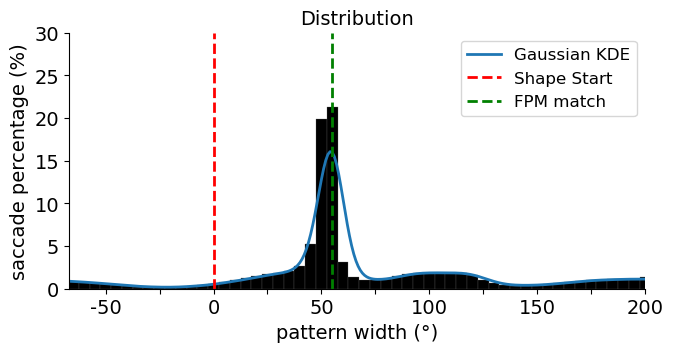

In [170]:
# Plotting
plot_distribution_image(dist_pooled, y_lim=0.3)
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.axvline(x=theoretical_angle+roll, color='green', linestyle='--', label='FPM match')
plt.legend()

# Save the plot as an SVG file
#plt.savefig("../writeup_exports/pool/pool_3C1.svg", format="svg", bbox_inches='tight')

# show
plt.show()

# Test Image 3C2

In [171]:
# load test image
test_rotations = np.load('../paths/test/image_3c2_rotations.npy')
test_image = test_rotations[180]
x_fpm = x_from_fpm(image=test_image, fpm=FPM)
theoretical_angle =  x_fpm - 180

In [172]:
sfpm = x_from_fpm(test_image,2*FPM)
wfpm = x_from_fpm(test_image,FPM)
angle_sfpm = sfpm - 180
angle_wfpm = wfpm - 180

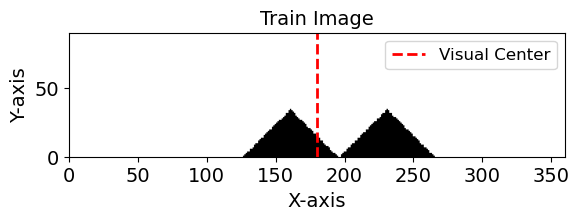

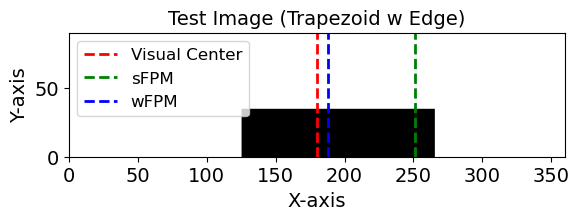

In [173]:
# Plot train and test with FPM match
plot_image(train_image, title='Train Image')
plot_image_s(test_image, sfpm=sfpm, wfpm=wfpm, title='Test Image (Trapezoid w Edge)')

In [174]:
# initialize results dictionnaries
left_dict = {}
right_dict = {}
sum_dict = {}
diff_dict = {}

In [175]:
# loop over colonies ()params
for name, colony in colony_dict.items():
    # print colony name
    print (name)

    # get test rotations
    test_rotations_transformed = [overlap_downsample_transform(arr, overlap=name[1]) for arr in test_rotations]
    rotation_tensor = [torch.tensor(a, dtype=torch.float) for a in test_rotations_transformed]
    rotation_tensor = torch.stack(rotation_tensor)

    # initialise arrays
    left_arr = np.zeros((colony_size, 360))
    right_arr = np.zeros((colony_size, 360))
    sum_arr = np.zeros((colony_size, 360))
    diff_arr = np.zeros((colony_size, 360))

    # run all models and get matrices
    for i in range(colony_size):
        model = colony_dict[name][i]
        l, r, s, d = model.forward(rotation_tensor)
        left_arr[i,:] = l.detach().numpy().flatten()
        right_arr[i,:] = r.detach().numpy().flatten()
        sum_arr[i,:] = s.detach().numpy().flatten()
        diff_arr[i,:] = d.detach().numpy().flatten()

    # set the dictionnary to the appropriate matrix
    left_dict[name] = left_arr
    right_dict[name] = right_arr
    sum_dict[name] = sum_arr
    diff_dict[name] = diff_arr

('DS_q=1', 0)
('DS_q=1', 8)
('DS_q=1', 16)
('DS_q=1', 24)
('DS_q=1', 32)
('DS_q=1', 40)
('DS_q=0.9', 0)
('DS_q=0.9', 8)
('DS_q=0.9', 16)
('DS_q=0.9', 24)
('DS_q=0.9', 32)
('DS_q=0.9', 40)
('DS_q=0.8', 0)
('DS_q=0.8', 8)
('DS_q=0.8', 16)
('DS_q=0.8', 24)
('DS_q=0.8', 32)
('DS_q=0.8', 40)
('DS_q=0.7', 0)
('DS_q=0.7', 8)
('DS_q=0.7', 16)
('DS_q=0.7', 24)
('DS_q=0.7', 32)
('DS_q=0.7', 40)
('DS_q=0.6', 0)
('DS_q=0.6', 8)
('DS_q=0.6', 16)
('DS_q=0.6', 24)
('DS_q=0.6', 32)
('DS_q=0.6', 40)


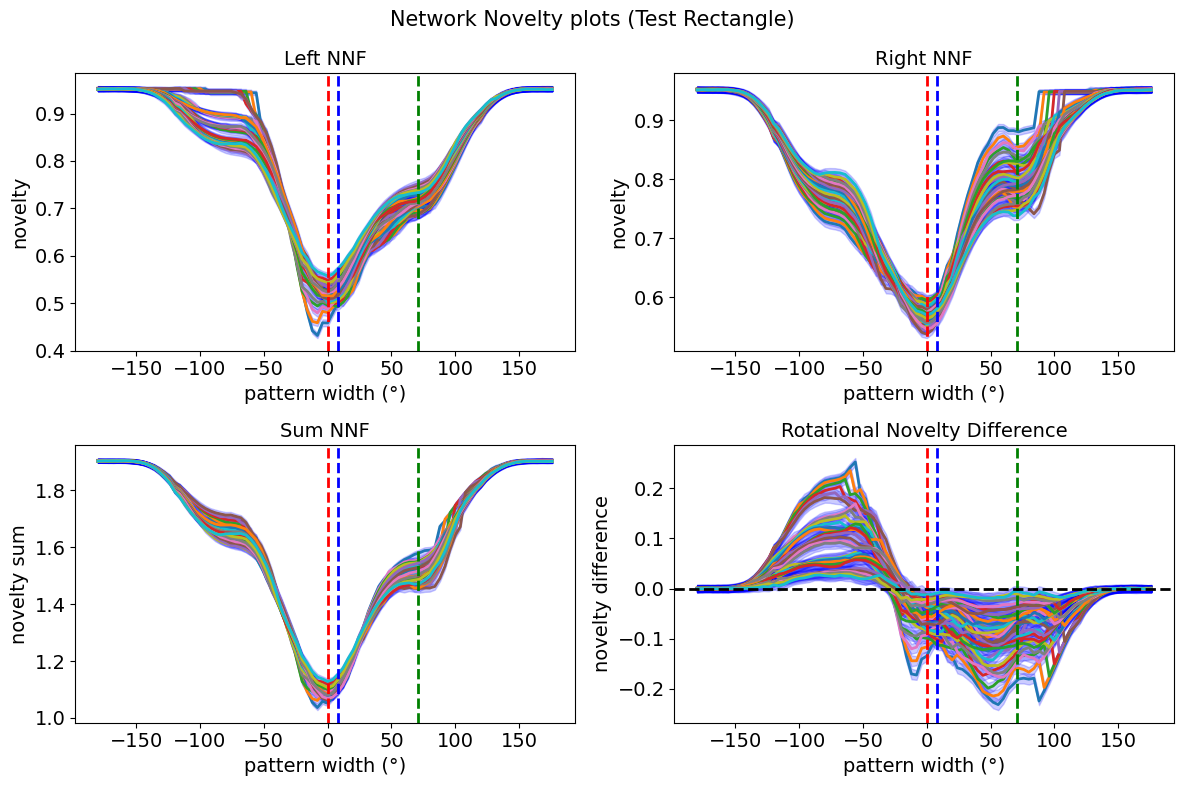

In [176]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Title
plt.suptitle('Network Novelty plots (Test Rectangle)')

# Plot on each subplot
for i, ax in enumerate(axs.flat):
    # angles
    angles = range(-180, 180, 1)

    # Plot the mean curves
    for name in colony_dict:
        mean_curve = np.mean(signals[i][name], axis=0)
        std_curve = np.std(signals[i][name], axis=0)
        # Plot the mean curve
        ax.plot(angles[::4], (mean_curve)[::4], label=name)
        # Plot the standard deviation as a shaded region
        ax.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
    # labelling
    ax.set_ylabel(ylabels[i])
    ax.set_xlabel('pattern width (°)')
    ax.set_title(titles[i])
    ax.axvline(x=angle_sfpm, color='green', linestyle='--', label='sFPM match')
    ax.axvline(x=angle_wfpm, color='blue', linestyle='--', label='wFPM match')
    ax.axvline(x=0, color='red', linestyle='--', label='Visual Center')
    if i == 3:
        ax.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
        # no legend

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

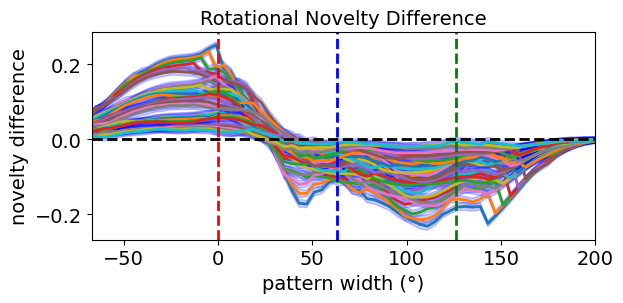

In [177]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig= plt.figure(figsize=(6.4, 6.4/2))

# Roll value
ROLL = 55
i = 3

# angles
angles = np.array(range(-180, 180, 1))+ROLL

# Plot the mean curves
for name in colony_dict:
    mean_curve = np.mean(signals[i][name], axis=0)
    std_curve = np.std(signals[i][name], axis=0)
    # Plot the mean curve
    plt.plot(angles[::4], (mean_curve)[::4], label=name)
    # Plot the standard deviation as a shaded region
    plt.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
# Labelling
plt.ylabel(ylabels[i])
plt.xlabel('pattern width (°)')
plt.title(titles[i])
plt.axvline(x=angle_wfpm+ROLL, color='blue', linestyle='--', label='wFPM match')
plt.axvline(x=angle_sfpm+ROLL, color='green', linestyle='--', label='sFPM match')
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.xlim(-67, 200)  # Restrict x-axis to -90 to 90
plt.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
# plt.legend(loc='upper right')  # Add legend to each subplot
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [178]:
# initialize pooling
roll = ROLL
n_saccades = 100
TEST_NUM = 13
TEST_NAME = "MODE_3C2"

for it in range(n_iter):
    dist_pooled = []
    # parameters
    for name in colony_dict:
        print (name) # loop over colony
        dist_name = []
        for i in range(colony_size):
            # parameters
            novelty_diff = diff_dict[name][i]
            novelty_sum = sum_dict[name][i]
            
            # get weighed distribution
            dist_sum = get_weighed_distribution(novelty_diff, novelty_sum, n_saccades, roll)
            dist_name += list(dist_sum)
            dist_pooled += list(dist_sum)

        # performance
        predicted_modes = kde_predictions(dist_name)
        true_mode = mode_location_dict[TEST_NAME]
        perf = get_performance(predicted_modes, true_mode)
        performance_tensor[it, TEST_NUM, crossover_index[name[0]], overlap_index[name[1]]] = perf
        print (perf)

    # pool performance
    predicted_modes = kde_predictions(dist_pooled)
    true_mode = mode_location_dict[TEST_NAME]
    perf = get_performance(predicted_modes, true_mode)
    performance_vector[it, TEST_NUM] = perf
    print (perf)

('DS_q=1', 0)
2.9000000000000057
('DS_q=1', 8)
5.900000000000006
('DS_q=1', 16)
34.900000000000006
('DS_q=1', 24)
27.900000000000006
('DS_q=1', 32)
21.900000000000006
('DS_q=1', 40)
17.900000000000006
('DS_q=0.9', 0)
4.900000000000006
('DS_q=0.9', 8)
5.900000000000006
('DS_q=0.9', 16)
34.900000000000006
('DS_q=0.9', 24)
29.900000000000006
('DS_q=0.9', 32)
24.900000000000006
('DS_q=0.9', 40)
21.900000000000006
('DS_q=0.8', 0)
7.900000000000006
('DS_q=0.8', 8)
6.900000000000006
('DS_q=0.8', 16)
33.900000000000006
('DS_q=0.8', 24)
8.099999999999994
('DS_q=0.8', 32)
5.099999999999994
('DS_q=0.8', 40)
21.900000000000006
('DS_q=0.7', 0)
13.900000000000006
('DS_q=0.7', 8)
6.900000000000006
('DS_q=0.7', 16)
5.900000000000006
('DS_q=0.7', 24)
7.099999999999994
('DS_q=0.7', 32)
3.0999999999999943
('DS_q=0.7', 40)
2.9000000000000057
('DS_q=0.6', 0)
16.900000000000006
('DS_q=0.6', 8)
12.900000000000006
('DS_q=0.6', 16)
31.900000000000006
('DS_q=0.6', 24)
5.099999999999994
('DS_q=0.6', 32)
3.099999

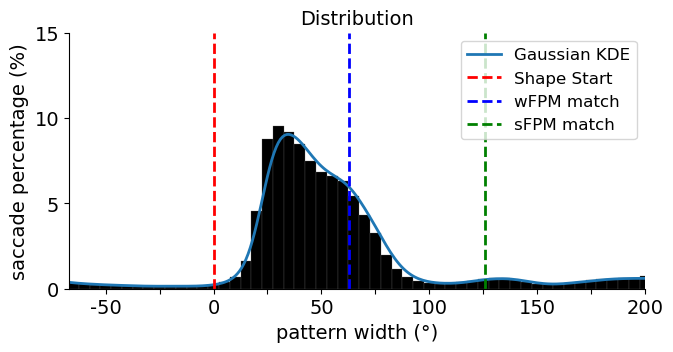

In [179]:
# Plotting
plot_distribution_image(dist_pooled, y_lim=0.15)
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.axvline(x=angle_wfpm+ROLL, color='blue', linestyle='--', label='wFPM match')
plt.axvline(x=angle_sfpm+ROLL, color='green', linestyle='--', label='sFPM match')
plt.legend()

# Save the plot as an SVG file
#plt.savefig("../writeup_exports/pool/pool_3C2.svg", format="svg", bbox_inches='tight')

# show
plt.show()

# Test Image 3C3

In [180]:
# load test image
test_rotations = np.load('../paths/test/image_3c3_rotations.npy')
test_image = test_rotations[180]
x_fpm = x_from_fpm(image=test_image, fpm=FPM)
theoretical_angle =  x_fpm - 180
theoretical_angle

-19

In [181]:
sfpm = x_from_fpm(test_image,2*FPM)
wfpm = x_from_fpm(test_image,FPM)
angle_sfpm = sfpm - 180
angle_wfpm = wfpm - 180

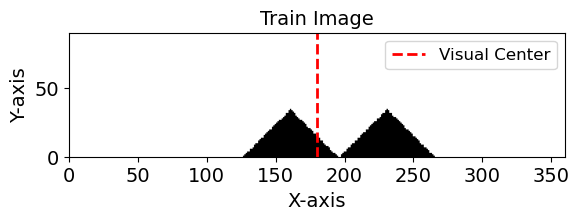

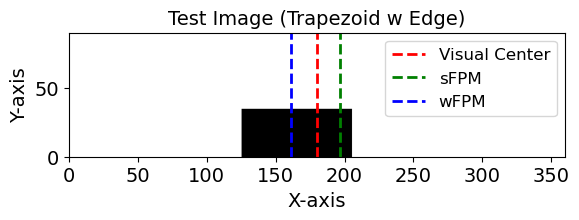

In [182]:
# Plot train and test with FPM match
plot_image(train_image, title='Train Image')
plot_image_s(test_image, sfpm=sfpm, wfpm=wfpm, title='Test Image (Trapezoid w Edge)')

In [183]:
# initialize results dictionnaries
left_dict = {}
right_dict = {}
sum_dict = {}
diff_dict = {}

In [184]:
# loop over colonies ()params
for name, colony in colony_dict.items():
    # print colony name
    print (name)

    # get test rotations
    test_rotations_transformed = [overlap_downsample_transform(arr, overlap=name[1]) for arr in test_rotations]
    rotation_tensor = [torch.tensor(a, dtype=torch.float) for a in test_rotations_transformed]
    rotation_tensor = torch.stack(rotation_tensor)

    # initialise arrays
    left_arr = np.zeros((colony_size, 360))
    right_arr = np.zeros((colony_size, 360))
    sum_arr = np.zeros((colony_size, 360))
    diff_arr = np.zeros((colony_size, 360))

    # run all models and get matrices
    for i in range(colony_size):
        model = colony_dict[name][i]
        l, r, s, d = model.forward(rotation_tensor)
        left_arr[i,:] = l.detach().numpy().flatten()
        right_arr[i,:] = r.detach().numpy().flatten()
        sum_arr[i,:] = s.detach().numpy().flatten()
        diff_arr[i,:] = d.detach().numpy().flatten()

    # set the dictionnary to the appropriate matrix
    left_dict[name] = left_arr
    right_dict[name] = right_arr
    sum_dict[name] = sum_arr
    diff_dict[name] = diff_arr

('DS_q=1', 0)
('DS_q=1', 8)
('DS_q=1', 16)
('DS_q=1', 24)
('DS_q=1', 32)
('DS_q=1', 40)
('DS_q=0.9', 0)
('DS_q=0.9', 8)
('DS_q=0.9', 16)
('DS_q=0.9', 24)
('DS_q=0.9', 32)
('DS_q=0.9', 40)
('DS_q=0.8', 0)
('DS_q=0.8', 8)
('DS_q=0.8', 16)
('DS_q=0.8', 24)
('DS_q=0.8', 32)
('DS_q=0.8', 40)
('DS_q=0.7', 0)
('DS_q=0.7', 8)
('DS_q=0.7', 16)
('DS_q=0.7', 24)
('DS_q=0.7', 32)
('DS_q=0.7', 40)
('DS_q=0.6', 0)
('DS_q=0.6', 8)
('DS_q=0.6', 16)
('DS_q=0.6', 24)
('DS_q=0.6', 32)
('DS_q=0.6', 40)


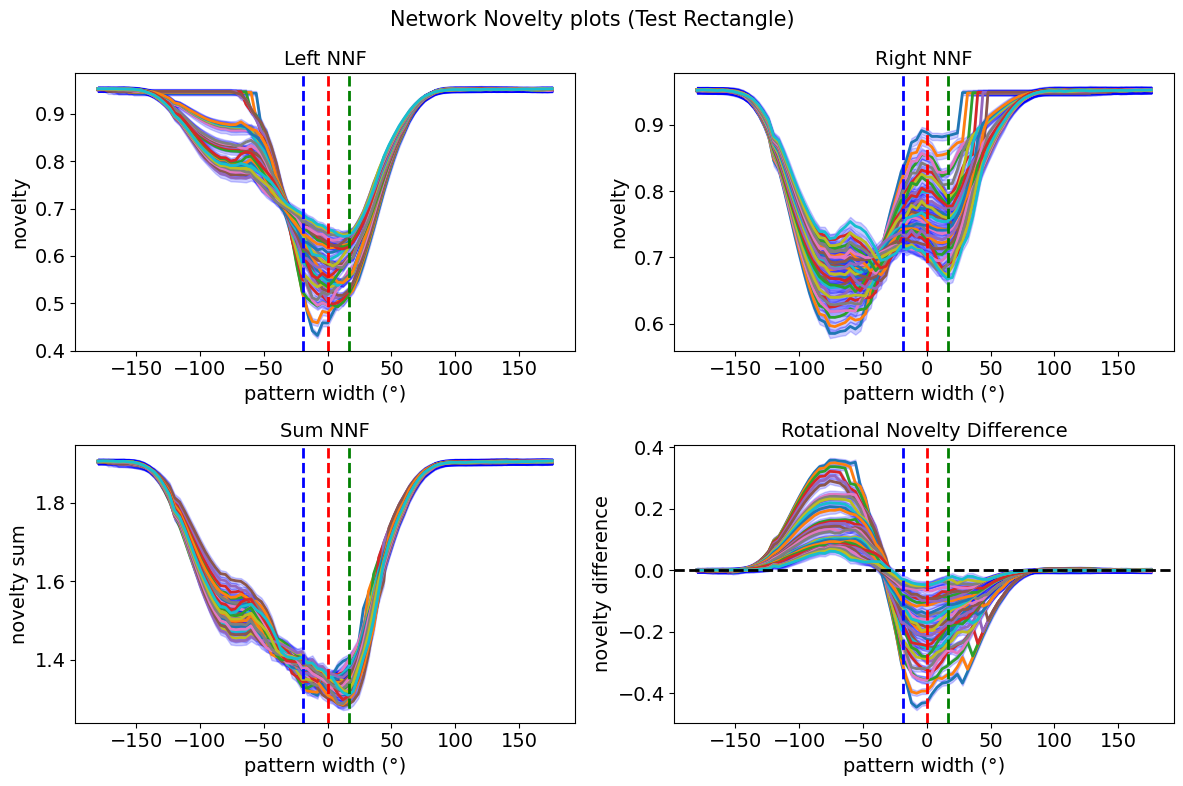

In [185]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Title
plt.suptitle('Network Novelty plots (Test Rectangle)')

# Plot on each subplot
for i, ax in enumerate(axs.flat):
    # angles
    angles = range(-180, 180, 1)

    # Plot the mean curves
    for name in colony_dict:
        mean_curve = np.mean(signals[i][name], axis=0)
        std_curve = np.std(signals[i][name], axis=0)
        # Plot the mean curve
        ax.plot(angles[::4], (mean_curve)[::4], label=name)
        # Plot the standard deviation as a shaded region
        ax.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
    # labelling
    ax.set_ylabel(ylabels[i])
    ax.set_xlabel('pattern width (°)')
    ax.set_title(titles[i])
    ax.axvline(x=angle_sfpm, color='green', linestyle='--', label='sFPM match')
    ax.axvline(x=0, color='red', linestyle='--', label='Visual Center')
    ax.axvline(x=angle_wfpm, color='blue', linestyle='--', label='wFPM match')
    if i == 3:
        ax.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
        # no legend

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

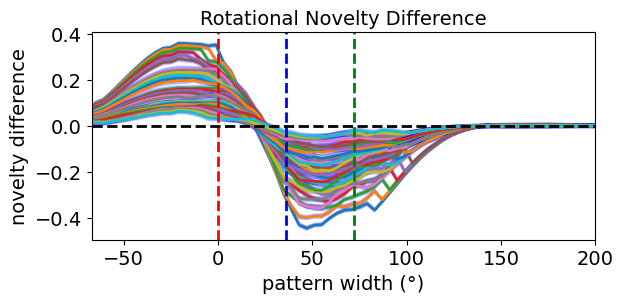

In [186]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig= plt.figure(figsize=(6.4, 6.4/2))

# Roll value
ROLL = 55
i = 3

# angles
angles = np.array(range(-180, 180, 1))+ROLL

# Plot the mean curves
for name in colony_dict:
    mean_curve = np.mean(signals[i][name], axis=0)
    std_curve = np.std(signals[i][name], axis=0)
    # Plot the mean curve
    plt.plot(angles[::4], (mean_curve)[::4], label=name)
    # Plot the standard deviation as a shaded region
    plt.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
# Labelling
plt.ylabel(ylabels[i])
plt.xlabel('pattern width (°)')
plt.title(titles[i])
plt.axvline(x=angle_wfpm+ROLL, color='blue', linestyle='--', label='wFPM match')
plt.axvline(x=angle_sfpm+ROLL, color='green', linestyle='--', label='sFPM match')
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.xlim(-67, 200)  # Restrict x-axis to -90 to 90
plt.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
# plt.legend(loc='upper right')  # Add legend to each subplot
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [187]:
# initialize pooling
roll = ROLL
n_saccades = 100
TEST_NUM = 14
TEST_NAME = "MODE_3C3"

for it in range(n_iter):
    dist_pooled = []
    # parameters
    for name in colony_dict:
        print (name) # loop over colony
        dist_name = []
        for i in range(colony_size):
            # parameters
            novelty_diff = diff_dict[name][i]
            novelty_sum = sum_dict[name][i]
            
            # get weighed distribution
            dist_sum = get_weighed_distribution(novelty_diff, novelty_sum, n_saccades, roll)
            dist_name += list(dist_sum)
            dist_pooled += list(dist_sum)

        # performance
        predicted_modes = kde_predictions(dist_name)
        true_mode = mode_location_dict[TEST_NAME]
        perf = get_performance(predicted_modes, true_mode)
        performance_tensor[it, TEST_NUM, crossover_index[name[0]], overlap_index[name[1]]] = perf
        print (perf)

    # pool performance
    predicted_modes = kde_predictions(dist_pooled)
    true_mode = mode_location_dict[TEST_NAME]
    perf = get_performance(predicted_modes, true_mode)
    performance_vector[it, TEST_NUM] = perf
    print (perf)

('DS_q=1', 0)
23.200000000000003
('DS_q=1', 8)
24.799999999999997
('DS_q=1', 16)
22.799999999999997
('DS_q=1', 24)
21.799999999999997
('DS_q=1', 32)
20.799999999999997
('DS_q=1', 40)
18.799999999999997
('DS_q=0.9', 0)
24.200000000000003
('DS_q=0.9', 8)
23.799999999999997
('DS_q=0.9', 16)
22.799999999999997
('DS_q=0.9', 24)
22.799999999999997
('DS_q=0.9', 32)
20.799999999999997
('DS_q=0.9', 40)
18.799999999999997
('DS_q=0.8', 0)
23.799999999999997
('DS_q=0.8', 8)
23.799999999999997
('DS_q=0.8', 16)
23.799999999999997
('DS_q=0.8', 24)
22.799999999999997
('DS_q=0.8', 32)
21.799999999999997
('DS_q=0.8', 40)
18.799999999999997
('DS_q=0.7', 0)
23.799999999999997
('DS_q=0.7', 8)
24.799999999999997
('DS_q=0.7', 16)
24.799999999999997
('DS_q=0.7', 24)
23.799999999999997
('DS_q=0.7', 32)
21.799999999999997
('DS_q=0.7', 40)
18.799999999999997
('DS_q=0.6', 0)
23.799999999999997
('DS_q=0.6', 8)
25.799999999999997
('DS_q=0.6', 16)
23.799999999999997
('DS_q=0.6', 24)
23.200000000000003
('DS_q=0.6', 3

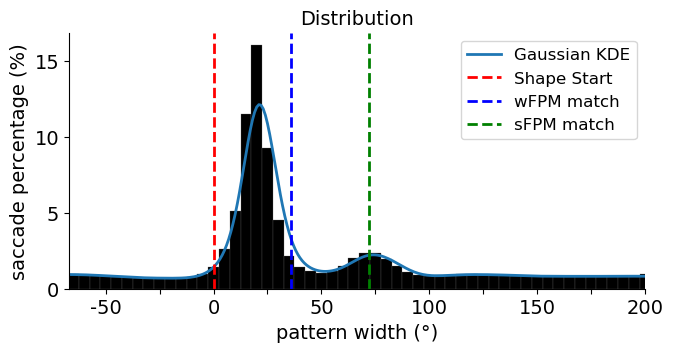

In [188]:
# Plotting
plot_distribution_image(dist_pooled, y_lim=0.15)
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.axvline(x=angle_wfpm+ROLL, color='blue', linestyle='--', label='wFPM match')
plt.axvline(x=angle_sfpm+ROLL, color='green', linestyle='--', label='sFPM match')
plt.legend()

# Save the plot as an SVG file
#plt.savefig("../writeup_exports/pool/pool_3C3.svg", format="svg", bbox_inches='tight')

# show
plt.show()

# Export Performance Tensor and Vector

In [189]:
np.save('../writeup_notebooks_perf/performance_tensor.npy', performance_tensor) # for parameters
np.save('../writeup_notebooks_perf/performance_vector.npy', performance_vector) # for pooled version